# <h1><center>EPS ESTIMATE REVISION AND PRICE MOMENTUM MODELLING

# DATA PREPARATION PART 1

## OVERVIEW

The basis of the forthcoming analysis is to use machine learning and related tools in order to analyze and model the earnings estimates from various angles / perspectives of a basket of stocks, for which we will call this exercise EPS estimate revision momentum modelling.

The goal of this analysis is not only to use powerful algorithms to predict EPS but also better understand various drivers behind such predictions.  Additionally, we will be assessing the power of this dataset on predicting stock price performance.  The chosen variables / data set had this goal in mind when being gathered and organized.  The use case for the analysis is multifaceted for both professional and individual investors.  For the professional, this analysis could serve to aid in the following:  predicting EPS which in turn could be used in combination with a target multiple and/or DCF in order to establish an estimated target price, predicting EPS and comparing growth potential across a universe of stocks, comparing the models outcomes with human driven modelling / analytical efforts, providing investment ideas (buy or sell) based on the model’s output and providing insight into the various power of individual and groupings of metrics which can serve to guide the focus of an analyst’s research efforts to gain insight and dig deeper on additional metrics.  The use case could also be for individual investors as a means to generate investment buy and sell ideas based on the predictions made by the model.


## DATA MEANING AND TYPE
    
We gathered weekly data during the past four and a half years (12/30/16 - 7/1/21) and established six categories by which an explanatory variable is included in: GROWTH, STABILITY, ANALYST REVISIONS, INCOME STATEMENT, RETURNS and OTHER. In total there are 72 explanatory variables and a total of ~99k rows of data (before pre-processing). Note, we stopped the data at 7/1/21 in order to be able to calculate the response variables that need to see what the forward metrics consist of. Details on each category and the variables include are as follows:

GROWTH
Consensus (i.e. sell side analysts) EPS median estimates trends were gathered in order to capture the recent growth trends in such figures which we expect to be helpful given the aforementioned momentum theory:

Annualized growth rate for each of the following time periods on a daily basis for the past 5 year period (1 month, 2 month, 3 month, 6 month, 1 year, 3 year and 5 year)

• Float value labeled as “Best_EPS_##” in the data set.

Percent relative to their respective 5 year growth rate for all the aforementioned time periods except the 5 year. The 5 year growth rate approximates a company's longer term growth rate thus this ratio captures the current trend relative to the longer term.

• Float value labeled as “Best_EPS_##_vs_5Y”.

3M, 6M and 1Y growth rate ranks within our universe thus aiding in comparability.

• Float value labeled as “Best_EPS_##_Rank”.

A continuous and classification variable seeking to capture short-term EPS acceleration, which is deemed attractive as the EPS is not only improving but in somewhat of a parabolic manner. For the continuous variable we used the aforementioned EPS growth ranks (3M, 6M and 1Y), then averaged the three to get a continuous variable rank. For the classification variable we segmented into those meeting (or not) the following criteria: EPS growth of 3M > 6M AND 6M > 1Y.

• Float value and integer labeled as "ST_Accel" and "ST_Accel_Class", respectively.
    
<b> NEW GROWTH MEASURES
    
<b>Variables premised on capturing weekly changes in consensus EPS that are greater than or less than -10%, respectively.  The theory behind this is that such large changes may evidence that "things have changed" for the better or worse.
    
<b>• Integer value labeled as "Best_EPS_Up_10_#M" and "Best_EPS_Dn_10_#M" 


STABILITY
Stability measures seek to capture the stability of EPS which not only aids in modelling efforts but also evidences confidence in the outlook of a company by analysts and management that provide much of the underlying information.

R-squared (spearman) of the weekly 1, 3 and 5 year EPS figures. Both the value and the rank of this measure.

• Float value labeled as “Best_EPS_#Y_R2" and “Best_EPS_5Y_R2_Rank".

R-squared (pearson) of the weekly 5 year EPS figures. Just the value for this measure. We are curious if there are differences between the two R2 measures given the former is parametric and the latter is not and captures linear relationships better.

• Float value labeled as “Best_EPS_#Y_R2_p".

Standard deviation of the weekly 5 year EPS figures.

• Float value labeled as “Best_EPS_5Y_SD".

FactSet derived measure of EPS stability defined as: measuring the consistency for an estimate item over the past 5 years.

• Float value labeled as “Best_EPS_5Y_Stability".

<b>NEW STABILITY MEASURES
    
<b>We also added to our list of stability variables after the previous labs given our desire to explore the efficacy of this category or variables.  This includes the following:
    
<b>Per FactSet's online library, "FactSet calculates sigma as the percentage difference between the standard deviation of source estimates for a consensus and the mean consensus calculated using the same estimates. A sigma of 25% signifies that estimates vary by an average of 25% relative to the mean consensus. The sigma value is a useful indication of analysts’ visibility."  This measure was pulled on a current as well as current minus 3M, 6M and 1Y bases.
    
<b>• Float value labeled as “Best_EPS_Sigma" and “Best_EPS_Sigma_#M".
    
<b>Another variable that is new for this lab is one that showed efficacy during our SVM and logistic regression analysis and compares the current mean EPS with the current median EPS in order to capture the potential for positive or negative outliers.
    
<b>• Float value labeled as “Best_EPS_Mean_Med".
    
<b>We also sought to capture the range of current EPS estimates by subracting the low from the high current estimate.
    
<b>• Float value labeled as “Best_EPS_Hi_Lo".
    
<b>Coefficient of variation of the weekly 5 year EPS figures.
  
<b>• Float value labeled as “Best_EPS_5Y_CV". 

    
ANALYST REVISIONS
Sell side analyst EPS revisions (Upward, Downward and Unchanged). A “revision” is a change (regardless of magnitude) in an analyst’s estimate during the past 3 months for a company’s EPS for the next 12 month period. Calculated the % of total revisions for each metric.

• Float value labeled as “An_Up", "An_Down", "An_Unch".

We included the current value as well as the change in each of these variables on a 3- and 6-month basis and labeled them similarly to the previous metrics but added “_#M” on the end. This captures second derivative changes in the revisions metrics.

Analyst revision ratios
We pulled a predetermined metric labeled “Mark_Rev” from FactSet which seeks to quantify the relative trend in the analyst revisions with the lower being better.

• Float value labeled as “An_Mark"

We also created our own metric labeled as “Net_Est_Rev_Ratio” which equates to the following: (Upward Revisions – Downward Revisions) / Total Revisions. This ratio ranges from -100 to 100 and seeks to capture the change in such revision on a proportion basis during the past 3 month period.

• Float value labeled as “NRR"

Both of these metrics were also used to create variables which capture the change in the Net_Est_Rev_Ratio and Mark_Rev on a 3- and 6-month basis, which similarly as above capture second derivative changes and labeled them similarly to the previous metrics but added “_#M” on the end.

RETURNS
Technical analysis (aka price momentum) presumes that price leads fundamentals as the collective market begins to price in changes in fundamentals prior to such changes becoming quantifiable. As such, in hopes to capture some of the collective market’s wisdom based on the similar rationale above regarding analyst and management information capture, we included relative return data on a 1-, 3- and 6-month basis. This was calculated by subtracting the S&P 500 Equal Weighted Index from each stock's given return, which removes any noise that can be caused by overall market movements and captures a cleaner measure of the performance of a stock.

• Float value labeled as “Return_#M".

Additionally, with the aforementioned technical analysis view in mind, we also included a relative price momentum measure which is defined as the change over the last 6 months in the one month moving average relative to the index.

• Float value labeled as “Rel_PMO".

OTHER
Market Capitalization values.

• Float value labeled as “Mkt_Cap".

We also have left "Date", "Sector" and "Ticker" as variables in the dataset as they were used as part of the building of it. These variables will not be included in our model building efforts thus will be removed accordingly.

### DATA QUALITY

FactSet was used to gather all of the data.  As SMU students, we are provided free FactSet licenses upon request during our time in the program via the business library.  We attempted to get the data via FactSet's API but our student license did not provide such access so we used the FactSet excel add-in.  Given the reputation of FactSet in the marketplace we have high confidence in the accuracy of the data gathered. Upon gathering the data in excel, we used R code to format and create summary CSV files to be used during our analysis.

In [1]:
# Read in data and packages
import pandas as pd
import numpy as np
#import bamboolib as bam
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

df = pd.read_csv('ML1_DATA_v3.csv')

C:\Users\jeffn\anaconda3\envs\ML1\lib\site-packages\IPython\core\interactiveshell.py:3173: DtypeWarning: Columns (71) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### ASSESS DATA TYPE

Changes made include:  Upon assessing data type of each variable we changed variable types accordingly as several are not correct:

Op_Mgn to float and Fwd_Return_3M_Class to category

In [2]:
# Summary of variables to check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94385 entries, 0 to 94384
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   94385 non-null  object 
 1   ticker                 94385 non-null  object 
 2   Fwd_Best_EPS_6M        93168 non-null  float64
 3   Fwd_Return_3M          94385 non-null  float64
 4   Fwd_Return_3M_Class    94385 non-null  int64  
 5   Mkt_Cap                94385 non-null  float64
 6   Sector                 94385 non-null  object 
 7   Best_EPS_1M            93478 non-null  float64
 8   Best_EPS_3M            93314 non-null  float64
 9   Best_EPS_6M            93174 non-null  float64
 10  Best_EPS_1Y            93153 non-null  float64
 11  Best_EPS_3Y            92773 non-null  float64
 12  Best_EPS_5Y            91752 non-null  float64
 13  Best_EPS_3M_v5Y        81105 non-null  float64
 14  Best_EPS_6M_v5Y        81036 non-null  float64
 15  Be

In [3]:
# Change variable types accordingly as several are not correct 
df['Op_Mgn'] = pd.to_numeric(df['Op_Mgn'], downcast='float', errors='coerce')
df['Fwd_Return_3M_Class'] = df['Fwd_Return_3M_Class'].astype('category')

# Check to make sure the changes were made properly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94385 entries, 0 to 94384
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   94385 non-null  object  
 1   ticker                 94385 non-null  object  
 2   Fwd_Best_EPS_6M        93168 non-null  float64 
 3   Fwd_Return_3M          94385 non-null  float64 
 4   Fwd_Return_3M_Class    94385 non-null  category
 5   Mkt_Cap                94385 non-null  float64 
 6   Sector                 94385 non-null  object  
 7   Best_EPS_1M            93478 non-null  float64 
 8   Best_EPS_3M            93314 non-null  float64 
 9   Best_EPS_6M            93174 non-null  float64 
 10  Best_EPS_1Y            93153 non-null  float64 
 11  Best_EPS_3Y            92773 non-null  float64 
 12  Best_EPS_5Y            91752 non-null  float64 
 13  Best_EPS_3M_v5Y        81105 non-null  float64 
 14  Best_EPS_6M_v5Y        81036 non-null 

### MISSING VALUES

Summary of steps taken to address missing values:

First remove rows with missing values in dependent variable features / columns as not all tickers have registered EPS during the time period due to timing of going public.

There were many missing values in the rows that calculate EPS growth relative to the 5 year average.
Such missing values are because we forced the 5 year values to be positive in order to make sure the calculation was not incorrect in magnitude due to the denominator being negative at this point in time.  We decided to fill in these missing values with the value of 0 as this limits such values' impact on the analysis, all the while not giving any credit by imputing such values with the median or mean values (which are positive).

The remaining missing values consist primarily of financial statement variables.  We looked into this via FactSet
and indeed found such values to be missing.  These are not errors and we were not able to gain further insight to why they were missing thus we will use median values to be imputed as the wide range of values lends itself to giving us more confidence in using median over mean.

We analyzed the remaining missing values and found that they too were affected by the timing of companies going public.  For example, EPS on a 5Y and 3Y basis need such time periods in order to be quantified.  With these being legitimate missing values, we decided to drop them accordingly.


In [4]:
# Count of missing values
df.isnull().sum().sort_values(ascending=False)

Best_EPS_3Y_v5Y      13420
Best_EPS_6M_v5Y      13349
Best_EPS_1Y_v5Y      13342
Best_EPS_3M_v5Y      13280
ROE_1Y_Chg            4631
                     ...  
Best_EPS_Up_10_1M        0
Best_EPS_Dn_10_6M        0
Best_EPS_Dn_10_3M        0
Best_EPS_Dn_10_1M        0
Date                     0
Length: 74, dtype: int64

In [5]:
# Remove missing values from response variable which were caused by timing of company going public
df = df.dropna(subset=['Fwd_Best_EPS_6M'])

In [6]:
# Recount of missing values
df.isnull().sum().sort_values(ascending=False)

Best_EPS_3Y_v5Y      12398
Best_EPS_6M_v5Y      12316
Best_EPS_1Y_v5Y      12309
Best_EPS_3M_v5Y      12247
ROE_1Y_Chg            4570
                     ...  
Best_EPS_Dn_10_6M        0
Best_EPS_Dn_10_3M        0
Best_EPS_Dn_10_1M        0
ROIC_SD                  0
Date                     0
Length: 74, dtype: int64

In [7]:
# Fill in missing values with 0 as detailed above

df[['Best_EPS_3M_v5Y', 'Best_EPS_6M_v5Y', 'Best_EPS_1Y_v5Y', 'Best_EPS_3Y_v5Y']] = df[['Best_EPS_3M_v5Y', 'Best_EPS_6M_v5Y', 'Best_EPS_1Y_v5Y', 'Best_EPS_3Y_v5Y']].fillna(0)


In [8]:
# Recount of missing values
df.isnull().sum().sort_values(ascending=False)

ROE_1Y_Chg           4570
ROE                  3978
Best_EPS_5Y          1800
Best_EPS_3Y           749
ROE_SD                743
                     ... 
Best_EPS_Dn_10_6M       0
Best_EPS_Dn_10_3M       0
Best_EPS_Dn_10_1M       0
ROIC_SD                 0
Date                    0
Length: 74, dtype: int64

In [9]:
# Assess range of values to determine b/w using mean or median to fill in values
df.describe()

,Fwd_Best_EPS_6M,Fwd_Return_3M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,93168.000000,93168.000000,9.316800e+04,93099.000000,92953.000000,92795.000000,92780.000000,92419.000000,91368.000000,93168.000000,...,93168.000000,89190.000000,88598.000000,92425.000000,92861.000000,92819.000000,92932.000000,92696.000000,92695.000000,92696.000000
mean,0.270340,2.033994,3.887510e+04,0.251909,0.268273,0.249872,0.197585,0.205440,0.276900,2.046794,...,5.037595,50.523617,-6.449641,26.970070,14.578252,1.061350,6.737885,18.498755,0.217446,3.373601
std,1.391045,13.804542,1.223198e+05,3.052673,1.743145,1.551333,1.157104,0.942627,2.526851,108.524955,...,14.668597,805.798457,544.461772,316.714988,25.325492,33.698090,27.105625,13.557876,6.804734,20.345219
min,-1.989822,-70.666545,2.285343e+02,-11.863636,-3.954023,-1.977778,-0.992701,-0.327309,-0.199462,-9683.752502,...,0.102878,-521.481482,-30933.255810,0.131123,-287.128563,-914.943570,0.171153,-115.010300,-180.859303,0.040187
25%,-0.006137,-6.465486,3.529401e+03,0.000000,-0.017884,-0.012078,0.017589,0.052299,0.057522,0.000000,...,1.495181,9.625543,-2.932016,2.134103,5.219822,-2.053089,1.732389,8.572963,-1.036251,0.901555
50%,0.119300,1.274061,9.362371e+03,0.000000,0.073394,0.112391,0.120553,0.130568,0.133486,0.245187,...,2.557763,14.564127,0.372151,4.154379,11.186395,0.639159,2.882952,15.374551,0.153370,1.662745
75%,0.354523,9.168342,2.630253e+04,0.086762,0.354620,0.328492,0.258830,0.233677,0.242165,1.847939,...,4.695785,26.199563,4.544229,9.289016,21.568568,3.777275,4.860986,25.585566,1.623671,3.175189
max,74.903600,247.456219,2.339612e+06,288.385852,97.764706,258.000000,131.000000,110.333333,174.747516,12806.232240,...,267.476144,31560.000000,6544.700305,12579.830720,707.285829,1336.962231,836.690657,127.801140,242.811441,927.418155


In [10]:
# Fill in missing values with median as detailed above. 
df[['ROIC', 'Op_Mgn_SD', 'Op_Mgn_1Y_Chg', 'Op_Mgn', 'FCF_Mgn_SD', 'FCF_Mgn_1Y_Chg', 'FCF_Mgn', 'ROE_SD', 'ROE_1Y_Chg', 'ROE', 'ROIC_SD', 'ROIC_1Y_Chg']] = df[['ROIC', 'Op_Mgn_SD', 'Op_Mgn_1Y_Chg', 'Op_Mgn', 'FCF_Mgn_SD', 'FCF_Mgn_1Y_Chg', 'FCF_Mgn', 'ROE_SD', 'ROE_1Y_Chg', 'ROE', 'ROIC_SD', 'ROIC_1Y_Chg']].fillna(df[['ROIC', 'Op_Mgn_SD', 'Op_Mgn_1Y_Chg', 'Op_Mgn', 'FCF_Mgn_SD', 'FCF_Mgn_1Y_Chg', 'FCF_Mgn', 'ROE_SD', 'ROE_1Y_Chg', 'ROE', 'ROIC_SD', 'ROIC_1Y_Chg']].median())
df

,Date,ticker,Fwd_Best_EPS_6M,Fwd_Return_3M,Fwd_Return_3M_Class,Mkt_Cap,Sector,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
1217,2/24/2017,USM-US,74.903600,-4.889875,0,3476.50020,Other,-11.863636,-3.954023,-1.977778,...,2.046482,1.334350,-5.699438,2.761660,1.421681,2.059157,5.894632,1.303258,-0.418496,6.019249
1218,3/3/2017,USM-US,74.903600,9.745086,1,3096.55000,Other,-11.863636,-3.954023,-1.977778,...,2.047484,1.334350,-5.699438,2.763036,1.421681,2.059157,5.878903,1.303258,-0.418496,6.003282
1219,3/10/2017,USM-US,74.903600,7.666707,1,3059.15010,Other,-11.863636,-3.954023,-1.977778,...,2.048419,1.334350,-5.699438,2.764343,1.421681,2.059157,5.863100,1.303258,-0.418496,5.987210
1220,9/11/2020,WFC-US,59.176471,4.913092,1,99981.69000,Financials,-2.285714,-3.666667,-1.957421,...,0.508032,10.200046,-0.910293,0.726710,27.033367,-6.017447,9.965697,5.105392,-24.770061,8.041407
1221,2/19/2021,BKNG-US,48.115756,-10.175979,0,93922.30500,Consumer Discretionary,0.000000,0.012903,-1.836531,...,7.266765,1.089969,-65.019557,17.333053,-2.957622,-32.806288,7.703334,8.137139,-27.386556,5.826197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94380,9/18/2020,GBX-US,-1.980676,9.170544,1,951.92615,Industrials,0.000000,3.885714,-0.407692,...,5.620566,3.810998,-1.814705,8.915607,7.810874,14.977948,6.605881,5.369025,0.334717,4.050504
94381,9/25/2020,GBX-US,-1.980676,10.618401,1,953.88820,Industrials,0.000000,3.885714,-0.407692,...,5.625774,3.810998,-1.814705,8.906927,7.810874,14.977948,6.615584,5.369025,0.334717,4.051477
94382,10/2/2020,GBX-US,-1.980676,0.060965,1,1025.17640,Industrials,0.000000,3.885714,-0.260504,...,5.630247,3.810998,-1.814705,8.897024,7.810874,14.977948,6.625228,5.369025,0.334717,4.052131
94383,8/9/2019,OLN-US,-1.981651,4.832626,1,2903.18120,Materials,-2.311111,-1.332154,-0.910000,...,3.962938,11.740275,-10.122976,8.544678,7.200505,1.661834,1.672005,9.116732,1.802904,1.993940


In [11]:
# Recount of missing values
df.isnull().sum().sort_values(ascending=False)

Best_EPS_5Y          1800
Best_EPS_3Y           749
Best_EPS_Sigma_1Y     622
ST_Accel              621
Best_EPS_Sigma_6M     579
                     ... 
Return_3M               0
Return_1M               0
Op_Mgn_1Y_Chg           0
An_Down                 0
Date                    0
Length: 74, dtype: int64

In [12]:
# Drop remaining missing values as detailed above.

df = df.dropna()

In [13]:
# Recount of missing values
df.isnull().sum().sort_values(ascending=False)

Op_Mgn_SD            0
Best_EPS_6M_Rank     0
ST_Accel             0
ST_Accel_Class       0
NRR_6M               0
                    ..
Best_EPS_Sigma       0
Best_EPS_Mean_Med    0
Best_EPS_Hi_Lo       0
Best_EPS_Up_10_6M    0
Date                 0
Length: 74, dtype: int64

Check summary statistics after accounting for missing values.

Approximately 90k rows remain which is deemed to be still sufficient for our analysis.

In [14]:
df.describe()

,Fwd_Best_EPS_6M,Fwd_Return_3M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,89713.000000,89713.000000,8.971300e+04,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,...,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000
mean,0.246713,1.902532,3.931676e+04,0.229546,0.247659,0.229168,0.176547,0.193511,0.272333,2.036768,...,4.694719,50.402044,-6.312812,26.455197,14.557601,0.659862,5.857186,18.668335,0.173378,2.496072
std,1.254363,13.559946,1.225829e+05,2.804868,1.647323,1.430034,0.662016,0.691431,2.513606,110.520523,...,13.743282,803.432790,541.031897,321.294317,24.035069,28.525183,19.706253,13.238305,6.493583,3.428154
min,-1.989822,-70.666545,2.285343e+02,-11.002105,-3.799283,-1.957421,-0.984936,-0.327309,-0.197458,-9683.752502,...,0.102878,-521.481482,-30933.255810,0.131123,-287.128563,-914.943570,0.171153,-115.010300,-180.859303,0.040187
25%,-0.006349,-6.456327,3.727805e+03,0.000000,-0.016803,-0.011628,0.016529,0.052462,0.058405,0.000000,...,1.457793,10.014360,-2.583632,2.098891,5.382305,-2.044049,1.707999,8.825271,-1.038489,0.884382
50%,0.116129,1.207900,9.801431e+03,0.000000,0.072165,0.110577,0.119105,0.129630,0.133596,0.280785,...,2.503581,14.564127,0.372151,4.086355,11.332716,0.628516,2.852672,15.641937,0.151272,1.641748
75%,0.343650,8.981228,2.710075e+04,0.084309,0.346821,0.321429,0.253472,0.229798,0.241805,1.908397,...,4.546948,25.585943,4.138887,8.842794,21.607765,3.665861,4.761934,25.705462,1.540079,3.081126
max,59.176471,247.456219,2.339612e+06,288.385852,97.764706,258.000000,56.500000,46.333333,174.747516,12806.232240,...,267.476144,31560.000000,6544.700305,12579.830720,707.285829,599.369312,315.515590,127.801140,242.811441,59.533429


### OUTLIERS

Though we found a wide range of values for various variables, we did not find justifiable evidence to deem them as outliers that should be removed from our analysis.

In [15]:
# Check number of remaining tickers

ticker_set = set(df.ticker)
num_unique = len(ticker_set)
print(num_unique)

396


In [16]:
df.describe()

,Fwd_Best_EPS_6M,Fwd_Return_3M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,89713.000000,89713.000000,8.971300e+04,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,...,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000
mean,0.246713,1.902532,3.931676e+04,0.229546,0.247659,0.229168,0.176547,0.193511,0.272333,2.036768,...,4.694719,50.402044,-6.312812,26.455197,14.557601,0.659862,5.857186,18.668335,0.173378,2.496072
std,1.254363,13.559946,1.225829e+05,2.804868,1.647323,1.430034,0.662016,0.691431,2.513606,110.520523,...,13.743282,803.432790,541.031897,321.294317,24.035069,28.525183,19.706253,13.238305,6.493583,3.428154
min,-1.989822,-70.666545,2.285343e+02,-11.002105,-3.799283,-1.957421,-0.984936,-0.327309,-0.197458,-9683.752502,...,0.102878,-521.481482,-30933.255810,0.131123,-287.128563,-914.943570,0.171153,-115.010300,-180.859303,0.040187
25%,-0.006349,-6.456327,3.727805e+03,0.000000,-0.016803,-0.011628,0.016529,0.052462,0.058405,0.000000,...,1.457793,10.014360,-2.583632,2.098891,5.382305,-2.044049,1.707999,8.825271,-1.038489,0.884382
50%,0.116129,1.207900,9.801431e+03,0.000000,0.072165,0.110577,0.119105,0.129630,0.133596,0.280785,...,2.503581,14.564127,0.372151,4.086355,11.332716,0.628516,2.852672,15.641937,0.151272,1.641748
75%,0.343650,8.981228,2.710075e+04,0.084309,0.346821,0.321429,0.253472,0.229798,0.241805,1.908397,...,4.546948,25.585943,4.138887,8.842794,21.607765,3.665861,4.761934,25.705462,1.540079,3.081126
max,59.176471,247.456219,2.339612e+06,288.385852,97.764706,258.000000,56.500000,46.333333,174.747516,12806.232240,...,267.476144,31560.000000,6544.700305,12579.830720,707.285829,599.369312,315.515590,127.801140,242.811441,59.533429


### DUPLICATES

Ticker and date were used as a primary key to assess the presence of duplicates.  All the other variables' duplicates are to be expected and are deemed acceptable (i.e. we made no adjustments) given the financial nature of our data set as such measures are not unique in nature thus companies can have the same values which is not an error and completely acceptable. While the fields Ticker and Date are repeated individually, in combination they are not thus that is what we checked for.

As seen below the count of such primary key was the same count as the previous line of code thus evidencing no duplicates (both at 89,713).

In [17]:
#df_dupl.describe()
df_dupl = df[['Date', 'ticker']]
df_dupl["DT"] = df_dupl["Date"].map(str)+ '-' + df_dupl["ticker"]
print(df_dupl)

dupl_set = set(df_dupl.DT)
num_unique = len(dupl_set)
print(num_unique)
num_df = len(df)
print(num_df)

            Date   ticker                 DT
1220   9/11/2020   WFC-US   9/11/2020-WFC-US
1221   2/19/2021  BKNG-US  2/19/2021-BKNG-US
1223   10/2/2020   WFC-US   10/2/2020-WFC-US
1224    2/5/2021  BKNG-US   2/5/2021-BKNG-US
1225   2/12/2021  BKNG-US  2/12/2021-BKNG-US
...          ...      ...                ...
94380  9/18/2020   GBX-US   9/18/2020-GBX-US
94381  9/25/2020   GBX-US   9/25/2020-GBX-US
94382  10/2/2020   GBX-US   10/2/2020-GBX-US
94383   8/9/2019   OLN-US    8/9/2019-OLN-US
94384  3/20/2020   WFC-US   3/20/2020-WFC-US

[89713 rows x 3 columns]
89713
89713


C:\Users\jeffn\anaconda3\envs\ML1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
df.describe()

,Fwd_Best_EPS_6M,Fwd_Return_3M,Mkt_Cap,Best_EPS_1M,Best_EPS_3M,Best_EPS_6M,Best_EPS_1Y,Best_EPS_3Y,Best_EPS_5Y,Best_EPS_3M_v5Y,...,ROIC_SD,ROE,ROE_1Y_Chg,ROE_SD,FCF_Mgn,FCF_Mgn_1Y_Chg,FCF_Mgn_SD,Op_Mgn,Op_Mgn_1Y_Chg,Op_Mgn_SD
count,89713.000000,89713.000000,8.971300e+04,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,...,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000,89713.000000
mean,0.246713,1.902532,3.931676e+04,0.229546,0.247659,0.229168,0.176547,0.193511,0.272333,2.036768,...,4.694719,50.402044,-6.312812,26.455197,14.557601,0.659862,5.857186,18.668335,0.173378,2.496072
std,1.254363,13.559946,1.225829e+05,2.804868,1.647323,1.430034,0.662016,0.691431,2.513606,110.520523,...,13.743282,803.432790,541.031897,321.294317,24.035069,28.525183,19.706253,13.238305,6.493583,3.428154
min,-1.989822,-70.666545,2.285343e+02,-11.002105,-3.799283,-1.957421,-0.984936,-0.327309,-0.197458,-9683.752502,...,0.102878,-521.481482,-30933.255810,0.131123,-287.128563,-914.943570,0.171153,-115.010300,-180.859303,0.040187
25%,-0.006349,-6.456327,3.727805e+03,0.000000,-0.016803,-0.011628,0.016529,0.052462,0.058405,0.000000,...,1.457793,10.014360,-2.583632,2.098891,5.382305,-2.044049,1.707999,8.825271,-1.038489,0.884382
50%,0.116129,1.207900,9.801431e+03,0.000000,0.072165,0.110577,0.119105,0.129630,0.133596,0.280785,...,2.503581,14.564127,0.372151,4.086355,11.332716,0.628516,2.852672,15.641937,0.151272,1.641748
75%,0.343650,8.981228,2.710075e+04,0.084309,0.346821,0.321429,0.253472,0.229798,0.241805,1.908397,...,4.546948,25.585943,4.138887,8.842794,21.607765,3.665861,4.761934,25.705462,1.540079,3.081126
max,59.176471,247.456219,2.339612e+06,288.385852,97.764706,258.000000,56.500000,46.333333,174.747516,12806.232240,...,267.476144,31560.000000,6544.700305,12579.830720,707.285829,599.369312,315.515590,127.801140,242.811441,59.533429


### OTHER ADJUSTMENTS

We dropped the following columns given they are not useful as explanatory variables:  Date, ticker, Sector.

We separated our variables into X (explanatory variables) and Y (response variable for classification and regression).

We scaled our explanatory variables in order to standardize the dataset, and to center to the mean and component wise scale to unit variance.


In [19]:
# X variables = explanatory variables for REGRESSION and CLASSIFICATION
X = df.drop(columns=['Date', 'ticker', 'Fwd_Best_EPS_6M', 'Fwd_Return_3M', 'Fwd_Return_3M_Class', 'Sector'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89713 entries, 1220 to 94384
Data columns (total 68 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mkt_Cap                89713 non-null  float64
 1   Best_EPS_1M            89713 non-null  float64
 2   Best_EPS_3M            89713 non-null  float64
 3   Best_EPS_6M            89713 non-null  float64
 4   Best_EPS_1Y            89713 non-null  float64
 5   Best_EPS_3Y            89713 non-null  float64
 6   Best_EPS_5Y            89713 non-null  float64
 7   Best_EPS_3M_v5Y        89713 non-null  float64
 8   Best_EPS_6M_v5Y        89713 non-null  float64
 9   Best_EPS_1Y_v5Y        89713 non-null  float64
 10  Best_EPS_3Y_v5Y        89713 non-null  float64
 11  Best_EPS_3M_Rank       89713 non-null  float64
 12  Best_EPS_6M_Rank       89713 non-null  float64
 13  Best_EPS_1Y_Rank       89713 non-null  float64
 14  ST_Accel               89713 non-null  float64
 15 

In [20]:
# y = response variable for REGRESSION
yr = df[['Fwd_Best_EPS_6M']]
yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89713 entries, 1220 to 94384
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fwd_Best_EPS_6M  89713 non-null  float64
dtypes: float64(1)
memory usage: 1.4 MB


In [21]:
# y = response variable for CLASSIFICATION
yc = df[['Fwd_Return_3M_Class']]
yc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89713 entries, 1220 to 94384
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Fwd_Return_3M_Class  89713 non-null  category
dtypes: category(1)
memory usage: 788.6 KB


In [22]:
# Assess balance of classification response variable
yc.groupby(['Fwd_Return_3M_Class']).size().reset_index(name='counts')

,Fwd_Return_3M_Class,counts
0,0,40991
1,1,48722


In [23]:
# Values
Xv = X.values
ycv = yc.values
yrv = yr.values

In [24]:
# Normalize / scale variables
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(Xv) # find scalings for each column that make this zero mean and unit std
X_scaled = scl_obj.transform(Xv) # apply to training

### DIMENSIONALITY REDUCTION / PCA

We performed dimensionality reduction which will be used in testing our models below.  Upon working through the analysis below, we settled on 40 principle components as this captured nearly 95% of the total variance of our dataset.  At 50 principle components, the total variance captured is over 99% however with 68 explanatory variables, 50 principle components is not much of a reduction thus we settled on using 40 as though this is still not that much less than 68 we weren't willing to give up any more explained variance and potential prediction power in our modelling efforts.

Eigenvalues:
[9.48714183e+00 5.84321026e+00 4.13573544e+00 3.20972342e+00
 2.86234868e+00 2.69859493e+00 2.49159707e+00 2.03854344e+00
 2.01460807e+00 1.93922343e+00 1.87758088e+00 1.73159418e+00
 1.61471995e+00 1.53660132e+00 1.32115180e+00 1.22172405e+00
 1.19538988e+00 1.10434811e+00 1.07532141e+00 1.01962964e+00
 9.98146566e-01 9.75276080e-01 9.70228490e-01 9.44034070e-01
 9.15810795e-01 8.41590147e-01 8.03489658e-01 7.94192172e-01
 7.80914405e-01 7.16739001e-01 6.80417326e-01 6.21602575e-01
 5.96014172e-01 5.74312005e-01 5.62539890e-01 5.07236616e-01
 5.03650031e-01 4.88473414e-01 4.20754203e-01 4.11238670e-01
 3.52283382e-01 3.42807324e-01 3.32212408e-01 2.84773918e-01
 2.66705043e-01 2.54984238e-01 2.38002622e-01 2.21837974e-01
 2.07620283e-01 1.81064421e-01 1.72219968e-01 1.55722677e-01
 1.22663571e-01 1.20321899e-01 9.01675244e-02 4.92183453e-02
 2.70733789e-02 2.40137984e-02 1.51128046e-02 6.11294219e-03
 5.81130952e-03 2.50922008e-03 1.48656475e-03 5.84297691e-04
 3.03633000

Text(0, 0.5, 'Explained variance (%)')

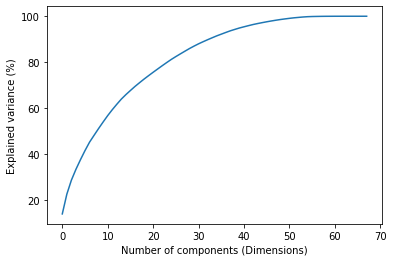

In [25]:
from matplotlib import pyplot

# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
pca.fit(X_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
pyplot.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
pyplot.xlabel("Number of components (Dimensions)")
pyplot.ylabel("Explained variance (%)")

In [26]:
# Do feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
X_pca = pca.fit_transform(X_scaled)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

         0          1         2          3          4         5          6   \
0  6.967250  17.638584  6.941641  10.882892  -0.779274 -2.148910  16.089400   
1  2.284651   7.083609  4.436916   3.805317  29.194543  1.176551  -1.445921   
2  3.301728  15.773878  9.084219   6.500980   0.230327 -0.991790   9.929185   
3  3.028609   7.304824  4.983294   3.520210  25.254945  1.007160  -1.005994   
4  2.813722   6.815752  3.982626   3.051990  25.455027  1.026839  -1.475563   

         7         8         9   ...        30        31        32        33  \
0 -1.685789  1.086221  2.865799  ...  1.812882  3.573343  0.787439 -0.122613   
1 -1.881332  2.532338 -3.309982  ...  0.906154 -0.161268  0.956941  1.184431   
2  1.112610 -2.460583  2.960483  ...  3.783922  0.324018 -1.487216  0.691570   
3 -1.491178  2.203279 -3.194872  ...  0.572833 -0.189340 -0.356877  1.528547   
4 -1.553987  2.326895 -3.278137  ...  0.665646 -0.465789  0.542671  1.395257   

         34        35        36        37   

Cumulative Explained variance at 40 components: 0.9488930709775898


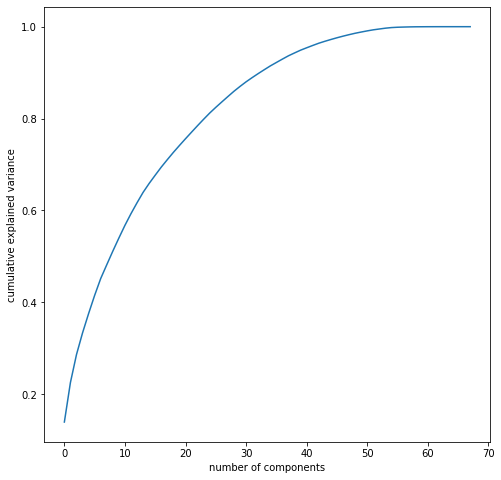

In [27]:
# Run PCA analysis and plot to assess cumulative variance based on the number of components

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(X_scaled):
    # Perform PCA on the data to reduce the number of initial features 
    # and to remove correlations that are common between pixel features 
    pca = PCA(n_components=X_scaled.shape[1])
    pca.fit(X_scaled)

    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance at 40 components:',sum(pca.explained_variance_ratio_[0:40]) )
    
plot_pca(X_scaled)

### OTHER CODE

In [28]:
# Code to download a new csv file after making all of the aforementioned adjustments

df.to_csv('ML1_data_adj_v3.csv', index=False)

# DATA PREPARATION PART 2

### MODELING DATASET

The final data set that will be used to model has the following characteristics:

Number of rows = 89,713

Number of explanatory variables = 68 

Number of unique tickers = 396

Time frame = weekly data during the following four and a half year period (12/30/16 - 7/1/21)

New variables (as detailed above but summarized as follows):

NEW GROWTH MEASURES

Variables premised on capturing weekly changes in consensus EPS that are greater than or less than -10%, respectively. The theory behind this is that such large changes may evidence that "things have changed" for the better or worse.

• Integer value labeled as "Best_EPS_Up_10_#M" and "Best_EPS_Dn_10_#M"

NEW STABILITY MEASURES
    
We also added to our list of stability variables after the previous labs given our desire to explore the efficacy of this category or variables.  This includes the following:
    
Per FactSet's online library, "FactSet calculates sigma as the percentage difference between the standard deviation of source estimates for a consensus and the mean consensus calculated using the same estimates. A sigma of 25% signifies that estimates vary by an average of 25% relative to the mean consensus. The sigma value is a useful indication of analysts’ visibility."  This measure was pulled on a current as well as current minus 3M, 6M and 1Y bases.
    
• Float value labeled as “Best_EPS_Sigma" and “Best_EPS_Sigma_#M".
    
Another variable that is new for this lab is one that showed efficacy during our SVM and logistic regression analysis and compares the current mean EPS with the current median EPS in order to capture the potential for positive or negative outliers.
    
• Float value labeled as “Best_EPS_Mean_Med".
   
We also sought to capture the range of current EPS estimates by subracting the low from the high current estimate.
    
• Float value labeled as “Best_EPS_Hi_Lo".
    
Coefficient of variation of the weekly 5 year EPS figures.
 
• Float value labeled as “Best_EPS_5Y_CV". 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89713 entries, 1220 to 94384
Data columns (total 74 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Date                   89713 non-null  object  
 1   ticker                 89713 non-null  object  
 2   Fwd_Best_EPS_6M        89713 non-null  float64 
 3   Fwd_Return_3M          89713 non-null  float64 
 4   Fwd_Return_3M_Class    89713 non-null  category
 5   Mkt_Cap                89713 non-null  float64 
 6   Sector                 89713 non-null  object  
 7   Best_EPS_1M            89713 non-null  float64 
 8   Best_EPS_3M            89713 non-null  float64 
 9   Best_EPS_6M            89713 non-null  float64 
 10  Best_EPS_1Y            89713 non-null  float64 
 11  Best_EPS_3Y            89713 non-null  float64 
 12  Best_EPS_5Y            89713 non-null  float64 
 13  Best_EPS_3M_v5Y        89713 non-null  float64 
 14  Best_EPS_6M_v5Y        89713 non-nu

# MODELLING AND EVALUATION 1

### CLASSIFICATION EVALUATION METRIC
For our classification analysis the response variable will be Fwd_Return_3M_Class as we are looking to predict whether or not (1 or 0) a given stock in our data set outperforms the S&P 500 Equal Weighted Index during the next 3 month period. Given our dataset has a balanced amount for this response variable, we have decided to area under the curve (AUC) as our chosen performance metrics to assess our model.  AUC is relatively encompassing given it accounts for both precision and recall at various classification thresholds (versus accuracy which measures only one) and thus can assess the tradeoff between true positive rate and false positive rate.  We are assuming our target audience is long-only investment managers that are primarily focused on getting their "buys" right (i.e. they aren't shorting stocks) with their limited amount of capital thus focusing on the positive rate is deemed applicable for our analysis. 

### REGRESSION EVALUATION METRIC
For our regression analysis the response variable will be Fwd_Best_EPS_6M as we are looking to predict 6 month annualized FORWARD (i.e. future) consensus EPS growth (captures absolute EPS growth). The investment industry is predicated on not only making good incremental decisions but arguably more importantly on not making large errors as doing so can not only threaten career longevity but also mathematically create large difficulties to overcome. As such, given RMSE is most useful when large errors are particularly undesirable we will use it as our chosen performance metric to assess our model. 

# MODELLING AND EVALUATION 2

### CLASSIFICATION DATA DIVISION
In terms of splitting our data into training and testing splits we will use stratified 10-fold cross validation which is premised on such method helping to lower variance over a single hold-out set which is not especially large in size (~18k rows).  While this is more computationally expensive we think the improved bias and variance from such method as well as enabling every data point to be tested is deemed favorable for our analysis.  This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class thus keeping the class balanced.

### REGRESSION DATA DIVISION
In terms of splitting our data into training and testing splits we will use 10-fold cross validation (not stratified given this is a regression not classification model) which is premised on such method helping to lower variance over a single hold-out set which is not especially large in size (~18k rows).  While this is more computationally expensive we think the improved bias and variance from such method as well as enabling every data point to be tested is deemed favorable for our analysis.  

# MODELLING AND EVALUATION 3

## CLASSIFICATION MODEL BUILDING

### PRELIMINARY CLASSIFACTION TESTING 

The code used below that served as a framework for our model building efforts is sourced from the following github site by Dr. Jake Drew.  https://nbviewer.org/github/jakemdrew/MachineLearningExtras/blob/master/LFW%20Dataset%20and%20Class%20Imbalance.ipynb

Before we began building individual models, we decided to run a "preliminary" test whereby we calculated mean AUC for several models ('DecisionTreeClassifier', 'RandomForestClassifier', 'LinearSVC', 'LogisticRegression', 'ExtraTreesClassifer', 'GradientBoostingClassifier', 'BaggingClassifier', 'KNeighborsClassifier').  We did not seek to tune these models as we left all the default settings in place and we also only used 3 k-fold splits for the data due to the time running such models.  At 3 fold we made the assumption that the outputs would provide enough statistical results that we could then decide on which three models we would then build and tune.  Based on the mean AUC results below, we found the following to be the top 3 models thus we will proceed in modelling the data with such classification algorithms.

TOP 3 = Random Forest, Bagging and Extra Trees 

Below detail our efforts to build an tune each of these 3 algorithms.  Note, each of these will have 2 iterations, whereby the first model tunes the model for our dataset without dimension reduction.  Then after completing such model, we applied it to our principle component data (previously detailed) in order to assess performance and whether this was beneficial or not.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=3,shuffle=True, random_state=123)

def stratified_cross_validate(model, X_scaled, ycv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, X_scaled, ycv, cv=cv, scoring="roc_auc", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean AUC: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [30]:
# Sklearn Classifiers 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [
    DecisionTreeClassifier(random_state=123),
    RandomForestClassifier(random_state=123),
    LinearSVC(random_state=123),
    LogisticRegression(random_state=123),
    ExtraTreesClassifier(random_state=123),
    GradientBoostingClassifier(random_state=123),
    BaggingClassifier(random_state=123),
    KNeighborsClassifier()
]

model_names = ['DecisionTreeClassifier','RandomForestClassifier','LinearSVC','LogisticRegression','ExtraTreesClassifer',
              'GradientBoostingClassifier', 'BaggingClassifier', 'KNeighborsClassifier']


def test_models(X_scaled, ycv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        stratified_cross_validate(model,X_scaled,ycv)
        print(' ')

In [32]:
test_models(X_scaled,ycv)

DecisionTreeClassifier
--------------------------------
Fold Scores:
 
[0.82497368 0.81052041 0.81758585]
 
Mean AUC:  0.8176933129370519
Mean Fit Time:  6.401692469914754
Mean Score Time:  0.012348175048828125
CV Time:  8.113508939743042
 
RandomForestClassifier
--------------------------------
Fold Scores:
 
[0.94173266 0.94139429 0.94089909]
 
Mean AUC:  0.941342009780087
Mean Fit Time:  58.42691493034363
Mean Score Time:  0.7460300922393799
CV Time:  60.60169982910156
 
LinearSVC
--------------------------------
Fold Scores:
 
[0.5682146  0.5589758  0.57002532]
 
Mean AUC:  0.5657385740595576
Mean Fit Time:  43.430399656295776
Mean Score Time:  0.02082959810892741
CV Time:  44.22502779960632
 
LogisticRegression
--------------------------------
Fold Scores:
 
[0.56982613 0.56000378 0.5706689 ]
 
Mean AUC:  0.5668329372834023
Mean Fit Time:  1.4479479789733887
Mean Score Time:  0.015622536341349283
CV Time:  1.7812211513519287
 
ExtraTreesClassifer
--------------------------------
F

### CLASSIFICATION MODEL 1 - RANDOM FOREST

Summary results from our random forest classification modelling efforts:

Mean AUC from 10-fold cross validation was 0.954 and 0.928 for our models that used all the variables and the PCA data, respectively.  Surprisingly, the PCA model took longer to run.  As such, with the first random forest model performing better and taking less time, we'd recommend it between the two.

HYPERPARAMETER TUNING

n_estimators = The default is 100 and is the number of trees in the forest, started with the default of 100 and tested above this and below this up to 2000 and found that the default of 100 was much faster but a few one-hundredth of a percentage worse in performance thus we went with 2000 as the running time was not overly problematic.

criterion = This function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.  We tested each and found "entropy" to be slightly better so we went with this.

max_depth = None is the default as in this case nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.  We tried various values (25, 50, 100) and found that leaving the default of None was most additive to performance so we used this.

n_jobs = None is the default but we decided to use -1 which means using all processors in efforts to speed up training time.

min_samples_split = The default is 2 which is the minimum number of samples required to split an internal node.  We tried slightly higher values and it detracted from performance so we went with 2.  

max_leaf_nodes = Default is none which is unlimited number of leaf nodes.  This parameter grows trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. We tried values up to 1000 and found no added performance benefit so we went with the default value of None.

bootstrap = Default is True and states whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.  We tried both True and False and found performance to be the same but True to be faster thus we went with True.

verbose = Default is 0 and this controls the verbosity when fitting and predicting.  We tried values up to 5 and found no added performance benefit and slight increase in running time thus we went with the default of 0.

class_weight = Default is None though we used balanced as we knew from previous analyses that the predictions were positively skewed thus we used "balanced" in case there was any underlying balance issue.

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=123)

def stratified_cross_validate(model, X_scaled, ycv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, X_scaled, ycv, cv=cv, scoring="roc_auc", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean AUC: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [32]:
from sklearn.ensemble import RandomForestClassifier

# train model
models = [
    RandomForestClassifier(n_estimators=2000, criterion='entropy', max_depth=None, n_jobs=-1, min_samples_split=2, 
                           max_leaf_nodes = None, bootstrap = True, verbose = 0, class_weight = 'balanced',random_state=123),
    ]

model_names = ['RandomForestClassifier']

def test_models(X_scaled, ycv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        stratified_cross_validate(model,X_scaled,ycv)
        print(' ')

In [35]:
test_models(X_scaled,ycv)

RandomForestClassifier
--------------------------------
Fold Scores:
 
[0.95337268 0.95672552 0.95348417 0.95400606 0.95717724 0.95191919
 0.94801655 0.95464171 0.95603873 0.95866034]
 
Mean AUC:  0.9544042197635022
Mean Fit Time:  2861.6028806209565
Mean Score Time:  37.07052395343781
CV Time:  4278.407361507416
 


#### CLASSIFICATION MODEL 1 - RANDOM FOREST WITH PCA

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import StratifiedKFold
Xpca = X_pca.values
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=123)

def stratified_cross_validate(model, Xpca, ycv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, Xpca, ycv, cv=cv, scoring="roc_auc", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean AUC: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [34]:
# train model
models = [
    RandomForestClassifier(n_estimators=2000, criterion='entropy', max_depth=None, n_jobs=-1, min_samples_split=2, 
                           max_leaf_nodes = None, bootstrap = True, verbose = 0, class_weight = 'balanced',random_state=123),
    ]
model_names = ['RandomForestClassifier']

def test_models(Xpca, ycv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        stratified_cross_validate(model,Xpca,ycv)
        print(' ')

In [38]:
test_models(Xpca,ycv)

RandomForestClassifier
--------------------------------
Fold Scores:
 
[0.93037044 0.93179216 0.9271137  0.92823318 0.92852033 0.92436777
 0.9197888  0.92863032 0.93222793 0.93172471]
 
Mean AUC:  0.9282769321443218
Mean Fit Time:  3624.9267065763474
Mean Score Time:  46.81329493522644
CV Time:  5421.480015039444
 


### CLASSIFICATION MODEL 2 - EXTRA TREES

Summary results from our extra trees classification modelling efforts:

Mean Area Under the Curve (AUC) from 10-fold cross validation was .94 when using all variables and .92 for variable reduction (PCA).  Since AUC is the metric for determining the superior model and we see no significant difference in time to run the model, Extra Trees Classification using all variables, will compete against the other models.

HYPERPARAMETER TUNING

n_estimators = We used the default 100 for number of trees because we saw no meaningful change when increasing to 1000.

criterion = We used the default 'entropy' for quality of a split because the other option 'gini' provided no advantage.

max_depth = We wnat all the leaves to be pure (can't be split further) and so we used default of 'None'

min_samples_split = We said the number of samples to split a node at the default of 2.  Performance declined 
as we increased the number

min_samples_leaf = Using this tuner (minimum samples required to be at a leafe node) could bare more fruit with 
regression so it was left to default=1

min_weight_fraction_leaf = Default of 0 so each sample has equal weight

max_features = We chose default of square root which takes square root of all features and uses that when looking 
for best split
                                               
max_leaf_nodes = Default is none which is unlimited number of leaf nodes.  This parameter grows trees with
max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. We tried values 
up to 1000 and found no added performance benefit so we went with the default value of None.

min_impurity_decrease = The default was chosen because node gets split if split causes decrease in N amount of impurity
                                                                                            
bootstrap = Default is True and states whether bootstrap samples are used when building trees. If False, the whole dataset
is used to build each tree.  We tried both True and False and found performance to be the same but True to be faster 
thus we went with True.

oob_score = This provided zero gain and so we left it to default of False

n_jobs = None is the default but we decided to use -1 which means using all processors in efforts to speed up training time.
                                               
verbose = Default is 0 and this controls the verbosity when fitting and predicting.  We tried values up to 5 and found 
no added performance benefit and slight increase in running time thus we went with the default of 0.

warm_start = Adds more estimators but when we did this, no gains in AUC were observed.  Set to default 'False'
                                               
class_weight = Default is None though we used balanced as we knew from previous analyses that the 
predictions were positively skewed thus we used "balanced" in case there was any underlying balance issue.

ccp_alpha = setting this to anything other than the default of 0 (No pruning is done) is producing nulls in AUC

max_samples = Anything other than a default of 0 reduces AUC by 30%-50%

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=123)

def stratified_cross_validate(model, X_scaled, ycv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, X_scaled, ycv, cv=cv, scoring="roc_auc", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean AUC: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

# train model
models = [
    ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_depth=None, n_jobs=-1, min_samples_split=2, 
                           max_leaf_nodes = None, bootstrap = True, class_weight = 'balanced', verbose = 0,random_state=123)]

model_names = ['ExtraTreesClassifier']

def test_models(X_scaled, ycv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        stratified_cross_validate(model,X_scaled,ycv)
        print(' ')

In [41]:
test_models(X_scaled,ycv)

ExtraTreesClassifier
--------------------------------
Fold Scores:
 
[0.9397576  0.94242195 0.93825809 0.94054054 0.94177644 0.93644544
 0.93195172 0.94153381 0.94352687 0.94355824]
 
Mean AUC:  0.9399770687422586
Mean Fit Time:  21.939580512046813
Mean Score Time:  3.4207658529281617
CV Time:  43.12819266319275
 


#### CLASSIFICATION MODEL 2 - EXTRA TREES WITH PCA

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import StratifiedKFold
Xpca = X_pca.values
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=123)

def stratified_cross_validate(model, Xpca, ycv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, Xpca, ycv, cv=cv, scoring="roc_auc", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean AUC: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [38]:
from sklearn.ensemble import ExtraTreesClassifier

# train model
models = [
    ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_depth=None, n_jobs=-1, min_samples_split=2, 
                           max_leaf_nodes = None, bootstrap = True, class_weight = 'balanced', verbose = 0,random_state=123),
    ]

model_names = ['ExtraTreesClassifier']

def test_models(Xpca, ycv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        stratified_cross_validate(model,Xpca,ycv)
        print(' ')

In [44]:
test_models(Xpca,ycv)

ExtraTreesClassifier
--------------------------------
Fold Scores:
 
[0.92611237 0.92594591 0.92180704 0.92360751 0.92234041 0.91886938
 0.91749525 0.92459633 0.92623336 0.92636511]
 
Mean AUC:  0.9233372675160375
Mean Fit Time:  28.425539112091066
Mean Score Time:  1.5600753545761108
CV Time:  44.797738552093506
 


### CLASSIFICATION MODEL 3 - BAGGING

The mean Area Under the Curve (AUC) from a 10-fold cross validation was 0.955 when using all of the variables.
The mean Area Under the Curve (AUC) from a 10-fold cross validation was 0.921 when using variable reduction (PCA).

Further notes, the run time for the PCA was 2 minutes faster (15 mins) compared to that of all variables (18 mins).

Hyperparameter Tuning for Bagging Classification

These paramaters were kept as defaults:
- Base_estimator; None was kept as we decided not to start with a base estimator in order to produce decision trees
- Max_samples; 1.0 was kept since increasing the number to 100 had no affect on the AUC
- Max_features; 1.0 was kept since increasing the number to 20 had lowered the AUC
- bootstrap; True was kept since as we wanted the samples to be drawn with a replacement, otherwise we might have ran out of adequate samples to produce a classification
- bootstrap_features; was kept since we decided the previous paramater was True
- oob_score; False was kept as we did not want to use samples out of the sample pool to generalize an error
- warm_start; False was kept since changing to True did not affect the AUC and was computationally extensive
- verbose; 0 was kept in order to control the number of variables when fitting

These parameters were changed:
- n_estimators; 100 was used instead of the deafult. We kept 100 as increasing to 2000 took a lot of unncessary time and did not affect the AUC
- n_jobs; -1 was used in order to use all of the processors in an effort to speed up the run time for training
- random_state; 123 was used in order to keep consistency among alternative models


In [39]:
from sklearn.model_selection import cross_validate
import time

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=123)

def stratified_cross_validate(model, X_scaled, ycv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, X_scaled, ycv, cv=cv, scoring="roc_auc", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean AUC: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [40]:
from sklearn.ensemble import BaggingClassifier

# train model
models = [
    BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0, 
                      bootstrap=True, bootstrap_features=False, oob_score=False,warm_start=False, 
                      n_jobs=-1, random_state=123, verbose=0)]

model_names = ['BaggingClassifer']

def test_models(X_scaled, ycv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        stratified_cross_validate(model,X_scaled,ycv)
        print(' ')

In [47]:
test_models(X_scaled,ycv)

BaggingClassifer
--------------------------------
Fold Scores:
 
[0.95442105 0.95791929 0.95533136 0.95506381 0.95827848 0.95268465
 0.94782419 0.95518674 0.95683178 0.95906867]
 
Mean AUC:  0.9552610024360156
Mean Fit Time:  694.8959147930145
Mean Score Time:  2.2170016050338743
CV Time:  1026.3812942504883
 


#### CLASSIFICATION MODEL 3 - BAGGING WITH PCA

In [41]:
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import StratifiedKFold
Xpca = X_pca.values
cv = StratifiedKFold(n_splits=10,shuffle=True, random_state=123)

def stratified_cross_validate(model, Xpca, ycv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, Xpca, ycv, cv=cv, scoring="roc_auc", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean AUC: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [42]:
from sklearn.ensemble import BaggingClassifier

# train model
models = [
    BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0, 
                      bootstrap=True, bootstrap_features=False, oob_score=False,warm_start=False, 
                      n_jobs=-1, random_state=123, verbose=0)
    ]

model_names = ['BaggingClassifierPCA']

def test_models(Xpca, ycv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        stratified_cross_validate(model,Xpca,ycv)
        print(' ')

In [50]:
test_models(Xpca,ycv)

BaggingClassifierPCA
--------------------------------
Fold Scores:
 
[0.92286292 0.92514691 0.92026197 0.92370038 0.92069159 0.91664536
 0.9112977  0.92184082 0.92690581 0.92595297]
 
Mean AUC:  0.9215306428184554
Mean Fit Time:  590.0387603998184
Mean Score Time:  1.6963661193847657
CV Time:  870.8744666576385
 


### FINAL CLASSIFICATION MODEL DECISION

With AUC as our chosen performance metric and the Bagging Classification model using all the variables in the dataset performing best on this metric as it slightly beat the Random Forest model but also was much faster, thus we consider this our recommended classification model for this analysis.

## PRELIMINARY REGRESSION TESTING

The code used below that served as a framework for our model building efforts is sourced from the following github site by Dr. Jake Drew.  https://nbviewer.org/github/jakemdrew/MachineLearningExtras/blob/master/LFW%20Dataset%20and%20Class%20Imbalance.ipynb

Before we began building individual models, we decided to run a "preliminary" test whereby we calculated mean RMSE's for several models ('DecisionTreerRegressor', 'RandomForestRegressor', 'LinearSVR', 'ExtraTreesRegressor', 'GradientBoostingRegressor', 'BaggingRegressor', 'KNeighborsRegressor').  We did not seek to tune these models, just using the default parameters and we also only used 3 k-fold splits for the data due to the time running such models.  At 3 fold we made the assumption that the outputs would provide enough statistical results that we could then decide on which three models we would build and tune.  Based on the mean RMSE results below, we found the following to be the top 3 models thus we will proceed in modelling the data with such regression algorithms.

TOP 3 = Extra trees, random forest, bagging

Below detail our efforts to build an tune each of these 3 algorithms.  Note, each of these will have 2 iterations, whereby the first model tunes the model for our dataset without dimension reduction.  Then after completing such model, we applied it to our principle component data (previously detailed) in order to assess performance and whether this was beneficial or not.

NOTE:  The code and output below shows all the RMSE values as negative.  This is due to the following explanation on the scikit learn site explaining their scoring parameters which says, "All scorer objects follow the convention that higher return values are better than lower return values. Thus metrics which measure the distance between the model and the data, like metrics.mean_squared_error, are available as neg_mean_squared_error which return the negated value of the metric."  As such, our use of the metric "neg_root_mean_squared_error" results in all negative values with the higher being better (for example -0.2 is better than -0.4).

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=2, random_state=123)

def shuffle_cross_validate(model, X_scaled, yrv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, X_scaled, yrv, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean RMSE: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [44]:
# Sklearn Classifiers 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

models = [
    DecisionTreeRegressor(random_state=123),
    RandomForestRegressor(random_state=123),
    LinearSVR(random_state=123),
    ExtraTreesRegressor(random_state=123),
    GradientBoostingRegressor(random_state=123),
    BaggingRegressor(random_state=123),
    KNeighborsRegressor()
]

model_names = ['DecisionTreeRegressor','RandomForestRegressor','LinearSVR','ExtraTreesRegressor',
              'GradientBoostingRegressor', 'BaggingRegressor', 'KNeighborsRegressor']


def test_models(X_scaled, yrv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        shuffle_cross_validate(model,X_scaled,yrv)
        print(' ')

In [53]:
test_models(X_scaled,yrv)

DecisionTreeRegressor
--------------------------------
Fold Scores:
 
[-0.24584364 -0.33661638]
 
Mean RMSE:  -0.2912300113909478
Mean Fit Time:  11.164619326591492
Mean Score Time:  0.015661001205444336
CV Time:  11.617900371551514
 
RandomForestRegressor
--------------------------------
Fold Scores:
 
[-0.15294805 -0.27919131]
 
Mean RMSE:  -0.2160696813203335
Mean Fit Time:  694.8682347536087
Mean Score Time:  0.4140588045120239
CV Time:  695.9120078086853
 
LinearSVR
--------------------------------
Fold Scores:
 
[-1.14581615 -1.31341563]
 
Mean RMSE:  -1.2296158874469332
Mean Fit Time:  49.64737010002136
Mean Score Time:  0.00784456729888916
CV Time:  50.072067737579346
 
ExtraTreesRegressor
--------------------------------
Fold Scores:
 
[-0.13458333 -0.19985895]
 
Mean RMSE:  -0.16722114025222423
Mean Fit Time:  206.99831414222717
Mean Score Time:  0.43119633197784424
CV Time:  208.5977201461792
 
GradientBoostingRegressor
--------------------------------
Fold Scores:
 
[-0.428

### REGRESSION MODEL 1 - EXTRA TREES

Summary results from our Extra Trees regression modelling efforts:

Mean RMSE from 10-fold cross validation was -.202 when we used all variables and -.425 for our PCA model.  Using All Variables performed better and didn't perform much worse in time to run the model and so Extra Trees Regressor, using all variables will compete against the other Regression Models

HYPERPARAMETER TUNING

n_estimators = We used the default 100 For number of trees because we saw no meaningful change when increasing to 500.

criterion = We used the default 'squared error' for quality of a split because our metric for choosing a regression model
is RMSE.

max_depth = We want all the leaves to be pure (can't be split further) and so we used default of 'None'

min_samples_split = The default is 2 but we saw a .1 reduction in RMSE when setting number to 5 As we increase past 5
performance begins to decline

min_samples_leaf = We set to default 1, because any increase increased RMSE

min_weight_fraction_leaf = Default of 0 so each sample has equal weight

max_features = We chose default of square root which takes square root of all features and uses that when looking for 
best split
                                               
max_leaf_nodes = Default is none which is unlimited number of leaf nodes.  This parameter grows trees with
max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. 
We tried values up to 1000 and found no added performance benefit so we went with the default value of None.

min_impurity_decrease = The default was chosen because node gets split if split causes decrease in N amount of impurity
                                                                                            
bootstrap = Default is False which means entire data set is used to build trees.  Using this slightly reduced RMSE.

oob_score = This provided zero gain and so we left it to default of False

n_jobs = None is the default but we decided to use -1 which means using all processors in efforts to speed up training time.
                                               
verbose = Default is 0 and this controls the verbosity when fitting and predicting.  We tried values up to 5 and found 
no added performance benefit and slight increase in running time thus we went with the default of 0.

warm_start = Adds more estimators but when we did this, no gains in RMSE were observed.  Set to default 'False'
                                               
class_weight = Default is None though we used balanced as we knew from previous analyses that the predictions were 
positively skewed thus we used "balanced" in case there was any underlying balance issue.

ccp_alpha = setting this to anything other than the default of 0 (No pruning is done) produces a signifiant increase in RMSE

max_samples = Anything other than a default of 0 produces NA for RMSE

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=123)

def shuffle_cross_validate(model, X_scaled, yrv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, X_scaled, yrv, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean RMSE: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [46]:
# Train model
models = [
    ExtraTreesRegressor(min_samples_split = 5, max_leaf_nodes = None, 
                verbose = 0, random_state=123, n_jobs=-1)]

model_names = [ 'ExtraTreesRegressor']

def test_models(X_scaled, yrv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        shuffle_cross_validate(model,X_scaled,yrv)
        print(' ')

In [56]:
test_models(X_scaled,yrv)

ExtraTreesRegressor
--------------------------------
Fold Scores:
 
[-0.13699599 -0.2102035  -0.28043444 -0.24103034 -0.15299117 -0.25603904
 -0.25619566 -0.17891968 -0.17625123 -0.17390474]
 
Mean RMSE:  -0.2062965790695383
Mean Fit Time:  251.10239429473876
Mean Score Time:  1.989569115638733
CV Time:  371.80987310409546
 


#### REGRESSION MODEL 1 - EXTRA TREES WITH PCA

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=123)
Xpca = X_pca.values

def shuffle_cross_validate(model, Xpca, yrv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, Xpca, yrv, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean RMSE: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [48]:
# train model

models = [
    ExtraTreesRegressor(min_samples_split = 5, max_leaf_nodes = None, 
                verbose = 0, random_state=123, n_jobs=-1)]

model_names = [ 'ExtraTreesRegressor']


def test_models(Xpca, yrv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        shuffle_cross_validate(model,Xpca,yrv)
        print(' ')

In [59]:
test_models(Xpca,yrv)

ExtraTreesRegressor
--------------------------------
Fold Scores:
 
[-0.32420714 -0.44864614 -0.55980194 -0.35575008 -0.38398595 -0.43905709
 -0.41425534 -0.49679251 -0.34709877 -0.51843232]
 
Mean RMSE:  -0.42880272893633703
Mean Fit Time:  160.2604394197464
Mean Score Time:  1.2078197002410889
CV Time:  236.70100569725037
 


### REGRESSION MODEL 2 - RANDOM FOREST

Summary results from our random forest regression modelling efforts:

Mean RMSE from 10-fold cross validation was 0.232 and 0.531 for our models that used all the variables and the PCA data, respectively.  While the PCA model took less time to run, the performance was much better with the first random forest model so we'd recommend it between the two.

HYPERPARAMETER TUNING

n_estimators = The default is 100 and is the number of trees in the forest, started with the default of 100 and tested above this and below this.  We tried going up to 1000 as we did with the random forest classification model above but it was time prohibitive as it took hours to run.  We found increasing n_estimators was slightly additive thus we settled on using 150 as this was not time prohibitive.

max_depth = None is the default as in this case nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.  We tried various values (25, 50, 100) and found that leaving the default of None was most additive to performance so we used this.

n_jobs = None is the default but we decided to use -1 which means using all processors in efforts to speed up training time.

min_samples_split = The default is 2 which is the minimum number of samples required to split an internal node.  We tried slightly higher values and it detracted from performance so we went with 2.  

max_leaf_nodes = Default is none which is unlimited number of leaf nodes.  This parameter grows trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. We tried values up to 1000 and found no added performance benefit so we went with the default value of None.

bootstrap = Default is True and states whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.  We tried both True and False and found performance to be the same but True to be faster thus we went with True.

verbose = Default is 0 and this controls the verbosity when fitting and predicting.  We tried values up to 5 and found no added performance benefit and slight increase in running time thus we went with the default of 0.

warm_start = Default is False but when set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest.  We tried both and found True to be slightly additive so went with it.

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=123)

def shuffle_cross_validate(model, X_scaled, yrv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, X_scaled, yrv, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean RMSE: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [50]:
# Train model
models = [
    RandomForestRegressor(n_estimators = 500, max_depth=None, min_samples_split=2, 
                          max_leaf_nodes = None, bootstrap = True, verbose = 0, 
                          random_state=123, n_jobs=-1, warm_start = True)
    ]

model_names = [ 'RandomForestRegressor']

def test_models(X_scaled, yrv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        shuffle_cross_validate(model,X_scaled,yrv)
        print(' ')

In [62]:
test_models(X_scaled,yrv)

RandomForestRegressor
--------------------------------
Fold Scores:
 
[-0.15026699 -0.27304805 -0.24278116 -0.22712026 -0.18198579 -0.41817454
 -0.28355133 -0.22930788 -0.15089976 -0.16689316]
 
Mean RMSE:  -0.2324028922858386
Mean Fit Time:  4153.20364151001
Mean Score Time:  20.177792358398438
CV Time:  6139.615372657776
 


#### REGRESSION MODEL 2 - RANDOM FOREST WITH PCA

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=123)
Xpca = X_pca.values

def shuffle_cross_validate(model, Xpca, yrv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, Xpca, yrv, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean RMSE: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [52]:
# train model

models = [
    RandomForestRegressor(n_estimators = 150, max_depth=None, min_samples_split=2, 
                          max_leaf_nodes = None, bootstrap = True, verbose = 0, 
                          random_state=123, n_jobs=-1, warm_start = True)
    ]

model_names = [ 'RandomForestRegressor']


def test_models(Xpca, yrv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        shuffle_cross_validate(model,Xpca,yrv)
        print(' ')

In [65]:
test_models(Xpca,yrv)

RandomForestRegressor
--------------------------------
Fold Scores:
 
[-0.42336948 -0.55653006 -0.62093085 -0.51230144 -0.47945428 -0.54265829
 -0.47348921 -0.65813725 -0.41189028 -0.65949085]
 
Mean RMSE:  -0.5338251981414237
Mean Fit Time:  1144.4334791660308
Mean Score Time:  2.5580936431884767
CV Time:  1700.9785511493683
 


### REGRESSION MODEL 3 - BAGGING

The mean RMSE from a 10-fold cross validation was -0.234 when using all of the variables.
The mean RMSE from a 10-fold cross validation was -0.535 when using variable reduction (PCA).

Hyperparameter Tuning for Bagging Regression

These paramaters were kept as defaults:
- Base_estimator; None was kept as we decided not to start with a base estimator in order to produce decision trees
- Max_samples; 1.0 was kept since increasing the number to 100 had no affect on the AUC
- Max_features; 1.0 was kept since increasing the number to 20 had lowered the AUC
- bootstrap; True was kept since as we wanted the samples to be drawn with a replacement, otherwise we might have ran out of adequate samples to produce a classification
- bootstrap_features; was kept since we decided the previous paramater was True
- oob_score; False was kept as we did not want to use samples out of the sample pool to generalize an error
- warm_start; False was kept since changing to True did not affect the AUC and was computationally extensive
- verbose; 0 was kept in order to control the number of variables when fitting

These parameters were changed:
- n_estimators; 100 was used instead of the default. We kept 100 as increasing to 2000 took a lot of unncessary time and did not affect the AUC
- n_jobs; -1 was used in order to use all of the processors in an effort to speed up the run time for training (the run time was 5 minutes faster with -1 on the 2-fold)
- random_state; 123 was used in order to keep consistency among alternative models

In [53]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=123)

def shuffle_cross_validate(model, X_scaled, yrv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, X_scaled, yrv, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean RMSE: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [54]:
# Train model
models = [
    BaggingRegressor(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0, 
                        bootstrap=True, bootstrap_features=False, oob_score=False, 
                        warm_start=False, n_jobs=-1, random_state=123, verbose=0)]

model_names = [ 'BaggingRegressor']

def test_models(X_scaled, yrv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        shuffle_cross_validate(model,X_scaled,yrv)
        print(' ')

In [68]:
test_models(X_scaled,yrv)

BaggingRegressor
--------------------------------
Fold Scores:
 
[-0.1526986  -0.27014017 -0.25454218 -0.22492811 -0.18044348 -0.43149939
 -0.28924231 -0.22351528 -0.15460125 -0.16393583]
 
Mean RMSE:  -0.23455465959574034
Mean Fit Time:  848.9357865810395
Mean Score Time:  2.138648748397827
CV Time:  1269.567110300064
 


#### REGRESSION MODEL 3 - BAGGING WITH PCA

In [55]:
from sklearn.model_selection import cross_validate
import time
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, random_state=123)
Xpca = X_pca.values

def shuffle_cross_validate(model, Xpca, yrv, cv=cv):
    start = time.time()
    cv_results = cross_validate(model, Xpca, yrv, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1)
    elapsed_time = (time.time() - start) 
    print ('Fold Scores:')
    print(' ')
    print(cv_results['test_score'])
    print(' ')
    print('Mean RMSE: ', cv_results['test_score'].mean())
    print('Mean Fit Time: ', cv_results['fit_time'].mean())
    print('Mean Score Time: ', cv_results['score_time'].mean())
    print('CV Time: ', elapsed_time)
    return

In [56]:
# train model

models = [
    BaggingRegressor(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0, 
                        bootstrap=True, bootstrap_features=False, oob_score=False, 
                        warm_start=False, n_jobs=-1, random_state=123, verbose=0)]

model_names = [ 'BaggingRegressorPCA']


def test_models(Xpca, yrv):
    for model, model_name in zip(models,model_names):
        print(model_name)
        print('--------------------------------')
        shuffle_cross_validate(model,Xpca,yrv)
        print(' ')

In [71]:
test_models(Xpca,yrv)

BaggingRegressorPCA
--------------------------------
Fold Scores:
 
[-0.43195004 -0.57200875 -0.61941067 -0.51319524 -0.47838356 -0.55811279
 -0.50065251 -0.66171036 -0.41525182 -0.66205456]
 
Mean RMSE:  -0.5412730306515158
Mean Fit Time:  768.2481902122497
Mean Score Time:  2.0378188371658323
CV Time:  1137.102046251297
 


### FINAL REGRESSION MODEL DECISION

With RMSE as our chosen performance metric and the Extra Trees Regression model using all the variables in the dataset performing best on this metric, we consider this our recommended classification model for this analysis.

# MODELLING AND EVALUATION 4

## CLASSIFICATION MODEL ANALYSIS - BAGGING

By examining the ROC curve of the model, we are also able to gain more insight into its performance. As we can see, the resulting model below produces an ROC of .95, that is, the trade off between sensitivity and specificity is 95%. We can see from this measure of seperability, that .95 indicates very good performance.


C:\Users\jaywo\anaconda3\envs\ML7331\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


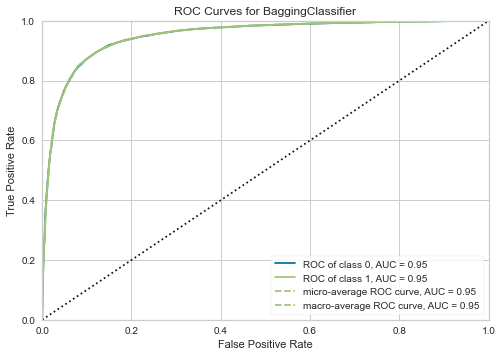

<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [57]:
from yellowbrick.classifier import ROCAUC

X_train, X_test, y_train, y_test = train_test_split(X_scaled, ycv, random_state=123)

model = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0, 
                      bootstrap=True, bootstrap_features=False, oob_score=False,warm_start=False, 
                      n_jobs=-1, random_state=123, verbose=0)

visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## REGRESSION MODEL ANALYSIS - EXTRA TREES

By examining the Prediction Error Plot we are able to view the actual targets from the dataset against the predicted values generated by our model. This will let us see how much variance is in the model by means of adjusted R-squared. As we can see, the adjusted R-squared of the resulting model below is .98, that is, 98% of the resulting model explains the variance in the data. 


C:\Users\jaywo\anaconda3\envs\ML7331\lib\site-packages\yellowbrick\base.py:390: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


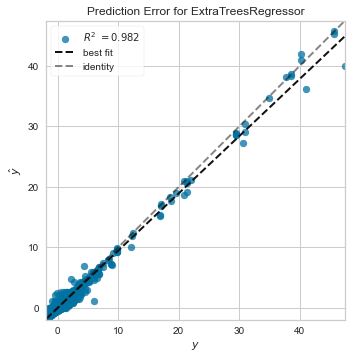

<AxesSubplot:title={'center':'Prediction Error for ExtraTreesRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [58]:
from yellowbrick.regressor import PredictionError

X_train, X_test, y_train, y_test = train_test_split(X_scaled, yrv, random_state=123)

model = ExtraTreesRegressor(min_samples_split = 5, max_leaf_nodes = None, 
                verbose = 0, random_state=123, n_jobs= 1)

visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# MODELLING AND EVALUATION 5

### CLASSIFICATION MODEL SUMMARY

TIME:
The model with the least time was the Extra Trees, which took approximately 1 minute to run. 
The model with the most time was the Random Forest, which took approximately 69 minutes to run.

Random Forest
- All variables: 4121 seconds (~69 minutes)
- PCA: 5629 (~94 minutes)

Extra Trees
- All variables: 44 seconds (~1 minute)
- PCA: 45 (~1 minute)

Bagging
- All variables: 949 seconds (~15 minutes)
- PCA: 871 (~15 minutes)

    
PERFORMANCE (AUC):
The model with the highest AUC was the Bagging, which had a score of 0.955 (slightly higher than Random Forest, which had a score of 0.954).
The model with the lowest AUC was the Extra Trees, which had a score of 0.940.

Random Forest
- All variables: 0.954
- PCA: 0.928

Extra Trees
- All variables: 0.940
- PCA: 0.923

Bagging
- All variables: 0.955
- PCA: 0.921
    
    
T-STATISTICS and P-VALUES BETWEEN MODELS:

Random Forest vs Extra Trees
- T-Statistics: 16.006
- P-Value: 0.000

- Conclusion: Since the p-value (0.000) was smaller than the alpha value (0.05), we reject the null hypothesis that
the performance of the Random Forest classifer is not statistically different than of the Extra Trees classifer.
- Therefore, we conclude that the performance of the Random Forest classifer IS statistically different than of the 
Extra Trees Classifer.


Random Forest vs Bagging 
- T-Statistics: 1.565
- P-Value: 0.178


- Conclusion: Since the p-value (0.178) was greater than the alpha value (0.05), we fail to reject the null hypothesis
that the performance of the Random Forest classifer is not statistically different than of the Bagging classifer.
- Therefore, we conclude that the performance of the Random Forest classifer IS NOT statistically different than of 
the Bagging Classifer.

    
Bagging vs Extra Trees 
- T-Statistics: 10.835
- P-Value: 0.001

- Conclusion: Since the p-value (0.001) was smaller than the alpha value (0.05), we reject the null hypothesis that
the performance of the Bagging classifer is not statistically different than of the Extra Trees classifer.
- Therefore, we conclude that the performance of the Bagging classifer IS statistically different than of the Extra 
Trees Classifer. 


Based on the information above.....

SUMMARY: Since there was sufficent evidence to suggest the performance of the Extra Trees classifer was statistically
different than that of the Random Forest classifer and the Bagging Classifer, we are now choosing between the Random
Forest classifer and the Bagging classifer. However, since there was sufficient evidence to suggest that the Random
Forest classifer was not statistically different than the Bagging classifer, we will chose the classification model
with the hightest AUC. Compared to the Random Forest classifer, the Bagging classifer was less computationally 
extensive and had a slightly larger AUC score. Therefore, the Bagging classifer is the model of choice when classifying.

    


### REGRESSION MODEL SUMMARY

TIME:
The model with the least time was the Extra Trees, which took approximately 7 minute to run. 
The model with the most time was the Random Forest, which took approximately 103 minutes to run.

Random Forest
- All variables: 6147 seconds (~103 minutes)
- PCA: 1699 seconds (~29 minutes)

Extra Trees
- All variables: 378 seconds (~7 minutes)
- PCA: 241 (~4 minutes)

Bagging
- All variables: 1282 seconds (~22 minutes)
- PCA: 1134 seconds (~19 minutes)


PERFORMANCE (RMSE):
The model with the smallest RMSE was the Extra Trees, which had a score of -0.206 (slightly smaller than Random Forest, which had a score of -0.232).
The model with the largest RMSE was the Bagging, which had a score of -0.235.

Random Forest
- All variables: -0.232
- PCA: -0.528

Extra Trees
- All variables: -0.206
- PCA: -0.436

Bagging
- All variables: -0.235
- PCA: -0.534


T-STATS and P-VALUES BETWEEN MODELS:

Random Forest vs Extra Trees
- T-Statistics: -0.799
- P-Value: 0.461

- Conclusion: Since the p-value (0.461) was greater than the alpha value (0.05), we fail to reject the null hypothesis
that the performance of the Random Forest regressor is not statistically different than of the Extra Trees regressor.
- Therefore, we conclude that the performance of the Random Forest regressor IS NOT statistically different than of 
the Extra Trees regressor.


Random Forest vs Bagging 
- T-Statistics: 0.058
- P-Value: 0.956

- Conclusion: Since the p-value (0.956) was greater than the alpha value (0.05), we fail to reject the null hypothesis
that the performance of the Random Forest regressor is not statistically different than of the Bagging classifer.
- Therefore, we conclude that the performance of the Random Forest regressor IS NOT statistically different than of 
the Bagging regressor.

    
Bagging vs Extra Trees 
- T-Statistics: -0.899
- P-Value: 0.410

- Conclusion: Since the p-value (0.410) was greater than the alpha value (0.05), we fail to reject the null hypothesis
that the performance of the Bagging regressor is not statistically different than of the Extra Trees regressor.
- Therefore, we conclude that the performance of the Bagging regressor IS NOT statistically different than of 
the Extra Trees regressor.


Based on the information above.....

SUMMARY: Since there was sufficient evidence to suggest that the performance among the Random Forest, Bagging, and 
Extra Trees was not statistically different, we chose the regression model that was the least computationally
extensive: the Extra Trees regressor. The Extra Trees regressor model and took the least amount of time AND had the
lowest RMSE score compared to the Random Forest regressor and the Bagging regressor.

Note:  We used the code from http://rasbt.github.io/mlxtend/user_guide/evaluate/paired_ttest_5x2cv/

In [73]:
from mlxtend.evaluate import paired_ttest_5x2cv

In [74]:
# Sklearn Classifiers 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [75]:
# Normalize / scale variables
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X) # find scalings for each column that make this zero mean and unit std
X_sc = scl_obj.transform(X) # apply to training

# Prep data
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_sc, yc, test_size=0.2, random_state=123)

RF1 = RandomForestClassifier(n_estimators=2000, criterion='entropy', max_depth=None, n_jobs=-1, 
                             min_samples_split=2, max_leaf_nodes = None, bootstrap = True, verbose = 0, 
                             class_weight = 'balanced',random_state=123)

ET1 = ExtraTreesClassifier(n_estimators=100, criterion='entropy', max_depth=None, n_jobs=-1, min_samples_split=2, 
                           max_leaf_nodes = None, bootstrap = True, class_weight = 'balanced', verbose = 0,random_state=123)
 
B1 = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0, 
                      bootstrap=True, bootstrap_features=False, oob_score=False,warm_start=False, 
                      n_jobs=-1, random_state=123, verbose=0)

In [76]:
# RF VS ET
t, p = paired_ttest_5x2cv(estimator1=RF1,
                          estimator2=ET1,
                          X=X_sc, y=yc,
                          random_seed=123)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:308: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator1.fit(X_1, y_1)
C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:309: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator2.fit(X_1, y_1)
C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:308: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator1.fit(X_1, y_1)
C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:309: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,)

t statistic: 16.006
p value: 0.000


In [77]:
# RF VS B
t, p = paired_ttest_5x2cv(estimator1=RF1,
                          estimator2=B1,
                          X=X_sc, y=yc,
                          random_seed=123)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:308: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator1.fit(X_1, y_1)
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:308: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

t statistic: 1.565
p value: 0.178


In [78]:
# B VS ET
t, p = paired_ttest_5x2cv(estimator1=B1,
                          estimator2=ET1,
                          X=X_sc, y=yc,
                          random_seed=123)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:309: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator2.fit(X_1, y_1)
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

t statistic: 10.835
p value: 0.000


In [79]:
# Sklearn Regressors 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [80]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_sc, yr, test_size=0.2, random_state=123)

ET2 = ExtraTreesRegressor(min_samples_split = 5, max_leaf_nodes = None, verbose = 0, random_state=123, n_jobs=-1) 
 
RF2 = RandomForestRegressor(n_estimators = 500, max_depth=None, min_samples_split=2, max_leaf_nodes = None, 
                            bootstrap = True, verbose = 0, random_state=123, n_jobs=-1, warm_start = True)

B2 = BaggingRegressor(base_estimator=None, n_estimators=100, max_samples=1.0, max_features=1.0, 
                        bootstrap=True, bootstrap_features=False, oob_score=False, 
                        warm_start=False, n_jobs=-1, random_state=123, verbose=0)

In [81]:
# RF VS ET
t, p = paired_ttest_5x2cv(estimator1=RF2,
                          estimator2=ET2,
                          X=X_sc, y=yr,
                          random_seed=123)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:308: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator1.fit(X_1, y_1)
C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:309: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator2.fit(X_1, y_1)
C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:308: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator1.fit(X_1, y_1)
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
C:\Users\jeffn\anaconda3\e

t statistic: -0.799
p value: 0.461


In [82]:
# RF VS B
t, p = paired_ttest_5x2cv(estimator1=RF2,
                          estimator2=B2,
                          X=X_sc, y=yr,
                          random_seed=123)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:308: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator1.fit(X_1, y_1)
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
C:\Users\jeffn\anaconda3\envs\ML\lib\s

C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:308: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator1.fit(X_1, y_1)
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py:368: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\jeffn\AppData\Roaming\Python\

t statistic: 0.058
p value: 0.956


In [83]:
# B VS ET
t, p = paired_ttest_5x2cv(estimator1=B2,
                          estimator2=ET2,
                          X=X_sc, y=yr,
                          random_seed=123)

print('t statistic: %.3f' % t)
print('p value: %.3f' % p)

C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\mlxtend\evaluate\ttest.py:309: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator2.fit(X_1, y_1)
C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )

t statistic: -0.899
p value: 0.410


# MODELLING AND EVALUATION 6

## ATTRIBUTE ANALYSIS INTRO

We chose to use Shapley (SHAP) values to perform attribute analysis on our final / recommended classification and regression models from above.  The SHAP value is a method used in game theory that involves fairly distributing both gains and costs to all variables individually.  The SHAP value makes sure that each variable gets a fair share depending on how much they contribute  and can show whether it is positively or negatively contributing to the target variable.  SHAP values can be calculated for any tree-based model, thus with tree based models performing well for our analysis we thought it was a good fit.

The attribute analysis below includes code that was sourced from the following article on SHAP value analysis.
https://aigerimshopenova.medium.com/random-forest-classifier-and-shap-how-to-understand-your-customers-and-interpret-a-black-box-model-6166d86820d9

## CLASSIFICATION MODEL ATTRIBUTE ANALYSIS

NOTE:  After running through the SHAP code below using our Bagging Classifier model we got the following error, "Exception: Model type not yet supported by TreeExplainer: <class 'sklearn.ensemble._bagging.BaggingClassifier'>".  It appears that this code doesn't support BaggingClassifier just yet.  Regardless, we remained interested in still exploring SHAP values given their utility seemed powerful for understanding feature importance for our classification task, thus we approached the analysis in a different manner.  

With this in mind we approached our analysis with the following steps:

We built default models of Bagging and Random Forest using our dataset in order to compute (regular / non-SHAP) feature importance values and then compared the top features from each of the models to see if there was sufficient commonality for us to use our second best classification model above, Random Forest, in order to calculate SHAP values.  We only focused on the top features given our task was to determine "Which attributes from your analysis are most important." The performance of these algorithms were very close and not statistically significant in terms of difference as detailed above (RF vs ET Summary = Since the p-value (0.131) was greater than the alpha value (0.05), we fail to reject the null hypothesis that the performance of the Random Forest classifer is not statistically different than of the Bagging classifer.), and based on the following online resource (www.machinelearningmastery.com), we went with the presumption that the models were similar in their outputs. "Bagging is an ensemble algorithm that fits multiple models on different subsets of a training dataset, then combines the predictions from all models. Random forest is an extension of bagging that also randomly selects subsets of features used in each data sample."

We then compared the top 5 features in both models and found the following:

BAGGING TOP 5 Features:  1, 34, 65, 61, 68 (Market Cap, Return_3M, FCF_Mgn, ROE, Op_Mgn)

RANDOM FOREST TOP 5 Features:  1, 65, 61, 58, 68 (Market Cap, FCF_Mgn, ROE, ROIC, Op_Mgn)

With 4 of the top 5 features the same (Bagging included Return_3M while Random Forest included ROIC), we decided this was sufficient evidence to enable us to fully answer the following questions with a Random Forest model and using SHAP values as though the exact SHAP values would differ slightly from the RF and ET models, the inference and hypotheses drawn would be the same:

"Which attributes from your analysis are most important? Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task."

Then we built a classification model without cross validation due to the added time cost (it takes a significant amount of time to calculated the SHAP values) though we used the tuning from the model built above.  

Then we calculated and plotted the SHAP values.  Details on our findings from such graphs are found below / in the markdown above each graph.

#### COMPARE FEATURE IMPORTANCE B/W BAGGING AND RANDOM FOREST

In [84]:
# Bagging feature importance

clf = BaggingClassifier(DecisionTreeClassifier())
clf.fit(X, yc)

feature_importances = np.mean([
    tree.feature_importances_ for tree in clf.estimators_
], axis=0)

C:\Users\jeffn\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


In [85]:
# print Bagging feature importances (unsorted)
print(feature_importances)

[0.03712358 0.00986348 0.0137845  0.01576543 0.0155075  0.01708785
 0.0160847  0.01346546 0.01299361 0.01516532 0.01953333 0.01430139
 0.01508458 0.01765631 0.01364465 0.00053941 0.00819717 0.0081233
 0.01215441 0.01164182 0.01052727 0.00742444 0.00756683 0.01174225
 0.01108143 0.01054067 0.00465404 0.00457463 0.00723077 0.00546655
 0.00551907 0.02113214 0.02550796 0.03308087 0.01653999 0.0119261
 0.02414556 0.0186886  0.01611526 0.01654635 0.01786253 0.01669634
 0.0183675  0.02213702 0.01771773 0.01749993 0.00104243 0.00081237
 0.0003423  0.02481973 0.00092749 0.00057725 0.00019938 0.02067882
 0.02127312 0.02198148 0.01485011 0.01146924 0.02766324 0.01331469
 0.01039206 0.02805305 0.01982607 0.01710326 0.03048968 0.02213717
 0.01546112 0.02857629]


In [86]:
# print feature importances (unsorted)
np.sort(feature_importances)

array([0.00019938, 0.0003423 , 0.00053941, 0.00057725, 0.00081237,
       0.00092749, 0.00104243, 0.00457463, 0.00465404, 0.00546655,
       0.00551907, 0.00723077, 0.00742444, 0.00756683, 0.0081233 ,
       0.00819717, 0.00986348, 0.01039206, 0.01052727, 0.01054067,
       0.01108143, 0.01146924, 0.01164182, 0.01174225, 0.0119261 ,
       0.01215441, 0.01299361, 0.01331469, 0.01346546, 0.01364465,
       0.0137845 , 0.01430139, 0.01485011, 0.01508458, 0.01516532,
       0.01546112, 0.0155075 , 0.01576543, 0.0160847 , 0.01611526,
       0.01653999, 0.01654635, 0.01669634, 0.01708785, 0.01710326,
       0.01749993, 0.01765631, 0.01771773, 0.01786253, 0.0183675 ,
       0.0186886 , 0.01953333, 0.01982607, 0.02067882, 0.02113214,
       0.02127312, 0.02198148, 0.02213702, 0.02213717, 0.02414556,
       0.02481973, 0.02550796, 0.02766324, 0.02805305, 0.02857629,
       0.03048968, 0.03308087, 0.03712358])

In [87]:
# Random forest feature importance
clf1 = RandomForestClassifier()
clf1.fit(X, yc)

feature_importances1 = np.mean([
    tree.feature_importances_ for tree in clf1.estimators_
], axis=0)

C:\Users\jeffn\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
# print Random Forest feature importances (unsorted)
print(feature_importances1)

[0.02637458 0.00945187 0.0152415  0.01597279 0.01741703 0.01761634
 0.01759881 0.0141914  0.01502401 0.01543327 0.01688628 0.01535855
 0.01644787 0.01828771 0.01626873 0.0011174  0.0120984  0.01188507
 0.01189645 0.01169147 0.01195261 0.01189162 0.01172247 0.01144429
 0.01111635 0.01132539 0.00955244 0.00915183 0.00855012 0.0074611
 0.00846481 0.01416939 0.01776457 0.02114685 0.02082055 0.01368655
 0.02305789 0.01770214 0.02042531 0.01966346 0.01948891 0.01860667
 0.01732579 0.01978961 0.01954029 0.01792683 0.00213158 0.00125473
 0.00061818 0.02280044 0.0013483  0.00070975 0.00025225 0.01717235
 0.0187917  0.02022448 0.01538298 0.01358557 0.02444743 0.01497224
 0.01369146 0.02460148 0.01776087 0.01649223 0.02501383 0.01844959
 0.01628339 0.02400775]


In [89]:
# print feature importances (sorted)
np.sort(feature_importances1)

array([0.00025225, 0.00061818, 0.00070975, 0.0011174 , 0.00125473,
       0.0013483 , 0.00213158, 0.0074611 , 0.00846481, 0.00855012,
       0.00915183, 0.00945187, 0.00955244, 0.01111635, 0.01132539,
       0.01144429, 0.01169147, 0.01172247, 0.01188507, 0.01189162,
       0.01189645, 0.01195261, 0.0120984 , 0.01358557, 0.01368655,
       0.01369146, 0.01416939, 0.0141914 , 0.01497224, 0.01502401,
       0.0152415 , 0.01535855, 0.01538298, 0.01543327, 0.01597279,
       0.01626873, 0.01628339, 0.01644787, 0.01649223, 0.01688628,
       0.01717235, 0.01732579, 0.01741703, 0.01759881, 0.01761634,
       0.01770214, 0.01776087, 0.01776457, 0.01792683, 0.01828771,
       0.01844959, 0.01860667, 0.0187917 , 0.01948891, 0.01954029,
       0.01966346, 0.01978961, 0.02022448, 0.02042531, 0.02082055,
       0.02114685, 0.02280044, 0.02305789, 0.02400775, 0.02444743,
       0.02460148, 0.02501383, 0.02637458])

#### SHAP MODELLING - CLASSIFICATION

In [60]:
# SHAP modelling - classification
import shap

# Prep data
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, yc, test_size=0.2, random_state=123)

# Train model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=100, max_leaf_nodes = 500, n_jobs=-1, random_state=123) 
# 
rfc.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(max_depth=100, max_leaf_nodes=500, n_jobs=-1,
                       random_state=123)

In [61]:
# Import the package
import shap
shap.initjs()

# Let us have a look on SHAP summary plot - classification
#%time
explainer_c = shap.TreeExplainer(rfc)
shap_values_c = explainer_c.shap_values(X_train, approximate=False, check_additivity=False)

#### SHAP ANALYSIS FINDINGS - CLASSIFICATION

This plot shows, in order from highest down, which attributes had the most impact on our classification task.

Summary thoughts:  Four of the top five metrics all have to do with profitability of a stock.  This confirms a theory we had going into this project, which was the higher the profitability of a company the better.  Not only for the EPS of a company does profitability matter, but also for the underlying stock price during the time frame of this analysis and within our dataset.  All of these metrics were captured by the non-SHAP calculation above on both RF and ET models except Mkt_Cap (market cap) was lessened in its importance.  This was pleasing to us as the market cap of a stock is simply a proxy for its size and is not a variable that we would like to see have predictive power in a model as the stock market often favors different size companies depending on the economic environment.  One can surmise that larger cap companies performed better during this time period, but that may not always be the case. 

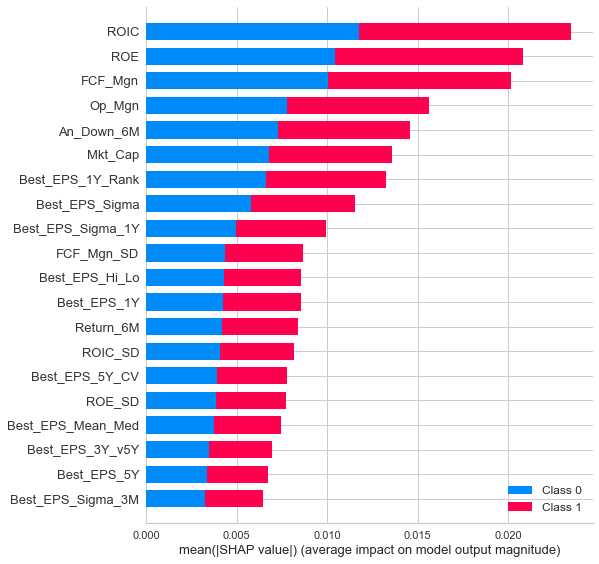

In [62]:
shap.summary_plot(shap_values_c, X_train, plot_type="bar")

This plot elaborates on the information in the previous plot by demonstrating the following information:

Feature importance: Variables are ranked in descending order.

Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

Summary thoughts:  For ROIC, ROE and FCF_Mgn (free cash flow margin), all of which are profitability measures as detailed above, one can see that both high and low values had positive and negative impact on the model, though with the red values showing up on the right side, one can conclude that the positive values had a greater impact on the model.  On the other hand was Op_Mgn (operating margin) which showed that the power of this metric was in the tails, both positive and negative but more so on the negative side.  An_Down_6M which details the second derivative of analyst estimate downgrades during the past 6 months showed a similar result as the top 3 metrics with actually higher numbers of analyst downward revisions from the most recent 3 months relative to 6 months being a positive indicator for the stock.

We detailed our theory regarding this metric proving to be powerful on the positive side (which is complex and somewhat counter intuitive) in our previous classification assignment and will copy that verbiage below in case one remains perplexed and would like more clarity:

"The most complex yet interesting variables were the top two which were An_Down and An_Down_6M which showed positive and negative relationships with the response variable, respectively. The overall theory we have for this result is based on the emotions of the stock market whereby negative sentiment towards a stock can be extrapolated incorrectly especially in the short term. To best explain what may be going on with these variables we will provide an example. Let's assume XYZ stock has a An_Down value of 100 which means that 100% of the analysts have revised their estimates down during the past 3 months. As such, this is deemed to be negative for the stock price during the next 3 months per our model. At this same time, let's assume the An_Down_6M value is also 100 which means that the An_Down value 6 months ago was 0 and implies that the negative revisions have taken place in recent months (i.e. this negative trend has not been in place for greater than 6 months). This implies that the sentiment towards EPS has turned down from where it was more recently. So how can this be a potential positive for the stock price in the next 3 months? This goes back to our extrapolation theory that when analysts get too negative too fast in the short term they may have become extrapolated incorrectly and become too pessimistic (and vice versa) in their estimates which the market will self correct by mean reverting the stock during the next 3 months."

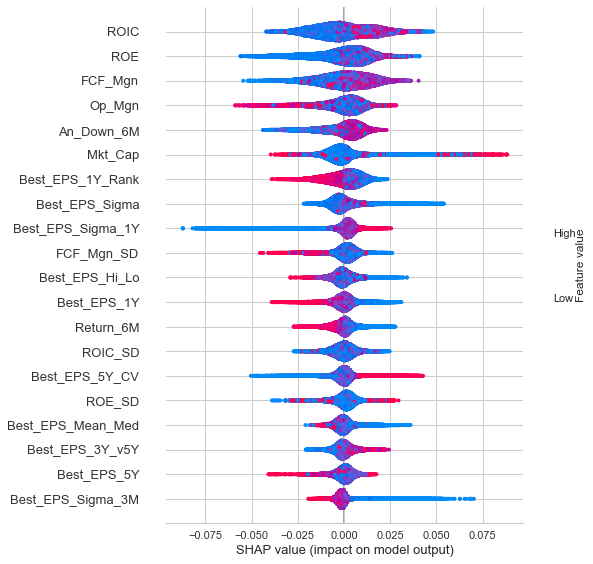

In [63]:
shap.summary_plot(shap_values_c[1], X_train)

## REGRESSION MODEL ATTRIBUTE ANALYSIS

Steps taken for this analysis:  

First, we built an extra trees regression model without cross validation due to the added time cost (SHAP calculations take a very long time) though we used the tuning from the final model recommended above.  

Then we calculated and plotted the SHAP values.  Details on our findings from such graphs are found below:

#### SHAP MODELLING - REGRESSION

In [64]:
# SHAP modelling - regression
import shap

# Prep data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, yr, test_size=0.2, random_state=123)

# Train model
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=100, max_depth=100, max_leaf_nodes = 500, n_jobs=-1, random_state=123)
etr.fit(X_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ExtraTreesRegressor(max_depth=100, max_leaf_nodes=500, n_jobs=-1,
                    random_state=123)

In [65]:
# Import the package
import shap
shap.initjs()

# Let us have a look on SHAP summary plot - classification
#%time
explainer_r = shap.TreeExplainer(etr)
shap_values_r = explainer_r.shap_values(X_train, approximate=False, check_additivity=False)

#### SHAP ANALYSIS FINDINGS - REGRESSION

This plot shows, in order from highest down, which attributes had the most impact on our regression task.

Summary thoughts:  We were not surprised to see several EPS stability measures (3Y R2, 5Y R2 Rank and Sigma), at the top of the list in terms of prediction power.  One theory we had with building this dataset was that by including several different stability / volatility measures for EPS, we would better be able to model / make predictions thus such results confirm our notions.  Most interesting was the top variable of Best_EPS_Dn_10_6M which counts the number of weekly changes in EPS during the past 6 months whereby EPS dropped by more than 10%.  This was one of our newly created variables and confirmed our theory of including this variable.  More details on this below.

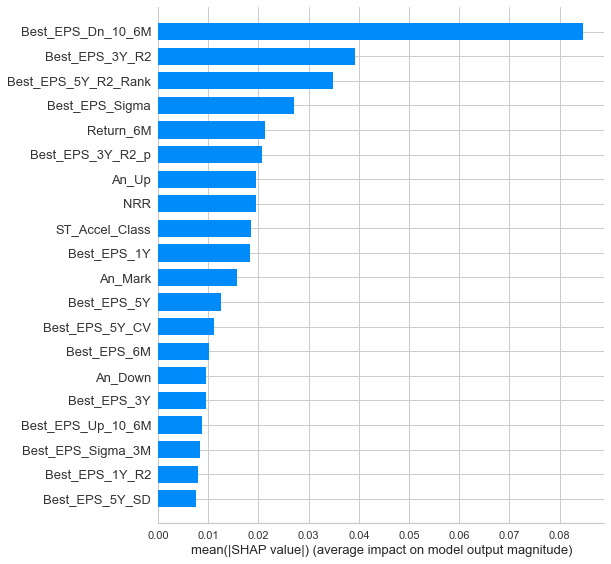

In [66]:
shap.summary_plot(shap_values_r, X_train, plot_type="bar")

This plot elaborates on the information in the previous plot by demonstrating the following information:

Feature importance: Variables are ranked in descending order.

Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.

Summary thoughts:  Not surprisingly, the Best_EPS_Dn_10_6M (explained above), showed its power in greater values which supports the theory that the more negative 10% weekly EPS changes during the past 6 months that a stock has the greater likelihood of negative trends to continue.  Basically, a user of this model should be cautious on an EPS basis with approaching stocks with high values for this metric.  The other top metrics are better explained using other graph techniques which are detailed below.

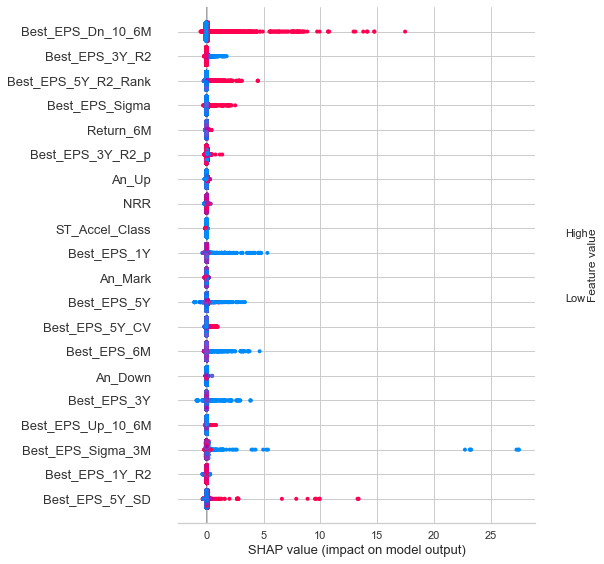

In [67]:
shap.summary_plot(shap_values_r, X_train)

The following plots are called partial dependence plots. These show the marginal effect features have on the predicted outcome of a model. It shows the relationship between the target and a feature, as well as included the feature (labeled on the right) that is most correlated with such feature (labeled on the left) 

We created dependence plots for four of the top five features, which we found interesting based on:

Best_EPS_Dn_10_6M - This also shows the higher the value (as detailed above), the more impactful this is with predictability.

Best_EPS_3Y_R2 - This plot showed a slightly negative relationship between the target and the feature, as seen in the slightly downward slope of the scatterplot.  This was surprising as we had assumed the higher the R2 the better, but that was not the case for this analysis and time period.  It also appears that the power of the feature is more so in the high and low values as shown by the red points on the plot.

Best_EPS_5Y_R2_Rank - On the other hand, EPS R2 on a 5 year basis showed a positive relationshp which is what we would have assumed to be the case.

Return_6M - The previous 6 month return of a stock also showed a positive relationship with predicting EPS as seen in the graph below, which aligns with our theory of momentum both in stock price and EPS and that such variables have some association with each other.

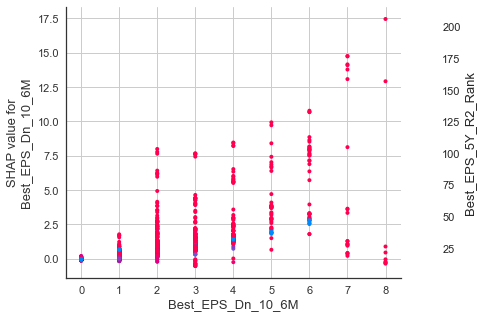

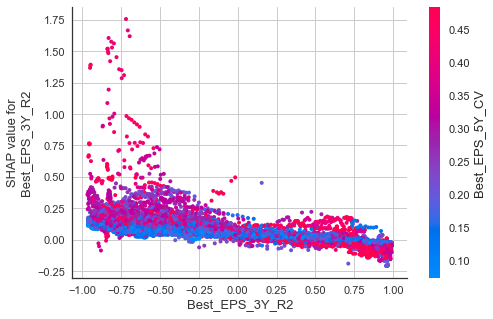

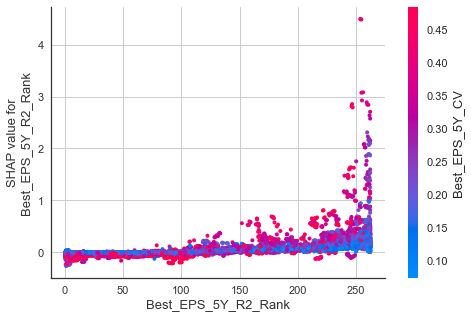

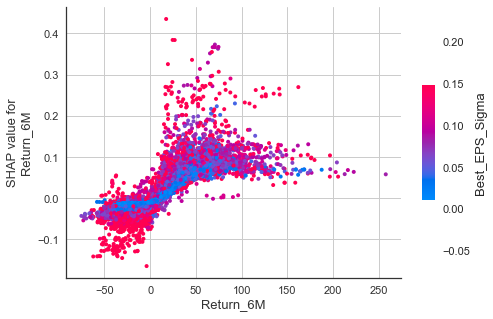

In [68]:
# Let's have a look on the top features and their dependence plots
top_features = ['Best_EPS_Dn_10_6M','Best_EPS_3Y_R2','Best_EPS_5Y_R2_Rank', 'Return_6M']

# Visualizing top features
for feature in top_features:
    shap.dependence_plot(feature, shap_values_r, X_train, interaction_index="auto")

# DEPLOYMENT

Based on the results from our modelling efforts above, we are relatively pleased with such performance outcomes.  In the highly competitive stock market, any edge is deemed to be attractive if it can be harnessed in an understandable and efficient manner which we believe our models do.  We are assuming our target audience is long-only investment managers that are primarily focused on getting their "buys" right (i.e. they aren't shorting stocks) with their limited amount of capital thus having two models which can aid them in their decision making is deemed to be positive.  With the classification model, a manager could use it assess their current and prospective holdings as to what the near term outlook is for the stock price during the next 3 months relative to the market as regardless of preferred holding perioeds, timing entries and exits is often very challenging.  With the regression model, a manager could use this to help better value stocks (the denominator in the P/E ratio) and/or understand the EPS trajectory of many stocks in an efficient manner.

In order to measure the model's value, we would suggest the user / manager document and track decisions made based on the models predictions and output and track these over time to assess the value added (or detracted) from such decisions.  For what matters most is not if it works accross the market (unless you are running an index-like fund), but rather if it aids your portfolio in performance and analysis efforts.

We would suggest deployment via some type of web app so that all the manager's team could see the prediction outputs in an interactive and efficient manner.  Given our data is on a weekly basis, we would recommend that our models be updated each week so that the users could see the latest predictions from the models.

Additional variables can easily be added and tested by comparing model performance from what we created.  Other potential ideas include valuation multiples and additional technical / price momentum indicators.

# EXCEPTIONAL WORK

For the exceptional work of this lab, we decided to do two things: 

Firstly, create a Random Forest Regressor model with Grid Search Cross-Validation hyperparameter tuning in order to find the most optimal hyperparameters. Grid Search CV exhaustively searches over specified parameter values for an estimator. The random forest regressor fits a number of classifying decision trees on various sub-samples of our dataset then averages them to improve predictive accuracy and controls over-fitting. By using Grid Search CV, we find the most optimized meta estimators; these estimators, which, have been seen in previous models as the most significant coefficients. However, this algorithm did not complete despite running it for 6 hours on a windows desktop with an i9 processor, using all available cores (n_jobs = -1). So, rather than pursue this option, we decided to utilize another boosting algorithm called CatBoost (which you may find more information on at the following URLS: https://catboost.ai/en/docs/ and https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329). CatBoost utilizes GradientBoostingClassifier on Decision Trees in order to optimize the arbitrary differentiable loss functions in the decision tree. Each binary classification special case is where only a single regression tree is induced. Gradient Boost builds an additive model in a forward stage-wise fashion, in which each stage n_classes_ regression trees are also fit on the negative gradient of the binomial deviance loss function.  

We performed a gridsearch on the Catboost algorithm to see if we could produce an RMSE better than what was generated above which for our best model was 0.206.  Upon running the algorithm below, the resulting RMSE was 0.35 thus not nearly as good as our Extra Trees Regressor model above.  Also in the visualization section we found the R2 to be 0.982 for our Extra Trees Regressor while the Catboost was only 0.918 which was also much lower.  The speed was impressive with Catboost as the grid search was much faster than with the trees regressors (we tried for hours but never got it to complete) but the performance was not thus in conclusion we would still suggest going with our Extra Trees Regressor model for that task.

Code adapted from: https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329


In [44]:
import catboost as cb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

In [45]:
# Prep data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, yr, test_size=0.2, random_state=123)

In [46]:
# Train and test data set
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [48]:
# CB model
model = cb.CatBoostRegressor(loss_function='RMSE')

In [49]:
# Set grid parameters
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6],
        'l2_leaf_reg': [0.2, 0.5, 1]}
model.grid_search(grid, train_dataset)

0:	learn: 1.2662132	test: 1.2638952	best: 1.2638952 (0)	total: 14.9ms	remaining: 1.48s
1:	learn: 1.2480825	test: 1.2460376	best: 1.2460376 (1)	total: 18.7ms	remaining: 914ms
2:	learn: 1.2307773	test: 1.2290023	best: 1.2290023 (2)	total: 22.4ms	remaining: 723ms
3:	learn: 1.2138590	test: 1.2126923	best: 1.2126923 (3)	total: 26.8ms	remaining: 643ms
4:	learn: 1.1977209	test: 1.1971228	best: 1.1971228 (4)	total: 30.6ms	remaining: 581ms
5:	learn: 1.1823341	test: 1.1822662	best: 1.1822662 (5)	total: 34.1ms	remaining: 534ms
6:	learn: 1.1676701	test: 1.1680955	best: 1.1680955 (6)	total: 37.8ms	remaining: 502ms
7:	learn: 1.1534420	test: 1.1546620	best: 1.1546620 (7)	total: 41.7ms	remaining: 479ms
8:	learn: 1.1396709	test: 1.1411925	best: 1.1411925 (8)	total: 45.3ms	remaining: 458ms
9:	learn: 1.1265582	test: 1.1283751	best: 1.1283751 (9)	total: 48.9ms	remaining: 440ms
10:	learn: 1.1140780	test: 1.1161837	best: 1.1161837 (10)	total: 52.4ms	remaining: 424ms
11:	learn: 1.1023875	test: 1.1040049	best

95:	learn: 0.7392730	test: 0.7569509	best: 0.7569509 (95)	total: 384ms	remaining: 16ms
96:	learn: 0.7385950	test: 0.7562251	best: 0.7562251 (96)	total: 389ms	remaining: 12ms
97:	learn: 0.7376032	test: 0.7548855	best: 0.7548855 (97)	total: 394ms	remaining: 8.03ms
98:	learn: 0.7367454	test: 0.7535025	best: 0.7535025 (98)	total: 398ms	remaining: 4.02ms
99:	learn: 0.7356017	test: 0.7519945	best: 0.7519945 (99)	total: 403ms	remaining: 0us

bestTest = 0.7519945117
bestIteration = 99

0:	loss: 0.7519945	best: 0.7519945 (0)	total: 529ms	remaining: 28.1s
0:	learn: 1.2234404	test: 1.2226466	best: 1.2226466 (0)	total: 18.7ms	remaining: 1.85s
1:	learn: 1.1703719	test: 1.1703274	best: 1.1703274 (1)	total: 22.4ms	remaining: 1.1s
2:	learn: 1.1233421	test: 1.1251117	best: 1.1251117 (2)	total: 26.1ms	remaining: 845ms
3:	learn: 1.0824864	test: 1.0856889	best: 1.0856889 (3)	total: 30ms	remaining: 720ms
4:	learn: 1.0466188	test: 1.0585069	best: 1.0585069 (4)	total: 33.6ms	remaining: 639ms
5:	learn: 1.0155

22:	learn: 0.9927779	test: 1.0027375	best: 1.0027375 (22)	total: 100ms	remaining: 335ms
23:	learn: 0.9849455	test: 0.9968248	best: 0.9968248 (23)	total: 104ms	remaining: 329ms
24:	learn: 0.9762512	test: 0.9883630	best: 0.9883630 (24)	total: 108ms	remaining: 324ms
25:	learn: 0.9690558	test: 0.9821487	best: 0.9821487 (25)	total: 113ms	remaining: 322ms
26:	learn: 0.9611420	test: 0.9742906	best: 0.9742906 (26)	total: 117ms	remaining: 317ms
27:	learn: 0.9533262	test: 0.9667256	best: 0.9667256 (27)	total: 123ms	remaining: 317ms
28:	learn: 0.9460445	test: 0.9595298	best: 0.9595298 (28)	total: 128ms	remaining: 313ms
29:	learn: 0.9397198	test: 0.9547460	best: 0.9547460 (29)	total: 132ms	remaining: 307ms
30:	learn: 0.9327592	test: 0.9474507	best: 0.9474507 (30)	total: 135ms	remaining: 301ms
31:	learn: 0.9270355	test: 0.9419133	best: 0.9419133 (31)	total: 139ms	remaining: 296ms
32:	learn: 0.9214051	test: 0.9362593	best: 0.9362593 (32)	total: 143ms	remaining: 290ms
33:	learn: 0.9150542	test: 0.930

60:	learn: 0.6712922	test: 0.7023205	best: 0.7023205 (60)	total: 235ms	remaining: 150ms
61:	learn: 0.6704024	test: 0.7016790	best: 0.7016790 (61)	total: 239ms	remaining: 147ms
62:	learn: 0.6681360	test: 0.7037151	best: 0.7016790 (61)	total: 244ms	remaining: 143ms
63:	learn: 0.6646046	test: 0.7031799	best: 0.7016790 (61)	total: 248ms	remaining: 140ms
64:	learn: 0.6639462	test: 0.7024824	best: 0.7016790 (61)	total: 253ms	remaining: 136ms
65:	learn: 0.6628621	test: 0.7014878	best: 0.7014878 (65)	total: 257ms	remaining: 133ms
66:	learn: 0.6621423	test: 0.7007280	best: 0.7007280 (66)	total: 262ms	remaining: 129ms
67:	learn: 0.6615293	test: 0.7001925	best: 0.7001925 (67)	total: 265ms	remaining: 125ms
68:	learn: 0.6607637	test: 0.6996673	best: 0.6996673 (68)	total: 269ms	remaining: 121ms
69:	learn: 0.6598491	test: 0.6989440	best: 0.6989440 (69)	total: 272ms	remaining: 117ms
70:	learn: 0.6582092	test: 0.6972190	best: 0.6972190 (70)	total: 276ms	remaining: 113ms
71:	learn: 0.6542813	test: 0.694

56:	learn: 0.8194147	test: 0.8344533	best: 0.8344533 (56)	total: 220ms	remaining: 166ms
57:	learn: 0.8151873	test: 0.8316803	best: 0.8316803 (57)	total: 224ms	remaining: 162ms
58:	learn: 0.8111809	test: 0.8290360	best: 0.8290360 (58)	total: 228ms	remaining: 158ms
59:	learn: 0.8093468	test: 0.8275021	best: 0.8275021 (59)	total: 232ms	remaining: 155ms
60:	learn: 0.8065105	test: 0.8248416	best: 0.8248416 (60)	total: 238ms	remaining: 152ms
61:	learn: 0.8049547	test: 0.8227689	best: 0.8227689 (61)	total: 242ms	remaining: 148ms
62:	learn: 0.8027847	test: 0.8196685	best: 0.8196685 (62)	total: 246ms	remaining: 144ms
63:	learn: 0.7991688	test: 0.8172809	best: 0.8172809 (63)	total: 249ms	remaining: 140ms
64:	learn: 0.7970982	test: 0.8159585	best: 0.8159585 (64)	total: 253ms	remaining: 136ms
65:	learn: 0.7950703	test: 0.8145957	best: 0.8145957 (65)	total: 257ms	remaining: 132ms
66:	learn: 0.7926288	test: 0.8122323	best: 0.8122323 (66)	total: 261ms	remaining: 128ms
67:	learn: 0.7906048	test: 0.809

48:	learn: 0.7000426	test: 0.7204698	best: 0.7204698 (48)	total: 208ms	remaining: 216ms
49:	learn: 0.6990820	test: 0.7195466	best: 0.7195466 (49)	total: 212ms	remaining: 212ms
50:	learn: 0.6974894	test: 0.7178307	best: 0.7178307 (50)	total: 216ms	remaining: 207ms
51:	learn: 0.6965474	test: 0.7170153	best: 0.7170153 (51)	total: 220ms	remaining: 203ms
52:	learn: 0.6948293	test: 0.7151245	best: 0.7151245 (52)	total: 225ms	remaining: 200ms
53:	learn: 0.6934097	test: 0.7137439	best: 0.7137439 (53)	total: 230ms	remaining: 196ms
54:	learn: 0.6918289	test: 0.7121929	best: 0.7121929 (54)	total: 234ms	remaining: 191ms
55:	learn: 0.6888636	test: 0.7094051	best: 0.7094051 (55)	total: 238ms	remaining: 187ms
56:	learn: 0.6879932	test: 0.7086844	best: 0.7086844 (56)	total: 242ms	remaining: 183ms
57:	learn: 0.6838127	test: 0.7064045	best: 0.7064045 (57)	total: 246ms	remaining: 178ms
58:	learn: 0.6798215	test: 0.7054016	best: 0.7054016 (58)	total: 250ms	remaining: 174ms
59:	learn: 0.6777785	test: 0.703

41:	learn: 0.8728707	test: 0.8896100	best: 0.8896100 (41)	total: 159ms	remaining: 409ms
42:	learn: 0.8682500	test: 0.8851369	best: 0.8851369 (42)	total: 163ms	remaining: 406ms
43:	learn: 0.8637291	test: 0.8798637	best: 0.8798637 (43)	total: 167ms	remaining: 403ms
44:	learn: 0.8594955	test: 0.8753443	best: 0.8753443 (44)	total: 171ms	remaining: 400ms
45:	learn: 0.8559041	test: 0.8725894	best: 0.8725894 (45)	total: 176ms	remaining: 398ms
46:	learn: 0.8505643	test: 0.8691086	best: 0.8691086 (46)	total: 180ms	remaining: 395ms
47:	learn: 0.8471821	test: 0.8658289	best: 0.8658289 (47)	total: 184ms	remaining: 391ms
48:	learn: 0.8422122	test: 0.8624978	best: 0.8624978 (48)	total: 188ms	remaining: 388ms
49:	learn: 0.8388061	test: 0.8577063	best: 0.8577063 (49)	total: 192ms	remaining: 384ms
50:	learn: 0.8340924	test: 0.8546086	best: 0.8546086 (50)	total: 195ms	remaining: 379ms
51:	learn: 0.8308772	test: 0.8500837	best: 0.8500837 (51)	total: 199ms	remaining: 375ms
52:	learn: 0.8278408	test: 0.845

137:	learn: 0.7090684	test: 0.7226957	best: 0.7226957 (137)	total: 525ms	remaining: 45.7ms
138:	learn: 0.7086300	test: 0.7220557	best: 0.7220557 (138)	total: 529ms	remaining: 41.9ms
139:	learn: 0.7082872	test: 0.7217505	best: 0.7217505 (139)	total: 535ms	remaining: 38.2ms
140:	learn: 0.7079889	test: 0.7214922	best: 0.7214922 (140)	total: 540ms	remaining: 34.4ms
141:	learn: 0.7064715	test: 0.7209442	best: 0.7209442 (141)	total: 544ms	remaining: 30.7ms
142:	learn: 0.7060686	test: 0.7207569	best: 0.7207569 (142)	total: 548ms	remaining: 26.8ms
143:	learn: 0.7057056	test: 0.7204038	best: 0.7204038 (143)	total: 551ms	remaining: 23ms
144:	learn: 0.7053832	test: 0.7201051	best: 0.7201051 (144)	total: 555ms	remaining: 19.1ms
145:	learn: 0.7050921	test: 0.7198334	best: 0.7198334 (145)	total: 559ms	remaining: 15.3ms
146:	learn: 0.7045735	test: 0.7193151	best: 0.7193151 (146)	total: 562ms	remaining: 11.5ms
147:	learn: 0.7042352	test: 0.7189867	best: 0.7189867 (147)	total: 566ms	remaining: 7.64ms
1

81:	learn: 0.6350003	test: 0.6828427	best: 0.6819373 (78)	total: 315ms	remaining: 261ms
82:	learn: 0.6343893	test: 0.6821175	best: 0.6819373 (78)	total: 319ms	remaining: 257ms
83:	learn: 0.6340117	test: 0.6817521	best: 0.6817521 (83)	total: 323ms	remaining: 254ms
84:	learn: 0.6325828	test: 0.6800463	best: 0.6800463 (84)	total: 327ms	remaining: 250ms
85:	learn: 0.6320231	test: 0.6796404	best: 0.6796404 (85)	total: 332ms	remaining: 247ms
86:	learn: 0.6293967	test: 0.6780789	best: 0.6780789 (86)	total: 336ms	remaining: 243ms
87:	learn: 0.6286913	test: 0.6772345	best: 0.6772345 (87)	total: 340ms	remaining: 239ms
88:	learn: 0.6264757	test: 0.6758426	best: 0.6758426 (88)	total: 344ms	remaining: 235ms
89:	learn: 0.6242529	test: 0.6749578	best: 0.6749578 (89)	total: 347ms	remaining: 232ms
90:	learn: 0.6236584	test: 0.6743884	best: 0.6743884 (90)	total: 352ms	remaining: 228ms
91:	learn: 0.6231389	test: 0.6741107	best: 0.6741107 (91)	total: 356ms	remaining: 224ms
92:	learn: 0.6228079	test: 0.673

22:	learn: 0.9927779	test: 1.0027375	best: 1.0027375 (22)	total: 96.4ms	remaining: 533ms
23:	learn: 0.9849455	test: 0.9968248	best: 0.9968248 (23)	total: 102ms	remaining: 535ms
24:	learn: 0.9762512	test: 0.9883630	best: 0.9883630 (24)	total: 106ms	remaining: 532ms
25:	learn: 0.9690558	test: 0.9821487	best: 0.9821487 (25)	total: 110ms	remaining: 525ms
26:	learn: 0.9611420	test: 0.9742906	best: 0.9742906 (26)	total: 114ms	remaining: 517ms
27:	learn: 0.9533262	test: 0.9667256	best: 0.9667256 (27)	total: 118ms	remaining: 512ms
28:	learn: 0.9460445	test: 0.9595298	best: 0.9595298 (28)	total: 122ms	remaining: 507ms
29:	learn: 0.9397198	test: 0.9547460	best: 0.9547460 (29)	total: 125ms	remaining: 502ms
30:	learn: 0.9327592	test: 0.9474507	best: 0.9474507 (30)	total: 129ms	remaining: 496ms
31:	learn: 0.9270355	test: 0.9419133	best: 0.9419133 (31)	total: 133ms	remaining: 491ms
32:	learn: 0.9214051	test: 0.9362593	best: 0.9362593 (32)	total: 139ms	remaining: 491ms
33:	learn: 0.9150542	test: 0.93

137:	learn: 0.7075035	test: 0.7222316	best: 0.7217265 (136)	total: 642ms	remaining: 55.8ms
138:	learn: 0.7070670	test: 0.7218117	best: 0.7217265 (136)	total: 646ms	remaining: 51.1ms
139:	learn: 0.7067202	test: 0.7215034	best: 0.7215034 (139)	total: 651ms	remaining: 46.5ms
140:	learn: 0.7064169	test: 0.7212416	best: 0.7212416 (140)	total: 657ms	remaining: 42ms
141:	learn: 0.7052191	test: 0.7204846	best: 0.7204846 (141)	total: 662ms	remaining: 37.3ms
142:	learn: 0.7048031	test: 0.7198864	best: 0.7198864 (142)	total: 666ms	remaining: 32.6ms
143:	learn: 0.7044592	test: 0.7195470	best: 0.7195470 (143)	total: 671ms	remaining: 27.9ms
144:	learn: 0.7041291	test: 0.7192409	best: 0.7192409 (144)	total: 675ms	remaining: 23.3ms
145:	learn: 0.7038326	test: 0.7189838	best: 0.7189838 (145)	total: 679ms	remaining: 18.6ms
146:	learn: 0.7033163	test: 0.7184785	best: 0.7184785 (146)	total: 686ms	remaining: 14ms
147:	learn: 0.7029957	test: 0.7181634	best: 0.7181634 (147)	total: 692ms	remaining: 9.35ms
148

128:	learn: 0.5955294	test: 0.6509363	best: 0.6506324 (125)	total: 502ms	remaining: 81.7ms
129:	learn: 0.5948027	test: 0.6499338	best: 0.6499338 (129)	total: 506ms	remaining: 77.8ms
130:	learn: 0.5935202	test: 0.6490088	best: 0.6490088 (130)	total: 510ms	remaining: 74ms
131:	learn: 0.5931676	test: 0.6488888	best: 0.6488888 (131)	total: 515ms	remaining: 70.2ms
132:	learn: 0.5928611	test: 0.6489196	best: 0.6488888 (131)	total: 519ms	remaining: 66.4ms
133:	learn: 0.5923624	test: 0.6484204	best: 0.6484204 (133)	total: 524ms	remaining: 62.6ms
134:	learn: 0.5918714	test: 0.6483273	best: 0.6483273 (134)	total: 528ms	remaining: 58.7ms
135:	learn: 0.5907664	test: 0.6472288	best: 0.6472288 (135)	total: 532ms	remaining: 54.7ms
136:	learn: 0.5898201	test: 0.6461741	best: 0.6461741 (136)	total: 536ms	remaining: 50.8ms
137:	learn: 0.5893825	test: 0.6458803	best: 0.6458803 (137)	total: 540ms	remaining: 47ms
138:	learn: 0.5887141	test: 0.6457991	best: 0.6457991 (138)	total: 544ms	remaining: 43.1ms
139

70:	learn: 0.7850801	test: 0.8035980	best: 0.8035980 (70)	total: 274ms	remaining: 305ms
71:	learn: 0.7819636	test: 0.8014619	best: 0.8014619 (71)	total: 278ms	remaining: 301ms
72:	learn: 0.7805576	test: 0.7997253	best: 0.7997253 (72)	total: 282ms	remaining: 297ms
73:	learn: 0.7776110	test: 0.7976890	best: 0.7976890 (73)	total: 286ms	remaining: 294ms
74:	learn: 0.7762089	test: 0.7958620	best: 0.7958620 (74)	total: 291ms	remaining: 291ms
75:	learn: 0.7739716	test: 0.7932193	best: 0.7932193 (75)	total: 295ms	remaining: 287ms
76:	learn: 0.7712128	test: 0.7913442	best: 0.7913442 (76)	total: 299ms	remaining: 283ms
77:	learn: 0.7699476	test: 0.7897917	best: 0.7897917 (77)	total: 302ms	remaining: 279ms
78:	learn: 0.7673400	test: 0.7880032	best: 0.7880032 (78)	total: 306ms	remaining: 275ms
79:	learn: 0.7661555	test: 0.7862995	best: 0.7862995 (79)	total: 309ms	remaining: 271ms
80:	learn: 0.7636949	test: 0.7845971	best: 0.7845971 (80)	total: 313ms	remaining: 267ms
81:	learn: 0.7624766	test: 0.782

20:	learn: 0.7837963	test: 0.8111864	best: 0.8111864 (20)	total: 73.5ms	remaining: 451ms
21:	learn: 0.7783637	test: 0.8036286	best: 0.8036286 (21)	total: 77.6ms	remaining: 451ms
22:	learn: 0.7740072	test: 0.7979775	best: 0.7979775 (22)	total: 81.7ms	remaining: 451ms
23:	learn: 0.7651727	test: 0.7916077	best: 0.7916077 (23)	total: 85.8ms	remaining: 450ms
24:	learn: 0.7575173	test: 0.7827600	best: 0.7827600 (24)	total: 90ms	remaining: 450ms
25:	learn: 0.7527190	test: 0.7756920	best: 0.7756920 (25)	total: 95.3ms	remaining: 454ms
26:	learn: 0.7490891	test: 0.7715876	best: 0.7715876 (26)	total: 98.9ms	remaining: 451ms
27:	learn: 0.7457994	test: 0.7668716	best: 0.7668716 (27)	total: 103ms	remaining: 447ms
28:	learn: 0.7428219	test: 0.7631189	best: 0.7631189 (28)	total: 106ms	remaining: 444ms
29:	learn: 0.7405505	test: 0.7608032	best: 0.7608032 (29)	total: 110ms	remaining: 441ms
30:	learn: 0.7379415	test: 0.7569312	best: 0.7569312 (30)	total: 114ms	remaining: 437ms
31:	learn: 0.7319137	test: 

119:	learn: 0.6107670	test: 0.6572538	best: 0.6572538 (119)	total: 450ms	remaining: 112ms
120:	learn: 0.6097470	test: 0.6566558	best: 0.6566558 (120)	total: 454ms	remaining: 109ms
121:	learn: 0.6089403	test: 0.6559832	best: 0.6559832 (121)	total: 458ms	remaining: 105ms
122:	learn: 0.6083788	test: 0.6551714	best: 0.6551714 (122)	total: 462ms	remaining: 101ms
123:	learn: 0.6070933	test: 0.6544007	best: 0.6544007 (123)	total: 468ms	remaining: 98ms
124:	learn: 0.6067127	test: 0.6543812	best: 0.6543812 (124)	total: 471ms	remaining: 94.3ms
125:	learn: 0.6058625	test: 0.6539760	best: 0.6539760 (125)	total: 475ms	remaining: 90.5ms
126:	learn: 0.6043707	test: 0.6522716	best: 0.6522716 (126)	total: 479ms	remaining: 86.7ms
127:	learn: 0.6037985	test: 0.6516918	best: 0.6516918 (127)	total: 483ms	remaining: 83ms
128:	learn: 0.6033921	test: 0.6514954	best: 0.6514954 (128)	total: 487ms	remaining: 79.2ms
129:	learn: 0.6023197	test: 0.6505590	best: 0.6505590 (129)	total: 491ms	remaining: 75.5ms
130:	le

67:	learn: 0.7875017	test: 0.8050311	best: 0.8050311 (67)	total: 243ms	remaining: 472ms
68:	learn: 0.7857744	test: 0.8026273	best: 0.8026273 (68)	total: 247ms	remaining: 470ms
69:	learn: 0.7832961	test: 0.8011454	best: 0.8011454 (69)	total: 251ms	remaining: 467ms
70:	learn: 0.7817519	test: 0.7990859	best: 0.7990859 (70)	total: 256ms	remaining: 465ms
71:	learn: 0.7785617	test: 0.7968962	best: 0.7968962 (71)	total: 260ms	remaining: 462ms
72:	learn: 0.7771283	test: 0.7951237	best: 0.7951237 (72)	total: 264ms	remaining: 460ms
73:	learn: 0.7741170	test: 0.7930391	best: 0.7930391 (73)	total: 268ms	remaining: 456ms
74:	learn: 0.7727202	test: 0.7911973	best: 0.7911973 (74)	total: 271ms	remaining: 452ms
75:	learn: 0.7710653	test: 0.7888619	best: 0.7888619 (75)	total: 275ms	remaining: 449ms
76:	learn: 0.7682176	test: 0.7869164	best: 0.7869164 (76)	total: 279ms	remaining: 445ms
77:	learn: 0.7669435	test: 0.7853501	best: 0.7853501 (77)	total: 282ms	remaining: 442ms
78:	learn: 0.7642561	test: 0.783

169:	learn: 0.6899297	test: 0.7099409	best: 0.7099409 (169)	total: 633ms	remaining: 112ms
170:	learn: 0.6889744	test: 0.7090344	best: 0.7090344 (170)	total: 638ms	remaining: 108ms
171:	learn: 0.6883858	test: 0.7084652	best: 0.7084652 (171)	total: 642ms	remaining: 104ms
172:	learn: 0.6881287	test: 0.7082763	best: 0.7082763 (172)	total: 647ms	remaining: 101ms
173:	learn: 0.6877625	test: 0.7078817	best: 0.7078817 (173)	total: 653ms	remaining: 97.5ms
174:	learn: 0.6874413	test: 0.7075921	best: 0.7075921 (174)	total: 656ms	remaining: 93.8ms
175:	learn: 0.6871508	test: 0.7073038	best: 0.7073038 (175)	total: 660ms	remaining: 90.1ms
176:	learn: 0.6862314	test: 0.7071010	best: 0.7071010 (176)	total: 664ms	remaining: 86.3ms
177:	learn: 0.6857581	test: 0.7065794	best: 0.7065794 (177)	total: 668ms	remaining: 82.6ms
178:	learn: 0.6854822	test: 0.7063151	best: 0.7063151 (178)	total: 672ms	remaining: 78.9ms
179:	learn: 0.6849980	test: 0.7058093	best: 0.7058093 (179)	total: 676ms	remaining: 75.1ms
180

108:	learn: 0.6063388	test: 0.6614197	best: 0.6614197 (108)	total: 434ms	remaining: 362ms
109:	learn: 0.6052533	test: 0.6608832	best: 0.6608832 (109)	total: 438ms	remaining: 358ms
110:	learn: 0.6038707	test: 0.6598692	best: 0.6598692 (110)	total: 442ms	remaining: 355ms
111:	learn: 0.6032447	test: 0.6593087	best: 0.6593087 (111)	total: 446ms	remaining: 351ms
112:	learn: 0.6019257	test: 0.6578764	best: 0.6578764 (112)	total: 451ms	remaining: 347ms
113:	learn: 0.6015289	test: 0.6575354	best: 0.6575354 (113)	total: 456ms	remaining: 344ms
114:	learn: 0.6010417	test: 0.6573883	best: 0.6573883 (114)	total: 459ms	remaining: 340ms
115:	learn: 0.5996655	test: 0.6558190	best: 0.6558190 (115)	total: 463ms	remaining: 335ms
116:	learn: 0.5994012	test: 0.6555809	best: 0.6555809 (116)	total: 467ms	remaining: 331ms
117:	learn: 0.5985854	test: 0.6553645	best: 0.6553645 (117)	total: 470ms	remaining: 327ms
118:	learn: 0.5972701	test: 0.6546686	best: 0.6546686 (118)	total: 474ms	remaining: 323ms
119:	learn

5:	learn: 1.1825788	test: 1.1825031	best: 1.1825031 (5)	total: 24.4ms	remaining: 789ms
6:	learn: 1.1679383	test: 1.1683551	best: 1.1683551 (6)	total: 28.2ms	remaining: 776ms
7:	learn: 1.1537395	test: 1.1549488	best: 1.1549488 (7)	total: 32ms	remaining: 767ms
8:	learn: 1.1399979	test: 1.1415078	best: 1.1415078 (8)	total: 36ms	remaining: 763ms
9:	learn: 1.1269112	test: 1.1287154	best: 1.1287154 (9)	total: 42.1ms	remaining: 800ms
10:	learn: 1.1144537	test: 1.1165457	best: 1.1165457 (10)	total: 46.1ms	remaining: 791ms
11:	learn: 1.1027769	test: 1.1043817	best: 1.1043817 (11)	total: 49.6ms	remaining: 777ms
12:	learn: 1.0912134	test: 1.0942152	best: 1.0942152 (12)	total: 53.2ms	remaining: 765ms
13:	learn: 1.0802340	test: 1.0835155	best: 1.0835155 (13)	total: 56.6ms	remaining: 752ms
14:	learn: 1.0697520	test: 1.0734727	best: 1.0734727 (14)	total: 60.1ms	remaining: 742ms
15:	learn: 1.0590923	test: 1.0654967	best: 1.0654967 (15)	total: 63.8ms	remaining: 734ms
16:	learn: 1.0494417	test: 1.056839

104:	learn: 0.7327380	test: 0.7476881	best: 0.7476881 (104)	total: 391ms	remaining: 354ms
105:	learn: 0.7318896	test: 0.7465505	best: 0.7465505 (105)	total: 395ms	remaining: 350ms
106:	learn: 0.7310870	test: 0.7455654	best: 0.7455654 (106)	total: 399ms	remaining: 347ms
107:	learn: 0.7303075	test: 0.7445350	best: 0.7445350 (107)	total: 404ms	remaining: 344ms
108:	learn: 0.7295689	test: 0.7435734	best: 0.7435734 (108)	total: 408ms	remaining: 341ms
109:	learn: 0.7287149	test: 0.7424877	best: 0.7424877 (109)	total: 414ms	remaining: 339ms
110:	learn: 0.7264437	test: 0.7404927	best: 0.7404927 (110)	total: 418ms	remaining: 335ms
111:	learn: 0.7256755	test: 0.7394483	best: 0.7394483 (111)	total: 422ms	remaining: 331ms
112:	learn: 0.7251590	test: 0.7389739	best: 0.7389739 (112)	total: 426ms	remaining: 328ms
113:	learn: 0.7244427	test: 0.7379907	best: 0.7379907 (113)	total: 430ms	remaining: 324ms
114:	learn: 0.7234793	test: 0.7368428	best: 0.7368428 (114)	total: 434ms	remaining: 320ms
115:	learn


bestTest = 0.696957966
bestIteration = 199

14:	loss: 0.6969580	best: 0.6192037 (13)	total: 8.74s	remaining: 22.7s
0:	learn: 1.2236200	test: 1.2228193	best: 1.2228193 (0)	total: 33.6ms	remaining: 6.69s
1:	learn: 1.1706818	test: 1.1706280	best: 1.1706280 (1)	total: 37.4ms	remaining: 3.7s
2:	learn: 1.1237176	test: 1.1254748	best: 1.1254748 (2)	total: 41.3ms	remaining: 2.71s
3:	learn: 1.0829047	test: 1.0860930	best: 1.0860930 (3)	total: 45.3ms	remaining: 2.22s
4:	learn: 1.0471868	test: 1.0589994	best: 1.0589994 (4)	total: 49.8ms	remaining: 1.94s
5:	learn: 1.0161624	test: 1.0296465	best: 1.0296465 (5)	total: 55.6ms	remaining: 1.8s
6:	learn: 0.9839485	test: 0.9957923	best: 0.9957923 (6)	total: 59.6ms	remaining: 1.64s
7:	learn: 0.9560741	test: 0.9683081	best: 0.9683081 (7)	total: 64.3ms	remaining: 1.54s
8:	learn: 0.9349301	test: 0.9455392	best: 0.9455392 (8)	total: 68.4ms	remaining: 1.45s
9:	learn: 0.9131571	test: 0.9240649	best: 0.9240649 (9)	total: 72.3ms	remaining: 1.37s
10:	learn: 0.897

132:	learn: 0.5928611	test: 0.6489196	best: 0.6488888 (131)	total: 574ms	remaining: 289ms
133:	learn: 0.5923624	test: 0.6484204	best: 0.6484204 (133)	total: 578ms	remaining: 285ms
134:	learn: 0.5918714	test: 0.6483273	best: 0.6483273 (134)	total: 583ms	remaining: 281ms
135:	learn: 0.5907664	test: 0.6472288	best: 0.6472288 (135)	total: 587ms	remaining: 276ms
136:	learn: 0.5898201	test: 0.6461741	best: 0.6461741 (136)	total: 593ms	remaining: 273ms
137:	learn: 0.5893825	test: 0.6458803	best: 0.6458803 (137)	total: 598ms	remaining: 269ms
138:	learn: 0.5887141	test: 0.6457991	best: 0.6457991 (138)	total: 602ms	remaining: 264ms
139:	learn: 0.5883598	test: 0.6457415	best: 0.6457415 (139)	total: 606ms	remaining: 260ms
140:	learn: 0.5879867	test: 0.6457478	best: 0.6457415 (139)	total: 610ms	remaining: 255ms
141:	learn: 0.5869060	test: 0.6444551	best: 0.6444551 (141)	total: 614ms	remaining: 251ms
142:	learn: 0.5857042	test: 0.6437245	best: 0.6437245 (142)	total: 618ms	remaining: 246ms
143:	learn

63:	learn: 0.7991688	test: 0.8172809	best: 0.8172809 (63)	total: 279ms	remaining: 592ms
64:	learn: 0.7970982	test: 0.8159585	best: 0.8159585 (64)	total: 283ms	remaining: 588ms
65:	learn: 0.7950703	test: 0.8145957	best: 0.8145957 (65)	total: 287ms	remaining: 583ms
66:	learn: 0.7926288	test: 0.8122323	best: 0.8122323 (66)	total: 292ms	remaining: 580ms
67:	learn: 0.7906048	test: 0.8093448	best: 0.8093448 (67)	total: 297ms	remaining: 576ms
68:	learn: 0.7889195	test: 0.8070152	best: 0.8070152 (68)	total: 302ms	remaining: 573ms
69:	learn: 0.7866256	test: 0.8056311	best: 0.8056311 (69)	total: 306ms	remaining: 569ms
70:	learn: 0.7850801	test: 0.8035980	best: 0.8035980 (70)	total: 310ms	remaining: 564ms
71:	learn: 0.7819636	test: 0.8014619	best: 0.8014619 (71)	total: 314ms	remaining: 558ms
72:	learn: 0.7805576	test: 0.7997253	best: 0.7997253 (72)	total: 318ms	remaining: 553ms
73:	learn: 0.7776110	test: 0.7976890	best: 0.7976890 (73)	total: 322ms	remaining: 547ms
74:	learn: 0.7762089	test: 0.795

185:	learn: 0.6829250	test: 0.7052908	best: 0.7052908 (185)	total: 824ms	remaining: 62ms
186:	learn: 0.6824454	test: 0.7048928	best: 0.7048928 (186)	total: 829ms	remaining: 57.7ms
187:	learn: 0.6819620	test: 0.7043717	best: 0.7043717 (187)	total: 834ms	remaining: 53.2ms
188:	learn: 0.6816919	test: 0.7041076	best: 0.7041076 (188)	total: 839ms	remaining: 48.8ms
189:	learn: 0.6814148	test: 0.7038712	best: 0.7038712 (189)	total: 843ms	remaining: 44.4ms
190:	learn: 0.6811645	test: 0.7036746	best: 0.7036746 (190)	total: 848ms	remaining: 40ms
191:	learn: 0.6807780	test: 0.7032685	best: 0.7032685 (191)	total: 854ms	remaining: 35.6ms
192:	learn: 0.6795910	test: 0.7029364	best: 0.7029364 (192)	total: 858ms	remaining: 31.1ms
193:	learn: 0.6792253	test: 0.7025268	best: 0.7025268 (193)	total: 862ms	remaining: 26.7ms
194:	learn: 0.6790221	test: 0.7023727	best: 0.7023727 (194)	total: 866ms	remaining: 22.2ms
195:	learn: 0.6786951	test: 0.7019030	best: 0.7019030 (195)	total: 870ms	remaining: 17.7ms
196

113:	learn: 0.6168863	test: 0.6603382	best: 0.6603382 (113)	total: 493ms	remaining: 372ms
114:	learn: 0.6164334	test: 0.6601438	best: 0.6601438 (114)	total: 496ms	remaining: 367ms
115:	learn: 0.6152880	test: 0.6600076	best: 0.6600076 (115)	total: 500ms	remaining: 362ms
116:	learn: 0.6145360	test: 0.6593094	best: 0.6593094 (116)	total: 506ms	remaining: 359ms
117:	learn: 0.6142094	test: 0.6592175	best: 0.6592175 (117)	total: 511ms	remaining: 355ms
118:	learn: 0.6126736	test: 0.6582843	best: 0.6582843 (118)	total: 516ms	remaining: 351ms
119:	learn: 0.6107670	test: 0.6572538	best: 0.6572538 (119)	total: 521ms	remaining: 347ms
120:	learn: 0.6097470	test: 0.6566558	best: 0.6566558 (120)	total: 526ms	remaining: 343ms
121:	learn: 0.6089403	test: 0.6559832	best: 0.6559832 (121)	total: 532ms	remaining: 340ms
122:	learn: 0.6083788	test: 0.6551714	best: 0.6551714 (122)	total: 538ms	remaining: 337ms
123:	learn: 0.6070933	test: 0.6544007	best: 0.6544007 (123)	total: 544ms	remaining: 333ms
124:	learn

16:	learn: 0.9530746	test: 0.9515808	best: 0.9515808 (16)	total: 121ms	remaining: 591ms
17:	learn: 0.9397156	test: 0.9383747	best: 0.9383747 (17)	total: 127ms	remaining: 577ms
18:	learn: 0.9265361	test: 0.9263337	best: 0.9263337 (18)	total: 133ms	remaining: 567ms
19:	learn: 0.9139016	test: 0.9147753	best: 0.9147753 (19)	total: 139ms	remaining: 557ms
20:	learn: 0.9020149	test: 0.9036022	best: 0.9036022 (20)	total: 146ms	remaining: 548ms
21:	learn: 0.8893402	test: 0.8923729	best: 0.8923729 (21)	total: 152ms	remaining: 540ms
22:	learn: 0.8784106	test: 0.8822160	best: 0.8822160 (22)	total: 160ms	remaining: 537ms
23:	learn: 0.8666036	test: 0.8700943	best: 0.8700943 (23)	total: 167ms	remaining: 529ms
24:	learn: 0.8556777	test: 0.8599308	best: 0.8599308 (24)	total: 173ms	remaining: 518ms
25:	learn: 0.8454267	test: 0.8507328	best: 0.8507328 (25)	total: 178ms	remaining: 507ms
26:	learn: 0.8358283	test: 0.8412514	best: 0.8412514 (26)	total: 184ms	remaining: 497ms
27:	learn: 0.8251029	test: 0.831

33:	learn: 0.5454387	test: 0.5909292	best: 0.5909292 (33)	total: 220ms	remaining: 426ms
34:	learn: 0.5432597	test: 0.5884036	best: 0.5884036 (34)	total: 229ms	remaining: 425ms
35:	learn: 0.5414997	test: 0.5867447	best: 0.5867447 (35)	total: 237ms	remaining: 422ms
36:	learn: 0.5392839	test: 0.5853246	best: 0.5853246 (36)	total: 246ms	remaining: 419ms
37:	learn: 0.5347585	test: 0.5814004	best: 0.5814004 (37)	total: 252ms	remaining: 412ms
38:	learn: 0.5325605	test: 0.5793886	best: 0.5793886 (38)	total: 258ms	remaining: 403ms
39:	learn: 0.5310453	test: 0.5782138	best: 0.5782138 (39)	total: 265ms	remaining: 397ms
40:	learn: 0.5293635	test: 0.5770314	best: 0.5770314 (40)	total: 272ms	remaining: 391ms
41:	learn: 0.5265524	test: 0.5747519	best: 0.5747519 (41)	total: 279ms	remaining: 385ms
42:	learn: 0.5245869	test: 0.5734777	best: 0.5734777 (42)	total: 286ms	remaining: 380ms
43:	learn: 0.5233957	test: 0.5720351	best: 0.5720351 (43)	total: 293ms	remaining: 372ms
44:	learn: 0.5220257	test: 0.571

54:	learn: 0.6563016	test: 0.6849657	best: 0.6849657 (54)	total: 342ms	remaining: 279ms
55:	learn: 0.6528036	test: 0.6815949	best: 0.6815949 (55)	total: 349ms	remaining: 274ms
56:	learn: 0.6490774	test: 0.6781984	best: 0.6781984 (56)	total: 357ms	remaining: 269ms
57:	learn: 0.6458704	test: 0.6745544	best: 0.6745544 (57)	total: 365ms	remaining: 264ms
58:	learn: 0.6426040	test: 0.6718865	best: 0.6718865 (58)	total: 370ms	remaining: 257ms
59:	learn: 0.6392956	test: 0.6688290	best: 0.6688290 (59)	total: 376ms	remaining: 251ms
60:	learn: 0.6363821	test: 0.6664989	best: 0.6664989 (60)	total: 382ms	remaining: 244ms
61:	learn: 0.6331917	test: 0.6635712	best: 0.6635712 (61)	total: 387ms	remaining: 237ms
62:	learn: 0.6305539	test: 0.6606871	best: 0.6606871 (62)	total: 393ms	remaining: 231ms
63:	learn: 0.6273065	test: 0.6571792	best: 0.6571792 (63)	total: 400ms	remaining: 225ms
64:	learn: 0.6245099	test: 0.6544093	best: 0.6544093 (64)	total: 405ms	remaining: 218ms
65:	learn: 0.6219357	test: 0.652

74:	learn: 0.4774057	test: 0.5290297	best: 0.5290297 (74)	total: 457ms	remaining: 152ms
75:	learn: 0.4765006	test: 0.5285643	best: 0.5285643 (75)	total: 465ms	remaining: 147ms
76:	learn: 0.4740987	test: 0.5265518	best: 0.5265518 (76)	total: 472ms	remaining: 141ms
77:	learn: 0.4732943	test: 0.5260696	best: 0.5260696 (77)	total: 479ms	remaining: 135ms
78:	learn: 0.4717187	test: 0.5254780	best: 0.5254780 (78)	total: 486ms	remaining: 129ms
79:	learn: 0.4704874	test: 0.5245539	best: 0.5245539 (79)	total: 491ms	remaining: 123ms
80:	learn: 0.4697551	test: 0.5243239	best: 0.5243239 (80)	total: 497ms	remaining: 117ms
81:	learn: 0.4684602	test: 0.5239838	best: 0.5239838 (81)	total: 503ms	remaining: 110ms
82:	learn: 0.4672912	test: 0.5231212	best: 0.5231212 (82)	total: 510ms	remaining: 105ms
83:	learn: 0.4663214	test: 0.5224261	best: 0.5224261 (83)	total: 517ms	remaining: 98.4ms
84:	learn: 0.4657552	test: 0.5219830	best: 0.5219830 (84)	total: 524ms	remaining: 92.5ms
85:	learn: 0.4645081	test: 0.5

67:	learn: 0.6233863	test: 0.6582505	best: 0.6582505 (67)	total: 419ms	remaining: 197ms
68:	learn: 0.6211872	test: 0.6561370	best: 0.6561370 (68)	total: 426ms	remaining: 191ms
69:	learn: 0.6184515	test: 0.6539877	best: 0.6539877 (69)	total: 433ms	remaining: 186ms
70:	learn: 0.6159088	test: 0.6516477	best: 0.6516477 (70)	total: 441ms	remaining: 180ms
71:	learn: 0.6134720	test: 0.6498284	best: 0.6498284 (71)	total: 447ms	remaining: 174ms
72:	learn: 0.6116192	test: 0.6476425	best: 0.6476425 (72)	total: 453ms	remaining: 168ms
73:	learn: 0.6097211	test: 0.6459950	best: 0.6459950 (73)	total: 459ms	remaining: 161ms
74:	learn: 0.6080041	test: 0.6448690	best: 0.6448690 (74)	total: 464ms	remaining: 155ms
75:	learn: 0.6064732	test: 0.6436789	best: 0.6436789 (75)	total: 470ms	remaining: 148ms
76:	learn: 0.6049216	test: 0.6421812	best: 0.6421812 (76)	total: 476ms	remaining: 142ms
77:	learn: 0.6032162	test: 0.6406576	best: 0.6406576 (77)	total: 482ms	remaining: 136ms
78:	learn: 0.6011068	test: 0.638

61:	learn: 0.4951525	test: 0.5602992	best: 0.5602992 (61)	total: 373ms	remaining: 229ms
62:	learn: 0.4923509	test: 0.5580706	best: 0.5580706 (62)	total: 380ms	remaining: 223ms
63:	learn: 0.4912147	test: 0.5572012	best: 0.5572012 (63)	total: 388ms	remaining: 218ms
64:	learn: 0.4899095	test: 0.5558670	best: 0.5558670 (64)	total: 395ms	remaining: 213ms
65:	learn: 0.4880281	test: 0.5538349	best: 0.5538349 (65)	total: 401ms	remaining: 207ms
66:	learn: 0.4866741	test: 0.5531325	best: 0.5531325 (66)	total: 407ms	remaining: 201ms
67:	learn: 0.4854634	test: 0.5522958	best: 0.5522958 (67)	total: 413ms	remaining: 195ms
68:	learn: 0.4845060	test: 0.5519954	best: 0.5519954 (68)	total: 419ms	remaining: 188ms
69:	learn: 0.4828000	test: 0.5499945	best: 0.5499945 (69)	total: 425ms	remaining: 182ms
70:	learn: 0.4819029	test: 0.5494441	best: 0.5494441 (70)	total: 432ms	remaining: 176ms
71:	learn: 0.4806065	test: 0.5477970	best: 0.5477970 (71)	total: 438ms	remaining: 170ms
72:	learn: 0.4793769	test: 0.546

53:	learn: 0.6588062	test: 0.6897413	best: 0.6897413 (53)	total: 333ms	remaining: 592ms
54:	learn: 0.6552350	test: 0.6862639	best: 0.6862639 (54)	total: 340ms	remaining: 588ms
55:	learn: 0.6517550	test: 0.6833554	best: 0.6833554 (55)	total: 349ms	remaining: 586ms
56:	learn: 0.6479673	test: 0.6798062	best: 0.6798062 (56)	total: 355ms	remaining: 580ms
57:	learn: 0.6447736	test: 0.6767478	best: 0.6767478 (57)	total: 362ms	remaining: 574ms
58:	learn: 0.6412887	test: 0.6735359	best: 0.6735359 (58)	total: 368ms	remaining: 568ms
59:	learn: 0.6380369	test: 0.6705411	best: 0.6705411 (59)	total: 374ms	remaining: 561ms
60:	learn: 0.6351127	test: 0.6682383	best: 0.6682383 (60)	total: 380ms	remaining: 555ms
61:	learn: 0.6321305	test: 0.6653372	best: 0.6653372 (61)	total: 386ms	remaining: 548ms
62:	learn: 0.6293764	test: 0.6635730	best: 0.6635730 (62)	total: 392ms	remaining: 541ms
63:	learn: 0.6260188	test: 0.6598986	best: 0.6598986 (63)	total: 398ms	remaining: 535ms
64:	learn: 0.6227850	test: 0.656

17:	learn: 0.6339845	test: 0.6661282	best: 0.6661282 (17)	total: 114ms	remaining: 840ms
18:	learn: 0.6235819	test: 0.6559213	best: 0.6559213 (18)	total: 121ms	remaining: 836ms
19:	learn: 0.6153263	test: 0.6467733	best: 0.6467733 (19)	total: 127ms	remaining: 826ms
20:	learn: 0.6064351	test: 0.6390724	best: 0.6390724 (20)	total: 133ms	remaining: 815ms
21:	learn: 0.6000898	test: 0.6366651	best: 0.6366651 (21)	total: 139ms	remaining: 811ms
22:	learn: 0.5923037	test: 0.6295280	best: 0.6295280 (22)	total: 146ms	remaining: 804ms
23:	learn: 0.5873159	test: 0.6244821	best: 0.6244821 (23)	total: 152ms	remaining: 796ms
24:	learn: 0.5814528	test: 0.6186054	best: 0.6186054 (24)	total: 159ms	remaining: 795ms
25:	learn: 0.5759678	test: 0.6134809	best: 0.6134809 (25)	total: 165ms	remaining: 787ms
26:	learn: 0.5723766	test: 0.6102019	best: 0.6102019 (26)	total: 172ms	remaining: 785ms
27:	learn: 0.5664985	test: 0.6059193	best: 0.6059193 (27)	total: 181ms	remaining: 787ms
28:	learn: 0.5625451	test: 0.602

133:	learn: 0.4243385	test: 0.4910477	best: 0.4910477 (133)	total: 891ms	remaining: 106ms
134:	learn: 0.4233849	test: 0.4906255	best: 0.4906255 (134)	total: 899ms	remaining: 99.9ms
135:	learn: 0.4228264	test: 0.4900595	best: 0.4900595 (135)	total: 907ms	remaining: 93.3ms
136:	learn: 0.4215842	test: 0.4888052	best: 0.4888052 (136)	total: 916ms	remaining: 86.9ms
137:	learn: 0.4210128	test: 0.4884105	best: 0.4884105 (137)	total: 925ms	remaining: 80.4ms
138:	learn: 0.4205871	test: 0.4882678	best: 0.4882678 (138)	total: 933ms	remaining: 73.9ms
139:	learn: 0.4201473	test: 0.4880180	best: 0.4880180 (139)	total: 940ms	remaining: 67.2ms
140:	learn: 0.4196451	test: 0.4877462	best: 0.4877462 (140)	total: 948ms	remaining: 60.5ms
141:	learn: 0.4192958	test: 0.4875435	best: 0.4875435 (141)	total: 955ms	remaining: 53.8ms
142:	learn: 0.4186196	test: 0.4871851	best: 0.4871851 (142)	total: 961ms	remaining: 47ms
143:	learn: 0.4181149	test: 0.4868188	best: 0.4868188 (143)	total: 968ms	remaining: 40.3ms
14

90:	learn: 0.5780037	test: 0.6166690	best: 0.6166690 (90)	total: 619ms	remaining: 401ms
91:	learn: 0.5765730	test: 0.6156486	best: 0.6156486 (91)	total: 626ms	remaining: 394ms
92:	learn: 0.5746575	test: 0.6145801	best: 0.6145801 (92)	total: 634ms	remaining: 388ms
93:	learn: 0.5725830	test: 0.6125235	best: 0.6125235 (93)	total: 642ms	remaining: 382ms
94:	learn: 0.5716468	test: 0.6117826	best: 0.6117826 (94)	total: 649ms	remaining: 376ms
95:	learn: 0.5703578	test: 0.6105923	best: 0.6105923 (95)	total: 655ms	remaining: 368ms
96:	learn: 0.5691893	test: 0.6101395	best: 0.6101395 (96)	total: 662ms	remaining: 362ms
97:	learn: 0.5679734	test: 0.6093549	best: 0.6093549 (97)	total: 668ms	remaining: 354ms
98:	learn: 0.5670001	test: 0.6084758	best: 0.6084758 (98)	total: 675ms	remaining: 348ms
99:	learn: 0.5659645	test: 0.6083127	best: 0.6083127 (99)	total: 682ms	remaining: 341ms
100:	learn: 0.5649786	test: 0.6081738	best: 0.6081738 (100)	total: 688ms	remaining: 334ms
101:	learn: 0.5637969	test: 0.

42:	learn: 0.5277162	test: 0.5759652	best: 0.5759652 (42)	total: 313ms	remaining: 779ms
43:	learn: 0.5265821	test: 0.5747436	best: 0.5747436 (43)	total: 320ms	remaining: 772ms
44:	learn: 0.5252205	test: 0.5740116	best: 0.5740116 (44)	total: 329ms	remaining: 767ms
45:	learn: 0.5236278	test: 0.5735319	best: 0.5735319 (45)	total: 339ms	remaining: 766ms
46:	learn: 0.5209860	test: 0.5722149	best: 0.5722149 (46)	total: 345ms	remaining: 757ms
47:	learn: 0.5195288	test: 0.5706859	best: 0.5706859 (47)	total: 352ms	remaining: 748ms
48:	learn: 0.5166383	test: 0.5671442	best: 0.5671442 (48)	total: 358ms	remaining: 738ms
49:	learn: 0.5152444	test: 0.5650900	best: 0.5650900 (49)	total: 365ms	remaining: 729ms
50:	learn: 0.5137938	test: 0.5639653	best: 0.5639653 (50)	total: 371ms	remaining: 720ms
51:	learn: 0.5119617	test: 0.5630273	best: 0.5630273 (51)	total: 377ms	remaining: 711ms
52:	learn: 0.5101307	test: 0.5613384	best: 0.5613384 (52)	total: 383ms	remaining: 701ms
53:	learn: 0.5078958	test: 0.559

5:	learn: 1.1486825	test: 1.1471850	best: 1.1471850 (5)	total: 36.6ms	remaining: 879ms
6:	learn: 1.1275109	test: 1.1243564	best: 1.1243564 (6)	total: 43.9ms	remaining: 898ms
7:	learn: 1.1077299	test: 1.1051374	best: 1.1051374 (7)	total: 51.1ms	remaining: 907ms
8:	learn: 1.0885762	test: 1.0849978	best: 1.0849978 (8)	total: 58.3ms	remaining: 913ms
9:	learn: 1.0696561	test: 1.0645672	best: 1.0645672 (9)	total: 64.3ms	remaining: 901ms
10:	learn: 1.0519781	test: 1.0461118	best: 1.0461118 (10)	total: 71.1ms	remaining: 898ms
11:	learn: 1.0352613	test: 1.0297510	best: 1.0297510 (11)	total: 78.2ms	remaining: 899ms
12:	learn: 1.0186274	test: 1.0139313	best: 1.0139313 (12)	total: 85.4ms	remaining: 900ms
13:	learn: 1.0026717	test: 0.9988183	best: 0.9988183 (13)	total: 93.2ms	remaining: 905ms
14:	learn: 0.9873865	test: 0.9847438	best: 0.9847438 (14)	total: 98.9ms	remaining: 890ms
15:	learn: 0.9730725	test: 0.9711603	best: 0.9711603 (15)	total: 105ms	remaining: 877ms
16:	learn: 0.9587765	test: 0.957

119:	learn: 0.5493101	test: 0.5997308	best: 0.5997308 (119)	total: 784ms	remaining: 196ms
120:	learn: 0.5487553	test: 0.5991541	best: 0.5991541 (120)	total: 791ms	remaining: 190ms
121:	learn: 0.5482110	test: 0.5986269	best: 0.5986269 (121)	total: 797ms	remaining: 183ms
122:	learn: 0.5474197	test: 0.5978403	best: 0.5978403 (122)	total: 804ms	remaining: 177ms
123:	learn: 0.5467991	test: 0.5972434	best: 0.5972434 (123)	total: 811ms	remaining: 170ms
124:	learn: 0.5460046	test: 0.5964412	best: 0.5964412 (124)	total: 817ms	remaining: 163ms
125:	learn: 0.5451744	test: 0.5959139	best: 0.5959139 (125)	total: 823ms	remaining: 157ms
126:	learn: 0.5443098	test: 0.5952371	best: 0.5952371 (126)	total: 830ms	remaining: 150ms
127:	learn: 0.5434992	test: 0.5945297	best: 0.5945297 (127)	total: 837ms	remaining: 144ms
128:	learn: 0.5429919	test: 0.5939979	best: 0.5939979 (128)	total: 843ms	remaining: 137ms
129:	learn: 0.5421952	test: 0.5933123	best: 0.5933123 (129)	total: 849ms	remaining: 131ms
130:	learn

88:	learn: 0.4638194	test: 0.5353383	best: 0.5353383 (88)	total: 559ms	remaining: 383ms
89:	learn: 0.4630790	test: 0.5347516	best: 0.5347516 (89)	total: 568ms	remaining: 379ms
90:	learn: 0.4615751	test: 0.5341119	best: 0.5341119 (90)	total: 575ms	remaining: 373ms
91:	learn: 0.4604919	test: 0.5333500	best: 0.5333500 (91)	total: 583ms	remaining: 367ms
92:	learn: 0.4596130	test: 0.5323541	best: 0.5323541 (92)	total: 590ms	remaining: 361ms
93:	learn: 0.4587870	test: 0.5320197	best: 0.5320197 (93)	total: 595ms	remaining: 355ms
94:	learn: 0.4577173	test: 0.5306426	best: 0.5306426 (94)	total: 602ms	remaining: 348ms
95:	learn: 0.4565534	test: 0.5297891	best: 0.5297891 (95)	total: 608ms	remaining: 342ms
96:	learn: 0.4556930	test: 0.5293036	best: 0.5293036 (96)	total: 613ms	remaining: 335ms
97:	learn: 0.4550865	test: 0.5286868	best: 0.5286868 (97)	total: 619ms	remaining: 328ms
98:	learn: 0.4539269	test: 0.5273797	best: 0.5273797 (98)	total: 626ms	remaining: 322ms
99:	learn: 0.4533076	test: 0.526

52:	learn: 0.6626009	test: 0.6925689	best: 0.6925689 (52)	total: 333ms	remaining: 923ms
53:	learn: 0.6588062	test: 0.6897413	best: 0.6897413 (53)	total: 341ms	remaining: 923ms
54:	learn: 0.6552350	test: 0.6862639	best: 0.6862639 (54)	total: 349ms	remaining: 920ms
55:	learn: 0.6517550	test: 0.6833554	best: 0.6833554 (55)	total: 356ms	remaining: 915ms
56:	learn: 0.6479673	test: 0.6798062	best: 0.6798062 (56)	total: 362ms	remaining: 908ms
57:	learn: 0.6447736	test: 0.6767478	best: 0.6767478 (57)	total: 368ms	remaining: 901ms
58:	learn: 0.6412887	test: 0.6735359	best: 0.6735359 (58)	total: 374ms	remaining: 895ms
59:	learn: 0.6380369	test: 0.6705411	best: 0.6705411 (59)	total: 381ms	remaining: 889ms
60:	learn: 0.6351127	test: 0.6682383	best: 0.6682383 (60)	total: 387ms	remaining: 881ms
61:	learn: 0.6321305	test: 0.6653372	best: 0.6653372 (61)	total: 392ms	remaining: 873ms
62:	learn: 0.6293764	test: 0.6635730	best: 0.6635730 (62)	total: 398ms	remaining: 865ms
63:	learn: 0.6260188	test: 0.659

168:	learn: 0.5121026	test: 0.5698806	best: 0.5698806 (168)	total: 1.09s	remaining: 200ms
169:	learn: 0.5113603	test: 0.5695513	best: 0.5695513 (169)	total: 1.09s	remaining: 193ms
170:	learn: 0.5110502	test: 0.5692975	best: 0.5692975 (170)	total: 1.1s	remaining: 187ms
171:	learn: 0.5108071	test: 0.5690109	best: 0.5690109 (171)	total: 1.11s	remaining: 181ms
172:	learn: 0.5103445	test: 0.5686236	best: 0.5686236 (172)	total: 1.12s	remaining: 174ms
173:	learn: 0.5095456	test: 0.5679922	best: 0.5679922 (173)	total: 1.13s	remaining: 168ms
174:	learn: 0.5088889	test: 0.5670778	best: 0.5670778 (174)	total: 1.13s	remaining: 162ms
175:	learn: 0.5082652	test: 0.5663595	best: 0.5663595 (175)	total: 1.14s	remaining: 155ms
176:	learn: 0.5078969	test: 0.5660545	best: 0.5660545 (176)	total: 1.14s	remaining: 149ms
177:	learn: 0.5075550	test: 0.5658692	best: 0.5658692 (177)	total: 1.15s	remaining: 142ms
178:	learn: 0.5069659	test: 0.5651790	best: 0.5651790 (178)	total: 1.16s	remaining: 136ms
179:	learn:

80:	learn: 0.4667627	test: 0.5229753	best: 0.5229753 (80)	total: 528ms	remaining: 776ms
81:	learn: 0.4656717	test: 0.5218371	best: 0.5218371 (81)	total: 536ms	remaining: 771ms
82:	learn: 0.4645064	test: 0.5206659	best: 0.5206659 (82)	total: 545ms	remaining: 768ms
83:	learn: 0.4635513	test: 0.5203214	best: 0.5203214 (83)	total: 553ms	remaining: 763ms
84:	learn: 0.4626005	test: 0.5195727	best: 0.5195727 (84)	total: 558ms	remaining: 755ms
85:	learn: 0.4617130	test: 0.5187859	best: 0.5187859 (85)	total: 565ms	remaining: 748ms
86:	learn: 0.4605858	test: 0.5177179	best: 0.5177179 (86)	total: 570ms	remaining: 741ms
87:	learn: 0.4594978	test: 0.5174864	best: 0.5174864 (87)	total: 576ms	remaining: 733ms
88:	learn: 0.4586434	test: 0.5172178	best: 0.5172178 (88)	total: 583ms	remaining: 727ms
89:	learn: 0.4576400	test: 0.5162738	best: 0.5162738 (89)	total: 590ms	remaining: 721ms
90:	learn: 0.4565501	test: 0.5159454	best: 0.5159454 (90)	total: 596ms	remaining: 713ms
91:	learn: 0.4555421	test: 0.514

198:	learn: 0.3915473	test: 0.4654672	best: 0.4654672 (198)	total: 1.3s	remaining: 6.51ms
199:	learn: 0.3910512	test: 0.4650883	best: 0.4650883 (199)	total: 1.3s	remaining: 0us

bestTest = 0.4650882521
bestIteration = 199

31:	loss: 0.4650883	best: 0.4650883 (31)	total: 24.2s	remaining: 16.6s
0:	learn: 1.2602432	test: 1.2571633	best: 1.2571633 (0)	total: 7.89ms	remaining: 1.57s
1:	learn: 1.2357400	test: 1.2334655	best: 1.2334655 (1)	total: 13.3ms	remaining: 1.32s
2:	learn: 1.2124750	test: 1.2097518	best: 1.2097518 (2)	total: 19.1ms	remaining: 1.25s
3:	learn: 1.1895190	test: 1.1880323	best: 1.1880323 (3)	total: 24.7ms	remaining: 1.21s
4:	learn: 1.1677209	test: 1.1664131	best: 1.1664131 (4)	total: 31ms	remaining: 1.21s
5:	learn: 1.1471159	test: 1.1456099	best: 1.1456099 (5)	total: 37.1ms	remaining: 1.2s
6:	learn: 1.1255132	test: 1.1222434	best: 1.1222434 (6)	total: 43.2ms	remaining: 1.19s
7:	learn: 1.1055220	test: 1.1028412	best: 1.1028412 (7)	total: 49.2ms	remaining: 1.18s
8:	learn: 1.0

90:	learn: 0.5780037	test: 0.6166690	best: 0.6166690 (90)	total: 564ms	remaining: 675ms
91:	learn: 0.5765730	test: 0.6156486	best: 0.6156486 (91)	total: 571ms	remaining: 670ms
92:	learn: 0.5746575	test: 0.6145801	best: 0.6145801 (92)	total: 579ms	remaining: 667ms
93:	learn: 0.5725830	test: 0.6125235	best: 0.6125235 (93)	total: 586ms	remaining: 661ms
94:	learn: 0.5716468	test: 0.6117826	best: 0.6117826 (94)	total: 593ms	remaining: 655ms
95:	learn: 0.5703578	test: 0.6105923	best: 0.6105923 (95)	total: 599ms	remaining: 649ms
96:	learn: 0.5691893	test: 0.6101395	best: 0.6101395 (96)	total: 605ms	remaining: 643ms
97:	learn: 0.5679734	test: 0.6093549	best: 0.6093549 (97)	total: 611ms	remaining: 636ms
98:	learn: 0.5670001	test: 0.6084758	best: 0.6084758 (98)	total: 618ms	remaining: 631ms
99:	learn: 0.5659645	test: 0.6083127	best: 0.6083127 (99)	total: 624ms	remaining: 624ms
100:	learn: 0.5649786	test: 0.6081738	best: 0.6081738 (100)	total: 630ms	remaining: 617ms
101:	learn: 0.5637969	test: 0.

6:	learn: 0.8684577	test: 0.8783437	best: 0.8783437 (6)	total: 55.5ms	remaining: 1.53s
7:	learn: 0.8320938	test: 0.8434983	best: 0.8434983 (7)	total: 62.1ms	remaining: 1.49s
8:	learn: 0.8005904	test: 0.8161877	best: 0.8161877 (8)	total: 69.6ms	remaining: 1.48s
9:	learn: 0.7704852	test: 0.7910712	best: 0.7910712 (9)	total: 76.3ms	remaining: 1.45s
10:	learn: 0.7441681	test: 0.7673010	best: 0.7673010 (10)	total: 83.3ms	remaining: 1.43s
11:	learn: 0.7224156	test: 0.7462840	best: 0.7462840 (11)	total: 89.3ms	remaining: 1.4s
12:	learn: 0.7037066	test: 0.7305114	best: 0.7305114 (12)	total: 94.9ms	remaining: 1.36s
13:	learn: 0.6850673	test: 0.7129996	best: 0.7129996 (13)	total: 101ms	remaining: 1.34s
14:	learn: 0.6691210	test: 0.6983688	best: 0.6983688 (14)	total: 107ms	remaining: 1.32s
15:	learn: 0.6572232	test: 0.6878367	best: 0.6878367 (15)	total: 113ms	remaining: 1.3s
16:	learn: 0.6473445	test: 0.6782743	best: 0.6782743 (16)	total: 119ms	remaining: 1.28s
17:	learn: 0.6363836	test: 0.669914

128:	learn: 0.4293427	test: 0.4896542	best: 0.4896542 (128)	total: 833ms	remaining: 458ms
129:	learn: 0.4288130	test: 0.4891112	best: 0.4891112 (129)	total: 840ms	remaining: 452ms
130:	learn: 0.4281210	test: 0.4884942	best: 0.4884942 (130)	total: 846ms	remaining: 446ms
131:	learn: 0.4275697	test: 0.4880765	best: 0.4880765 (131)	total: 854ms	remaining: 440ms
132:	learn: 0.4270469	test: 0.4876047	best: 0.4876047 (132)	total: 860ms	remaining: 433ms
133:	learn: 0.4264551	test: 0.4869164	best: 0.4869164 (133)	total: 868ms	remaining: 427ms
134:	learn: 0.4259136	test: 0.4864060	best: 0.4864060 (134)	total: 874ms	remaining: 421ms
135:	learn: 0.4254130	test: 0.4855382	best: 0.4855382 (135)	total: 880ms	remaining: 414ms
136:	learn: 0.4249754	test: 0.4854446	best: 0.4854446 (136)	total: 886ms	remaining: 408ms
137:	learn: 0.4242603	test: 0.4850134	best: 0.4850134 (137)	total: 892ms	remaining: 401ms
138:	learn: 0.4238362	test: 0.4847141	best: 0.4847141 (138)	total: 898ms	remaining: 394ms
139:	learn

46:	learn: 0.6974762	test: 0.7244066	best: 0.7244066 (46)	total: 293ms	remaining: 953ms
47:	learn: 0.6925923	test: 0.7208191	best: 0.7208191 (47)	total: 299ms	remaining: 948ms
48:	learn: 0.6880333	test: 0.7168359	best: 0.7168359 (48)	total: 306ms	remaining: 944ms
49:	learn: 0.6833220	test: 0.7118042	best: 0.7118042 (49)	total: 315ms	remaining: 944ms
50:	learn: 0.6787201	test: 0.7077922	best: 0.7077922 (50)	total: 321ms	remaining: 938ms
51:	learn: 0.6750614	test: 0.7045972	best: 0.7045972 (51)	total: 327ms	remaining: 931ms
52:	learn: 0.6710341	test: 0.7012936	best: 0.7012936 (52)	total: 333ms	remaining: 924ms
53:	learn: 0.6672455	test: 0.6978416	best: 0.6978416 (53)	total: 339ms	remaining: 916ms
54:	learn: 0.6635899	test: 0.6942438	best: 0.6942438 (54)	total: 345ms	remaining: 910ms
55:	learn: 0.6601622	test: 0.6909302	best: 0.6909302 (55)	total: 351ms	remaining: 904ms
56:	learn: 0.6564379	test: 0.6874377	best: 0.6874377 (56)	total: 358ms	remaining: 898ms
57:	learn: 0.6531366	test: 0.683

168:	learn: 0.5172541	test: 0.5728143	best: 0.5728143 (168)	total: 1.07s	remaining: 196ms
169:	learn: 0.5167698	test: 0.5724335	best: 0.5724335 (169)	total: 1.08s	remaining: 190ms
170:	learn: 0.5164624	test: 0.5721752	best: 0.5721752 (170)	total: 1.08s	remaining: 184ms
171:	learn: 0.5160533	test: 0.5718701	best: 0.5718701 (171)	total: 1.09s	remaining: 178ms
172:	learn: 0.5156791	test: 0.5716730	best: 0.5716730 (172)	total: 1.1s	remaining: 171ms
173:	learn: 0.5148777	test: 0.5710197	best: 0.5710197 (173)	total: 1.1s	remaining: 165ms
174:	learn: 0.5143027	test: 0.5707379	best: 0.5707379 (174)	total: 1.11s	remaining: 159ms
175:	learn: 0.5136691	test: 0.5700250	best: 0.5700250 (175)	total: 1.12s	remaining: 152ms
176:	learn: 0.5132005	test: 0.5695938	best: 0.5695938 (176)	total: 1.12s	remaining: 146ms
177:	learn: 0.5128627	test: 0.5693061	best: 0.5693061 (177)	total: 1.13s	remaining: 140ms
178:	learn: 0.5123434	test: 0.5687321	best: 0.5687321 (178)	total: 1.14s	remaining: 134ms
179:	learn: 

87:	learn: 0.4645306	test: 0.5359135	best: 0.5359135 (87)	total: 559ms	remaining: 711ms
88:	learn: 0.4638194	test: 0.5353383	best: 0.5353383 (88)	total: 566ms	remaining: 705ms
89:	learn: 0.4630790	test: 0.5347516	best: 0.5347516 (89)	total: 574ms	remaining: 702ms
90:	learn: 0.4615751	test: 0.5341119	best: 0.5341119 (90)	total: 581ms	remaining: 696ms
91:	learn: 0.4604919	test: 0.5333500	best: 0.5333500 (91)	total: 588ms	remaining: 690ms
92:	learn: 0.4596130	test: 0.5323541	best: 0.5323541 (92)	total: 594ms	remaining: 684ms
93:	learn: 0.4587870	test: 0.5320197	best: 0.5320197 (93)	total: 600ms	remaining: 677ms
94:	learn: 0.4577173	test: 0.5306426	best: 0.5306426 (94)	total: 606ms	remaining: 670ms
95:	learn: 0.4565534	test: 0.5297891	best: 0.5297891 (95)	total: 613ms	remaining: 664ms
96:	learn: 0.4556930	test: 0.5293036	best: 0.5293036 (96)	total: 618ms	remaining: 657ms
97:	learn: 0.4550865	test: 0.5286868	best: 0.5286868 (97)	total: 624ms	remaining: 649ms
98:	learn: 0.4539269	test: 0.527

179:	learn: 0.4052568	test: 0.4882479	best: 0.4882479 (179)	total: 1.16s	remaining: 128ms
180:	learn: 0.4047420	test: 0.4876047	best: 0.4876047 (180)	total: 1.16s	remaining: 122ms
181:	learn: 0.4043230	test: 0.4879324	best: 0.4876047 (180)	total: 1.17s	remaining: 116ms
182:	learn: 0.4039353	test: 0.4876730	best: 0.4876047 (180)	total: 1.18s	remaining: 110ms
183:	learn: 0.4035543	test: 0.4870789	best: 0.4870789 (183)	total: 1.19s	remaining: 103ms
184:	learn: 0.4029847	test: 0.4866116	best: 0.4866116 (184)	total: 1.19s	remaining: 96.8ms
185:	learn: 0.4025256	test: 0.4862062	best: 0.4862062 (185)	total: 1.2s	remaining: 90.5ms
186:	learn: 0.4020102	test: 0.4857369	best: 0.4857369 (186)	total: 1.21s	remaining: 84ms
187:	learn: 0.4016871	test: 0.4855254	best: 0.4855254 (187)	total: 1.22s	remaining: 77.6ms
188:	learn: 0.4010781	test: 0.4848375	best: 0.4848375 (188)	total: 1.22s	remaining: 71.1ms
189:	learn: 0.4006490	test: 0.4843972	best: 0.4843972 (189)	total: 1.23s	remaining: 64.7ms
190:	le

74:	learn: 0.5267522	test: 0.5727800	best: 0.5727800 (74)	total: 847ms	remaining: 282ms
75:	learn: 0.5247774	test: 0.5715973	best: 0.5715973 (75)	total: 860ms	remaining: 272ms
76:	learn: 0.5230160	test: 0.5704632	best: 0.5704632 (76)	total: 871ms	remaining: 260ms
77:	learn: 0.5210830	test: 0.5695882	best: 0.5695882 (77)	total: 883ms	remaining: 249ms
78:	learn: 0.5194375	test: 0.5686177	best: 0.5686177 (78)	total: 895ms	remaining: 238ms
79:	learn: 0.5173567	test: 0.5672099	best: 0.5672099 (79)	total: 906ms	remaining: 227ms
80:	learn: 0.5154646	test: 0.5656869	best: 0.5656869 (80)	total: 917ms	remaining: 215ms
81:	learn: 0.5139138	test: 0.5647259	best: 0.5647259 (81)	total: 928ms	remaining: 204ms
82:	learn: 0.5124458	test: 0.5637778	best: 0.5637778 (82)	total: 938ms	remaining: 192ms
83:	learn: 0.5106004	test: 0.5625376	best: 0.5625376 (83)	total: 950ms	remaining: 181ms
84:	learn: 0.5090811	test: 0.5614903	best: 0.5614903 (84)	total: 960ms	remaining: 169ms
85:	learn: 0.5073978	test: 0.560

79:	learn: 0.3973941	test: 0.4666128	best: 0.4666128 (79)	total: 927ms	remaining: 232ms
80:	learn: 0.3962418	test: 0.4656055	best: 0.4656055 (80)	total: 942ms	remaining: 221ms
81:	learn: 0.3955257	test: 0.4652156	best: 0.4652156 (81)	total: 953ms	remaining: 209ms
82:	learn: 0.3944346	test: 0.4644045	best: 0.4644045 (82)	total: 964ms	remaining: 197ms
83:	learn: 0.3936210	test: 0.4638369	best: 0.4638369 (83)	total: 974ms	remaining: 186ms
84:	learn: 0.3926882	test: 0.4631007	best: 0.4631007 (84)	total: 985ms	remaining: 174ms
85:	learn: 0.3912614	test: 0.4617931	best: 0.4617931 (85)	total: 997ms	remaining: 162ms
86:	learn: 0.3904991	test: 0.4612821	best: 0.4612821 (86)	total: 1.01s	remaining: 151ms
87:	learn: 0.3894991	test: 0.4609043	best: 0.4609043 (87)	total: 1.02s	remaining: 139ms
88:	learn: 0.3886177	test: 0.4602023	best: 0.4602023 (88)	total: 1.03s	remaining: 128ms
89:	learn: 0.3877496	test: 0.4595507	best: 0.4595507 (89)	total: 1.05s	remaining: 117ms
90:	learn: 0.3871265	test: 0.459

77:	learn: 0.5242512	test: 0.5689697	best: 0.5689697 (77)	total: 954ms	remaining: 269ms
78:	learn: 0.5225285	test: 0.5681478	best: 0.5681478 (78)	total: 968ms	remaining: 257ms
79:	learn: 0.5204456	test: 0.5666589	best: 0.5666589 (79)	total: 982ms	remaining: 245ms
80:	learn: 0.5184875	test: 0.5650858	best: 0.5650858 (80)	total: 993ms	remaining: 233ms
81:	learn: 0.5165534	test: 0.5637216	best: 0.5637216 (81)	total: 1s	remaining: 221ms
82:	learn: 0.5147980	test: 0.5623228	best: 0.5623228 (82)	total: 1.02s	remaining: 208ms
83:	learn: 0.5131055	test: 0.5613631	best: 0.5613631 (83)	total: 1.03s	remaining: 196ms
84:	learn: 0.5115760	test: 0.5602600	best: 0.5602600 (84)	total: 1.04s	remaining: 184ms
85:	learn: 0.5098165	test: 0.5589438	best: 0.5589438 (85)	total: 1.05s	remaining: 171ms
86:	learn: 0.5080666	test: 0.5578442	best: 0.5578442 (86)	total: 1.06s	remaining: 159ms
87:	learn: 0.5066453	test: 0.5565735	best: 0.5565735 (87)	total: 1.07s	remaining: 147ms
88:	learn: 0.5050584	test: 0.555591

83:	learn: 0.3979934	test: 0.4625142	best: 0.4625142 (83)	total: 1.11s	remaining: 211ms
84:	learn: 0.3970754	test: 0.4616527	best: 0.4616527 (84)	total: 1.12s	remaining: 198ms
85:	learn: 0.3960906	test: 0.4609672	best: 0.4609672 (85)	total: 1.14s	remaining: 185ms
86:	learn: 0.3950166	test: 0.4601600	best: 0.4601600 (86)	total: 1.15s	remaining: 172ms
87:	learn: 0.3942864	test: 0.4595726	best: 0.4595726 (87)	total: 1.16s	remaining: 158ms
88:	learn: 0.3928460	test: 0.4584071	best: 0.4584071 (88)	total: 1.17s	remaining: 145ms
89:	learn: 0.3918122	test: 0.4578743	best: 0.4578743 (89)	total: 1.19s	remaining: 132ms
90:	learn: 0.3909816	test: 0.4571277	best: 0.4571277 (90)	total: 1.2s	remaining: 119ms
91:	learn: 0.3902466	test: 0.4566361	best: 0.4566361 (91)	total: 1.21s	remaining: 105ms
92:	learn: 0.3891268	test: 0.4557223	best: 0.4557223 (92)	total: 1.22s	remaining: 92.2ms
93:	learn: 0.3880789	test: 0.4545630	best: 0.4545630 (93)	total: 1.24s	remaining: 78.9ms
94:	learn: 0.3871647	test: 0.45

76:	learn: 0.5340068	test: 0.5786343	best: 0.5786343 (76)	total: 983ms	remaining: 294ms
77:	learn: 0.5321556	test: 0.5771545	best: 0.5771545 (77)	total: 996ms	remaining: 281ms
78:	learn: 0.5302051	test: 0.5755726	best: 0.5755726 (78)	total: 1.01s	remaining: 268ms
79:	learn: 0.5279840	test: 0.5740719	best: 0.5740719 (79)	total: 1.02s	remaining: 255ms
80:	learn: 0.5261270	test: 0.5729621	best: 0.5729621 (80)	total: 1.03s	remaining: 242ms
81:	learn: 0.5243949	test: 0.5717140	best: 0.5717140 (81)	total: 1.04s	remaining: 229ms
82:	learn: 0.5226202	test: 0.5702893	best: 0.5702893 (82)	total: 1.05s	remaining: 216ms
83:	learn: 0.5208445	test: 0.5692054	best: 0.5692054 (83)	total: 1.07s	remaining: 203ms
84:	learn: 0.5190857	test: 0.5681205	best: 0.5681205 (84)	total: 1.08s	remaining: 190ms
85:	learn: 0.5170791	test: 0.5667010	best: 0.5667010 (85)	total: 1.09s	remaining: 177ms
86:	learn: 0.5153692	test: 0.5655871	best: 0.5655871 (86)	total: 1.1s	remaining: 165ms
87:	learn: 0.5139505	test: 0.5646

71:	learn: 0.4115546	test: 0.4802432	best: 0.4802432 (71)	total: 890ms	remaining: 346ms
72:	learn: 0.4104880	test: 0.4794004	best: 0.4794004 (72)	total: 903ms	remaining: 334ms
73:	learn: 0.4094534	test: 0.4783698	best: 0.4783698 (73)	total: 916ms	remaining: 322ms
74:	learn: 0.4082292	test: 0.4774178	best: 0.4774178 (74)	total: 930ms	remaining: 310ms
75:	learn: 0.4068136	test: 0.4765206	best: 0.4765206 (75)	total: 944ms	remaining: 298ms
76:	learn: 0.4058294	test: 0.4756914	best: 0.4756914 (76)	total: 956ms	remaining: 285ms
77:	learn: 0.4050141	test: 0.4749829	best: 0.4749829 (77)	total: 967ms	remaining: 273ms
78:	learn: 0.4035388	test: 0.4737234	best: 0.4737234 (78)	total: 978ms	remaining: 260ms
79:	learn: 0.4021605	test: 0.4721816	best: 0.4721816 (79)	total: 989ms	remaining: 247ms
80:	learn: 0.4014708	test: 0.4718558	best: 0.4718558 (80)	total: 1s	remaining: 235ms
81:	learn: 0.4007814	test: 0.4712810	best: 0.4712810 (81)	total: 1.01s	remaining: 222ms
82:	learn: 0.3995262	test: 0.470327

69:	learn: 0.5385158	test: 0.5819390	best: 0.5819390 (69)	total: 836ms	remaining: 955ms
70:	learn: 0.5358067	test: 0.5792416	best: 0.5792416 (70)	total: 851ms	remaining: 947ms
71:	learn: 0.5339749	test: 0.5778626	best: 0.5778626 (71)	total: 864ms	remaining: 936ms
72:	learn: 0.5315055	test: 0.5763786	best: 0.5763786 (72)	total: 879ms	remaining: 927ms
73:	learn: 0.5292774	test: 0.5745872	best: 0.5745872 (73)	total: 890ms	remaining: 914ms
74:	learn: 0.5267522	test: 0.5727800	best: 0.5727800 (74)	total: 902ms	remaining: 902ms
75:	learn: 0.5247774	test: 0.5715973	best: 0.5715973 (75)	total: 912ms	remaining: 888ms
76:	learn: 0.5230160	test: 0.5704632	best: 0.5704632 (76)	total: 923ms	remaining: 875ms
77:	learn: 0.5210830	test: 0.5695882	best: 0.5695882 (77)	total: 934ms	remaining: 863ms
78:	learn: 0.5194375	test: 0.5686177	best: 0.5686177 (78)	total: 947ms	remaining: 851ms
79:	learn: 0.5173567	test: 0.5672099	best: 0.5672099 (79)	total: 958ms	remaining: 838ms
80:	learn: 0.5154646	test: 0.565

14:	learn: 0.5940366	test: 0.6199191	best: 0.6199191 (14)	total: 188ms	remaining: 1.69s
15:	learn: 0.5801982	test: 0.6088635	best: 0.6088635 (15)	total: 201ms	remaining: 1.68s
16:	learn: 0.5685887	test: 0.5994505	best: 0.5994505 (16)	total: 214ms	remaining: 1.68s
17:	learn: 0.5588765	test: 0.5923442	best: 0.5923442 (17)	total: 226ms	remaining: 1.66s
18:	learn: 0.5482840	test: 0.5845078	best: 0.5845078 (18)	total: 237ms	remaining: 1.64s
19:	learn: 0.5403967	test: 0.5782154	best: 0.5782154 (19)	total: 248ms	remaining: 1.61s
20:	learn: 0.5327992	test: 0.5728135	best: 0.5728135 (20)	total: 260ms	remaining: 1.59s
21:	learn: 0.5252806	test: 0.5667304	best: 0.5667304 (21)	total: 271ms	remaining: 1.58s
22:	learn: 0.5188544	test: 0.5622196	best: 0.5622196 (22)	total: 282ms	remaining: 1.56s
23:	learn: 0.5128979	test: 0.5582245	best: 0.5582245 (23)	total: 294ms	remaining: 1.54s
24:	learn: 0.5080105	test: 0.5542433	best: 0.5542433 (24)	total: 306ms	remaining: 1.53s
25:	learn: 0.5029984	test: 0.549

116:	learn: 0.3656374	test: 0.4415752	best: 0.4415752 (116)	total: 1.39s	remaining: 393ms
117:	learn: 0.3651726	test: 0.4412940	best: 0.4412940 (117)	total: 1.41s	remaining: 381ms
118:	learn: 0.3646621	test: 0.4409955	best: 0.4409955 (118)	total: 1.42s	remaining: 369ms
119:	learn: 0.3637372	test: 0.4401926	best: 0.4401926 (119)	total: 1.43s	remaining: 357ms
120:	learn: 0.3628852	test: 0.4393149	best: 0.4393149 (120)	total: 1.44s	remaining: 345ms
121:	learn: 0.3623142	test: 0.4393835	best: 0.4393149 (120)	total: 1.45s	remaining: 333ms
122:	learn: 0.3617226	test: 0.4389117	best: 0.4389117 (122)	total: 1.46s	remaining: 321ms
123:	learn: 0.3610578	test: 0.4381757	best: 0.4381757 (123)	total: 1.47s	remaining: 309ms
124:	learn: 0.3602825	test: 0.4375298	best: 0.4375298 (124)	total: 1.48s	remaining: 297ms
125:	learn: 0.3593476	test: 0.4368498	best: 0.4368498 (125)	total: 1.5s	remaining: 285ms
126:	learn: 0.3584779	test: 0.4361762	best: 0.4361762 (126)	total: 1.51s	remaining: 273ms
127:	learn:

66:	learn: 0.5488288	test: 0.5874588	best: 0.5874588 (66)	total: 773ms	remaining: 957ms
67:	learn: 0.5462802	test: 0.5855742	best: 0.5855742 (67)	total: 785ms	remaining: 947ms
68:	learn: 0.5438540	test: 0.5829665	best: 0.5829665 (68)	total: 797ms	remaining: 935ms
69:	learn: 0.5417446	test: 0.5814865	best: 0.5814865 (69)	total: 808ms	remaining: 923ms
70:	learn: 0.5389864	test: 0.5795245	best: 0.5795245 (70)	total: 820ms	remaining: 912ms
71:	learn: 0.5370632	test: 0.5780184	best: 0.5780184 (71)	total: 831ms	remaining: 900ms
72:	learn: 0.5345712	test: 0.5764913	best: 0.5764913 (72)	total: 842ms	remaining: 888ms
73:	learn: 0.5323637	test: 0.5747864	best: 0.5747864 (73)	total: 852ms	remaining: 876ms
74:	learn: 0.5300683	test: 0.5728582	best: 0.5728582 (74)	total: 864ms	remaining: 864ms
75:	learn: 0.5278813	test: 0.5712718	best: 0.5712718 (75)	total: 875ms	remaining: 852ms
76:	learn: 0.5261567	test: 0.5700259	best: 0.5700259 (76)	total: 886ms	remaining: 840ms
77:	learn: 0.5242512	test: 0.568

22:	learn: 0.5234803	test: 0.5642884	best: 0.5642884 (22)	total: 267ms	remaining: 1.48s
23:	learn: 0.5164742	test: 0.5585121	best: 0.5585121 (23)	total: 281ms	remaining: 1.48s
24:	learn: 0.5106865	test: 0.5526205	best: 0.5526205 (24)	total: 292ms	remaining: 1.46s
25:	learn: 0.5062334	test: 0.5486235	best: 0.5486235 (25)	total: 303ms	remaining: 1.45s
26:	learn: 0.5013733	test: 0.5435497	best: 0.5435497 (26)	total: 314ms	remaining: 1.43s
27:	learn: 0.4973083	test: 0.5410579	best: 0.5410579 (27)	total: 326ms	remaining: 1.42s
28:	learn: 0.4927812	test: 0.5371478	best: 0.5371478 (28)	total: 337ms	remaining: 1.41s
29:	learn: 0.4894040	test: 0.5356251	best: 0.5356251 (29)	total: 350ms	remaining: 1.4s
30:	learn: 0.4860490	test: 0.5335005	best: 0.5335005 (30)	total: 361ms	remaining: 1.38s
31:	learn: 0.4822182	test: 0.5296976	best: 0.5296976 (31)	total: 371ms	remaining: 1.37s
32:	learn: 0.4794999	test: 0.5279818	best: 0.5279818 (32)	total: 382ms	remaining: 1.35s
33:	learn: 0.4772807	test: 0.5264

127:	learn: 0.3609795	test: 0.4315669	best: 0.4315669 (127)	total: 1.49s	remaining: 256ms
128:	learn: 0.3604127	test: 0.4310142	best: 0.4310142 (128)	total: 1.5s	remaining: 244ms
129:	learn: 0.3595165	test: 0.4303709	best: 0.4303709 (129)	total: 1.51s	remaining: 233ms
130:	learn: 0.3589889	test: 0.4300392	best: 0.4300392 (130)	total: 1.52s	remaining: 221ms
131:	learn: 0.3583264	test: 0.4296617	best: 0.4296617 (131)	total: 1.54s	remaining: 209ms
132:	learn: 0.3577860	test: 0.4293749	best: 0.4293749 (132)	total: 1.55s	remaining: 198ms
133:	learn: 0.3569939	test: 0.4286881	best: 0.4286881 (133)	total: 1.56s	remaining: 186ms
134:	learn: 0.3560056	test: 0.4276177	best: 0.4276177 (134)	total: 1.57s	remaining: 174ms
135:	learn: 0.3554385	test: 0.4273282	best: 0.4273282 (135)	total: 1.58s	remaining: 163ms
136:	learn: 0.3547215	test: 0.4267163	best: 0.4267163 (136)	total: 1.59s	remaining: 151ms
137:	learn: 0.3540347	test: 0.4262191	best: 0.4262191 (137)	total: 1.6s	remaining: 139ms
138:	learn: 

84:	learn: 0.5190857	test: 0.5681205	best: 0.5681205 (84)	total: 962ms	remaining: 735ms
85:	learn: 0.5170791	test: 0.5667010	best: 0.5667010 (85)	total: 974ms	remaining: 725ms
86:	learn: 0.5153692	test: 0.5655871	best: 0.5655871 (86)	total: 986ms	remaining: 714ms
87:	learn: 0.5139505	test: 0.5646691	best: 0.5646691 (87)	total: 997ms	remaining: 702ms
88:	learn: 0.5124080	test: 0.5635315	best: 0.5635315 (88)	total: 1.01s	remaining: 691ms
89:	learn: 0.5107581	test: 0.5621968	best: 0.5621968 (89)	total: 1.02s	remaining: 680ms
90:	learn: 0.5091383	test: 0.5610934	best: 0.5610934 (90)	total: 1.03s	remaining: 669ms
91:	learn: 0.5078539	test: 0.5602645	best: 0.5602645 (91)	total: 1.04s	remaining: 657ms
92:	learn: 0.5066224	test: 0.5594406	best: 0.5594406 (92)	total: 1.05s	remaining: 645ms
93:	learn: 0.5052788	test: 0.5582958	best: 0.5582958 (93)	total: 1.06s	remaining: 633ms
94:	learn: 0.5039070	test: 0.5572730	best: 0.5572730 (94)	total: 1.07s	remaining: 622ms
95:	learn: 0.5023980	test: 0.556

38:	learn: 0.4647288	test: 0.5225176	best: 0.5225176 (38)	total: 469ms	remaining: 1.33s
39:	learn: 0.4627241	test: 0.5203226	best: 0.5203226 (39)	total: 481ms	remaining: 1.32s
40:	learn: 0.4601312	test: 0.5194618	best: 0.5194618 (40)	total: 495ms	remaining: 1.32s
41:	learn: 0.4579174	test: 0.5179537	best: 0.5179537 (41)	total: 507ms	remaining: 1.3s
42:	learn: 0.4554987	test: 0.5165356	best: 0.5165356 (42)	total: 519ms	remaining: 1.29s
43:	learn: 0.4534098	test: 0.5144551	best: 0.5144551 (43)	total: 536ms	remaining: 1.29s
44:	learn: 0.4514957	test: 0.5120911	best: 0.5120911 (44)	total: 549ms	remaining: 1.28s
45:	learn: 0.4499464	test: 0.5110914	best: 0.5110914 (45)	total: 562ms	remaining: 1.27s
46:	learn: 0.4474039	test: 0.5085411	best: 0.5085411 (46)	total: 575ms	remaining: 1.26s
47:	learn: 0.4455193	test: 0.5066794	best: 0.5066794 (47)	total: 587ms	remaining: 1.25s
48:	learn: 0.4438972	test: 0.5056005	best: 0.5056005 (48)	total: 599ms	remaining: 1.24s
49:	learn: 0.4424072	test: 0.5039

137:	learn: 0.3541751	test: 0.4325416	best: 0.4325416 (137)	total: 1.69s	remaining: 147ms
138:	learn: 0.3535689	test: 0.4320845	best: 0.4320845 (138)	total: 1.71s	remaining: 135ms
139:	learn: 0.3530882	test: 0.4317860	best: 0.4317860 (139)	total: 1.72s	remaining: 123ms
140:	learn: 0.3523562	test: 0.4312698	best: 0.4312698 (140)	total: 1.74s	remaining: 111ms
141:	learn: 0.3517444	test: 0.4306896	best: 0.4306896 (141)	total: 1.75s	remaining: 98.5ms
142:	learn: 0.3512844	test: 0.4307007	best: 0.4306896 (141)	total: 1.76s	remaining: 86.2ms
143:	learn: 0.3507416	test: 0.4303601	best: 0.4303601 (143)	total: 1.77s	remaining: 73.9ms
144:	learn: 0.3499334	test: 0.4296602	best: 0.4296602 (144)	total: 1.79s	remaining: 61.7ms
145:	learn: 0.3492017	test: 0.4291384	best: 0.4291384 (145)	total: 1.81s	remaining: 49.6ms
146:	learn: 0.3486315	test: 0.4288181	best: 0.4288181 (146)	total: 1.82s	remaining: 37.2ms
147:	learn: 0.3480971	test: 0.4284877	best: 0.4284877 (147)	total: 1.83s	remaining: 24.8ms
148

81:	learn: 0.5139138	test: 0.5647259	best: 0.5647259 (81)	total: 1.01s	remaining: 1.46s
82:	learn: 0.5124458	test: 0.5637778	best: 0.5637778 (82)	total: 1.02s	remaining: 1.45s
83:	learn: 0.5106004	test: 0.5625376	best: 0.5625376 (83)	total: 1.04s	remaining: 1.44s
84:	learn: 0.5090811	test: 0.5614903	best: 0.5614903 (84)	total: 1.05s	remaining: 1.42s
85:	learn: 0.5073978	test: 0.5602402	best: 0.5602402 (85)	total: 1.06s	remaining: 1.41s
86:	learn: 0.5059193	test: 0.5593445	best: 0.5593445 (86)	total: 1.07s	remaining: 1.4s
87:	learn: 0.5043115	test: 0.5580042	best: 0.5580042 (87)	total: 1.08s	remaining: 1.38s
88:	learn: 0.5030515	test: 0.5572191	best: 0.5572191 (88)	total: 1.1s	remaining: 1.37s
89:	learn: 0.5017498	test: 0.5567294	best: 0.5567294 (89)	total: 1.11s	remaining: 1.35s
90:	learn: 0.5005287	test: 0.5555983	best: 0.5555983 (90)	total: 1.12s	remaining: 1.34s
91:	learn: 0.4990552	test: 0.5545698	best: 0.5545698 (91)	total: 1.13s	remaining: 1.33s
92:	learn: 0.4978874	test: 0.55356

180:	learn: 0.4319736	test: 0.5033547	best: 0.5033547 (180)	total: 2.24s	remaining: 236ms
181:	learn: 0.4315281	test: 0.5031121	best: 0.5031121 (181)	total: 2.26s	remaining: 223ms
182:	learn: 0.4310688	test: 0.5028387	best: 0.5028387 (182)	total: 2.27s	remaining: 211ms
183:	learn: 0.4304922	test: 0.5022109	best: 0.5022109 (183)	total: 2.28s	remaining: 198ms
184:	learn: 0.4300979	test: 0.5019171	best: 0.5019171 (184)	total: 2.29s	remaining: 186ms
185:	learn: 0.4297278	test: 0.5015320	best: 0.5015320 (185)	total: 2.3s	remaining: 173ms
186:	learn: 0.4292717	test: 0.5011416	best: 0.5011416 (186)	total: 2.31s	remaining: 161ms
187:	learn: 0.4288527	test: 0.5008803	best: 0.5008803 (187)	total: 2.33s	remaining: 149ms
188:	learn: 0.4285044	test: 0.5005958	best: 0.5005958 (188)	total: 2.34s	remaining: 136ms
189:	learn: 0.4280150	test: 0.5001949	best: 0.5001949 (189)	total: 2.35s	remaining: 124ms
190:	learn: 0.4277202	test: 0.4999470	best: 0.4999470 (190)	total: 2.36s	remaining: 111ms
191:	learn:

85:	learn: 0.3912614	test: 0.4617931	best: 0.4617931 (85)	total: 994ms	remaining: 1.32s
86:	learn: 0.3904991	test: 0.4612821	best: 0.4612821 (86)	total: 1s	remaining: 1.31s
87:	learn: 0.3894991	test: 0.4609043	best: 0.4609043 (87)	total: 1.02s	remaining: 1.3s
88:	learn: 0.3886177	test: 0.4602023	best: 0.4602023 (88)	total: 1.03s	remaining: 1.28s
89:	learn: 0.3877496	test: 0.4595507	best: 0.4595507 (89)	total: 1.04s	remaining: 1.27s
90:	learn: 0.3871265	test: 0.4592229	best: 0.4592229 (90)	total: 1.05s	remaining: 1.26s
91:	learn: 0.3864805	test: 0.4593766	best: 0.4592229 (90)	total: 1.06s	remaining: 1.25s
92:	learn: 0.3854178	test: 0.4585867	best: 0.4585867 (92)	total: 1.07s	remaining: 1.24s
93:	learn: 0.3844925	test: 0.4578881	best: 0.4578881 (93)	total: 1.09s	remaining: 1.23s
94:	learn: 0.3836632	test: 0.4571390	best: 0.4571390 (94)	total: 1.1s	remaining: 1.22s
95:	learn: 0.3830447	test: 0.4566320	best: 0.4566320 (95)	total: 1.11s	remaining: 1.2s
96:	learn: 0.3824306	test: 0.4561356	b

179:	learn: 0.3259842	test: 0.4093690	best: 0.4093690 (179)	total: 2.17s	remaining: 242ms
180:	learn: 0.3255753	test: 0.4090507	best: 0.4090507 (180)	total: 2.19s	remaining: 230ms
181:	learn: 0.3249766	test: 0.4085029	best: 0.4085029 (181)	total: 2.2s	remaining: 218ms
182:	learn: 0.3241093	test: 0.4078260	best: 0.4078260 (182)	total: 2.22s	remaining: 206ms
183:	learn: 0.3235663	test: 0.4073587	best: 0.4073587 (183)	total: 2.23s	remaining: 194ms
184:	learn: 0.3228030	test: 0.4065082	best: 0.4065082 (184)	total: 2.24s	remaining: 182ms
185:	learn: 0.3222935	test: 0.4061495	best: 0.4061495 (185)	total: 2.26s	remaining: 170ms
186:	learn: 0.3216655	test: 0.4056712	best: 0.4056712 (186)	total: 2.27s	remaining: 158ms
187:	learn: 0.3213112	test: 0.4054017	best: 0.4054017 (187)	total: 2.28s	remaining: 146ms
188:	learn: 0.3206521	test: 0.4048956	best: 0.4048956 (188)	total: 2.3s	remaining: 134ms
189:	learn: 0.3201435	test: 0.4044374	best: 0.4044374 (189)	total: 2.31s	remaining: 121ms
190:	learn: 

74:	learn: 0.5300683	test: 0.5728582	best: 0.5728582 (74)	total: 923ms	remaining: 1.54s
75:	learn: 0.5278813	test: 0.5712718	best: 0.5712718 (75)	total: 936ms	remaining: 1.53s
76:	learn: 0.5261567	test: 0.5700259	best: 0.5700259 (76)	total: 948ms	remaining: 1.51s
77:	learn: 0.5242512	test: 0.5689697	best: 0.5689697 (77)	total: 959ms	remaining: 1.5s
78:	learn: 0.5225285	test: 0.5681478	best: 0.5681478 (78)	total: 970ms	remaining: 1.49s
79:	learn: 0.5204456	test: 0.5666589	best: 0.5666589 (79)	total: 981ms	remaining: 1.47s
80:	learn: 0.5184875	test: 0.5650858	best: 0.5650858 (80)	total: 992ms	remaining: 1.46s
81:	learn: 0.5165534	test: 0.5637216	best: 0.5637216 (81)	total: 1s	remaining: 1.44s
82:	learn: 0.5147980	test: 0.5623228	best: 0.5623228 (82)	total: 1.01s	remaining: 1.43s
83:	learn: 0.5131055	test: 0.5613631	best: 0.5613631 (83)	total: 1.03s	remaining: 1.42s
84:	learn: 0.5115760	test: 0.5602600	best: 0.5602600 (84)	total: 1.04s	remaining: 1.4s
85:	learn: 0.5098165	test: 0.5589438	

175:	learn: 0.4367354	test: 0.5046981	best: 0.5046981 (175)	total: 2.13s	remaining: 291ms
176:	learn: 0.4362060	test: 0.5042640	best: 0.5042640 (176)	total: 2.14s	remaining: 279ms
177:	learn: 0.4356286	test: 0.5036282	best: 0.5036282 (177)	total: 2.16s	remaining: 267ms
178:	learn: 0.4353407	test: 0.5034186	best: 0.5034186 (178)	total: 2.17s	remaining: 255ms
179:	learn: 0.4349399	test: 0.5030303	best: 0.5030303 (179)	total: 2.18s	remaining: 242ms
180:	learn: 0.4342869	test: 0.5025875	best: 0.5025875 (180)	total: 2.19s	remaining: 230ms
181:	learn: 0.4337820	test: 0.5021373	best: 0.5021373 (181)	total: 2.2s	remaining: 218ms
182:	learn: 0.4332959	test: 0.5019149	best: 0.5019149 (182)	total: 2.21s	remaining: 206ms
183:	learn: 0.4326935	test: 0.5012905	best: 0.5012905 (183)	total: 2.23s	remaining: 194ms
184:	learn: 0.4323823	test: 0.5011093	best: 0.5011093 (184)	total: 2.24s	remaining: 181ms
185:	learn: 0.4320980	test: 0.5009292	best: 0.5009292 (185)	total: 2.25s	remaining: 169ms
186:	learn:

76:	learn: 0.4046512	test: 0.4685532	best: 0.4685532 (76)	total: 873ms	remaining: 1.39s
77:	learn: 0.4038442	test: 0.4679339	best: 0.4679339 (77)	total: 888ms	remaining: 1.39s
78:	learn: 0.4028767	test: 0.4670509	best: 0.4670509 (78)	total: 902ms	remaining: 1.38s
79:	learn: 0.4018812	test: 0.4663120	best: 0.4663120 (79)	total: 917ms	remaining: 1.38s
80:	learn: 0.4005444	test: 0.4652497	best: 0.4652497 (80)	total: 932ms	remaining: 1.37s
81:	learn: 0.3997278	test: 0.4646901	best: 0.4646901 (81)	total: 942ms	remaining: 1.36s
82:	learn: 0.3988721	test: 0.4634734	best: 0.4634734 (82)	total: 956ms	remaining: 1.35s
83:	learn: 0.3979934	test: 0.4625142	best: 0.4625142 (83)	total: 971ms	remaining: 1.34s
84:	learn: 0.3970754	test: 0.4616527	best: 0.4616527 (84)	total: 986ms	remaining: 1.33s
85:	learn: 0.3960906	test: 0.4609672	best: 0.4609672 (85)	total: 1s	remaining: 1.33s
86:	learn: 0.3950166	test: 0.4601600	best: 0.4601600 (86)	total: 1.02s	remaining: 1.32s
87:	learn: 0.3942864	test: 0.459572

180:	learn: 0.3287336	test: 0.4060248	best: 0.4060248 (180)	total: 2.26s	remaining: 237ms
181:	learn: 0.3282374	test: 0.4056477	best: 0.4056477 (181)	total: 2.27s	remaining: 225ms
182:	learn: 0.3279215	test: 0.4053465	best: 0.4053465 (182)	total: 2.29s	remaining: 212ms
183:	learn: 0.3275015	test: 0.4049179	best: 0.4049179 (183)	total: 2.3s	remaining: 200ms
184:	learn: 0.3267160	test: 0.4042054	best: 0.4042054 (184)	total: 2.32s	remaining: 188ms
185:	learn: 0.3260690	test: 0.4036150	best: 0.4036150 (185)	total: 2.33s	remaining: 175ms
186:	learn: 0.3255292	test: 0.4032565	best: 0.4032565 (186)	total: 2.34s	remaining: 163ms
187:	learn: 0.3251048	test: 0.4028752	best: 0.4028752 (187)	total: 2.35s	remaining: 150ms
188:	learn: 0.3244687	test: 0.4021850	best: 0.4021850 (188)	total: 2.37s	remaining: 138ms
189:	learn: 0.3238447	test: 0.4017000	best: 0.4017000 (189)	total: 2.38s	remaining: 125ms
190:	learn: 0.3233736	test: 0.4013186	best: 0.4013186 (190)	total: 2.4s	remaining: 113ms
191:	learn: 

72:	learn: 0.5423155	test: 0.5848638	best: 0.5848638 (72)	total: 910ms	remaining: 1.58s
73:	learn: 0.5399765	test: 0.5828229	best: 0.5828229 (73)	total: 921ms	remaining: 1.57s
74:	learn: 0.5379816	test: 0.5816334	best: 0.5816334 (74)	total: 933ms	remaining: 1.55s
75:	learn: 0.5357381	test: 0.5799396	best: 0.5799396 (75)	total: 944ms	remaining: 1.54s
76:	learn: 0.5340068	test: 0.5786343	best: 0.5786343 (76)	total: 956ms	remaining: 1.53s
77:	learn: 0.5321556	test: 0.5771545	best: 0.5771545 (77)	total: 966ms	remaining: 1.51s
78:	learn: 0.5302051	test: 0.5755726	best: 0.5755726 (78)	total: 978ms	remaining: 1.5s
79:	learn: 0.5279840	test: 0.5740719	best: 0.5740719 (79)	total: 989ms	remaining: 1.48s
80:	learn: 0.5261270	test: 0.5729621	best: 0.5729621 (80)	total: 1s	remaining: 1.47s
81:	learn: 0.5243949	test: 0.5717140	best: 0.5717140 (81)	total: 1.01s	remaining: 1.46s
82:	learn: 0.5226202	test: 0.5702893	best: 0.5702893 (82)	total: 1.02s	remaining: 1.44s
83:	learn: 0.5208445	test: 0.5692054

171:	learn: 0.4434043	test: 0.5108836	best: 0.5108836 (171)	total: 2.09s	remaining: 341ms
172:	learn: 0.4429018	test: 0.5106816	best: 0.5106816 (172)	total: 2.1s	remaining: 329ms
173:	learn: 0.4424405	test: 0.5102218	best: 0.5102218 (173)	total: 2.12s	remaining: 316ms
174:	learn: 0.4420082	test: 0.5098411	best: 0.5098411 (174)	total: 2.13s	remaining: 304ms
175:	learn: 0.4415090	test: 0.5095913	best: 0.5095913 (175)	total: 2.14s	remaining: 292ms
176:	learn: 0.4410637	test: 0.5091501	best: 0.5091501 (176)	total: 2.15s	remaining: 279ms
177:	learn: 0.4404896	test: 0.5085360	best: 0.5085360 (177)	total: 2.16s	remaining: 267ms
178:	learn: 0.4400658	test: 0.5081818	best: 0.5081818 (178)	total: 2.17s	remaining: 255ms
179:	learn: 0.4395920	test: 0.5079041	best: 0.5079041 (179)	total: 2.18s	remaining: 243ms
180:	learn: 0.4389199	test: 0.5073623	best: 0.5073623 (180)	total: 2.19s	remaining: 230ms
181:	learn: 0.4383897	test: 0.5066332	best: 0.5066332 (181)	total: 2.21s	remaining: 218ms
182:	learn:

67:	learn: 0.4167826	test: 0.4845968	best: 0.4845968 (67)	total: 833ms	remaining: 1.62s
68:	learn: 0.4159537	test: 0.4841587	best: 0.4841587 (68)	total: 844ms	remaining: 1.6s
69:	learn: 0.4144184	test: 0.4831763	best: 0.4831763 (69)	total: 854ms	remaining: 1.59s
70:	learn: 0.4128564	test: 0.4819549	best: 0.4819549 (70)	total: 866ms	remaining: 1.57s
71:	learn: 0.4115546	test: 0.4802432	best: 0.4802432 (71)	total: 876ms	remaining: 1.56s
72:	learn: 0.4104880	test: 0.4794004	best: 0.4794004 (72)	total: 888ms	remaining: 1.54s
73:	learn: 0.4094534	test: 0.4783698	best: 0.4783698 (73)	total: 899ms	remaining: 1.53s
74:	learn: 0.4082292	test: 0.4774178	best: 0.4774178 (74)	total: 911ms	remaining: 1.52s
75:	learn: 0.4068136	test: 0.4765206	best: 0.4765206 (75)	total: 924ms	remaining: 1.51s
76:	learn: 0.4058294	test: 0.4756914	best: 0.4756914 (76)	total: 935ms	remaining: 1.49s
77:	learn: 0.4050141	test: 0.4749829	best: 0.4749829 (77)	total: 946ms	remaining: 1.48s
78:	learn: 0.4035388	test: 0.4737

170:	learn: 0.3350311	test: 0.4177908	best: 0.4177908 (170)	total: 2.02s	remaining: 343ms
171:	learn: 0.3344302	test: 0.4172019	best: 0.4172019 (171)	total: 2.03s	remaining: 331ms
172:	learn: 0.3338457	test: 0.4166895	best: 0.4166895 (172)	total: 2.04s	remaining: 319ms
173:	learn: 0.3333557	test: 0.4163299	best: 0.4163299 (173)	total: 2.05s	remaining: 307ms
174:	learn: 0.3328785	test: 0.4160221	best: 0.4160221 (174)	total: 2.06s	remaining: 295ms
175:	learn: 0.3321562	test: 0.4154427	best: 0.4154427 (175)	total: 2.08s	remaining: 283ms
176:	learn: 0.3318156	test: 0.4152825	best: 0.4152825 (176)	total: 2.09s	remaining: 272ms
177:	learn: 0.3311801	test: 0.4146198	best: 0.4146198 (177)	total: 2.1s	remaining: 260ms
178:	learn: 0.3307203	test: 0.4143217	best: 0.4143217 (178)	total: 2.11s	remaining: 248ms
179:	learn: 0.3302114	test: 0.4142608	best: 0.4142608 (179)	total: 2.13s	remaining: 236ms
180:	learn: 0.3296743	test: 0.4134475	best: 0.4134475 (180)	total: 2.14s	remaining: 224ms
181:	learn:

74:	learn: 0.4075538	test: 0.4598974	best: 0.4598974 (74)	total: 781ms	remaining: 1.3s
75:	learn: 0.4060693	test: 0.4590805	best: 0.4590805 (75)	total: 791ms	remaining: 1.29s
76:	learn: 0.4050009	test: 0.4582291	best: 0.4582291 (76)	total: 801ms	remaining: 1.28s
77:	learn: 0.4040065	test: 0.4577787	best: 0.4577787 (77)	total: 811ms	remaining: 1.27s
78:	learn: 0.4032423	test: 0.4573113	best: 0.4573113 (78)	total: 822ms	remaining: 1.26s
79:	learn: 0.4025693	test: 0.4567064	best: 0.4567064 (79)	total: 833ms	remaining: 1.25s
80:	learn: 0.4015583	test: 0.4557461	best: 0.4557461 (80)	total: 845ms	remaining: 1.24s
81:	learn: 0.4009159	test: 0.4552247	best: 0.4552247 (81)	total: 855ms	remaining: 1.23s
82:	learn: 0.4000966	test: 0.4545819	best: 0.4545819 (82)	total: 866ms	remaining: 1.22s
83:	learn: 0.3990425	test: 0.4537957	best: 0.4537957 (83)	total: 878ms	remaining: 1.21s
84:	learn: 0.3980033	test: 0.4529936	best: 0.4529936 (84)	total: 890ms	remaining: 1.2s
85:	learn: 0.3972074	test: 0.45244

175:	learn: 0.3305511	test: 0.3989704	best: 0.3989704 (175)	total: 1.97s	remaining: 268ms
176:	learn: 0.3301366	test: 0.3987373	best: 0.3987373 (176)	total: 1.98s	remaining: 257ms
177:	learn: 0.3296061	test: 0.3983907	best: 0.3983907 (177)	total: 1.99s	remaining: 246ms
178:	learn: 0.3292169	test: 0.3981076	best: 0.3981076 (178)	total: 2s	remaining: 235ms
179:	learn: 0.3286742	test: 0.3976135	best: 0.3976135 (179)	total: 2.01s	remaining: 224ms
180:	learn: 0.3281973	test: 0.3972237	best: 0.3972237 (180)	total: 2.02s	remaining: 212ms
181:	learn: 0.3276461	test: 0.3967018	best: 0.3967018 (181)	total: 2.03s	remaining: 201ms
182:	learn: 0.3270861	test: 0.3963018	best: 0.3963018 (182)	total: 2.04s	remaining: 190ms
183:	learn: 0.3266524	test: 0.3962309	best: 0.3962309 (183)	total: 2.06s	remaining: 179ms
184:	learn: 0.3260957	test: 0.3958041	best: 0.3958041 (184)	total: 2.07s	remaining: 168ms
185:	learn: 0.3253429	test: 0.3953277	best: 0.3953277 (185)	total: 2.08s	remaining: 156ms
186:	learn: 0

67:	learn: 0.4089406	test: 0.5020981	best: 0.5020981 (67)	total: 805ms	remaining: 1.56s
68:	learn: 0.4075084	test: 0.5012441	best: 0.5012441 (68)	total: 816ms	remaining: 1.55s
69:	learn: 0.4056198	test: 0.4999525	best: 0.4999525 (69)	total: 829ms	remaining: 1.54s
70:	learn: 0.4039581	test: 0.4989334	best: 0.4989334 (70)	total: 842ms	remaining: 1.53s
71:	learn: 0.4031309	test: 0.4983040	best: 0.4983040 (71)	total: 853ms	remaining: 1.52s
72:	learn: 0.4019993	test: 0.4975154	best: 0.4975154 (72)	total: 865ms	remaining: 1.5s
73:	learn: 0.4005220	test: 0.4966709	best: 0.4966709 (73)	total: 876ms	remaining: 1.49s
74:	learn: 0.3990987	test: 0.4958219	best: 0.4958219 (74)	total: 886ms	remaining: 1.48s
75:	learn: 0.3978987	test: 0.4951359	best: 0.4951359 (75)	total: 898ms	remaining: 1.47s
76:	learn: 0.3966193	test: 0.4946016	best: 0.4946016 (76)	total: 909ms	remaining: 1.45s
77:	learn: 0.3953432	test: 0.4932929	best: 0.4932929 (77)	total: 919ms	remaining: 1.44s
78:	learn: 0.3940468	test: 0.4928

169:	learn: 0.3290374	test: 0.4462980	best: 0.4462980 (169)	total: 2s	remaining: 353ms
170:	learn: 0.3282880	test: 0.4456814	best: 0.4456814 (170)	total: 2.02s	remaining: 342ms
171:	learn: 0.3274828	test: 0.4450957	best: 0.4450957 (171)	total: 2.03s	remaining: 331ms
172:	learn: 0.3269049	test: 0.4446982	best: 0.4446982 (172)	total: 2.04s	remaining: 319ms
173:	learn: 0.3263657	test: 0.4443141	best: 0.4443141 (173)	total: 2.06s	remaining: 307ms
174:	learn: 0.3255674	test: 0.4436885	best: 0.4436885 (174)	total: 2.07s	remaining: 295ms
175:	learn: 0.3251065	test: 0.4434243	best: 0.4434243 (175)	total: 2.08s	remaining: 283ms
176:	learn: 0.3246595	test: 0.4431018	best: 0.4431018 (176)	total: 2.09s	remaining: 272ms
177:	learn: 0.3239772	test: 0.4423989	best: 0.4423989 (177)	total: 2.1s	remaining: 260ms
178:	learn: 0.3234937	test: 0.4420456	best: 0.4420456 (178)	total: 2.12s	remaining: 248ms
179:	learn: 0.3229205	test: 0.4415572	best: 0.4415572 (179)	total: 2.13s	remaining: 237ms
180:	learn: 0.

66:	learn: 0.4132484	test: 0.4866387	best: 0.4866387 (66)	total: 714ms	remaining: 1.42s
67:	learn: 0.4122901	test: 0.4858402	best: 0.4858402 (67)	total: 726ms	remaining: 1.41s
68:	learn: 0.4114127	test: 0.4852090	best: 0.4852090 (68)	total: 737ms	remaining: 1.4s
69:	learn: 0.4099956	test: 0.4842524	best: 0.4842524 (69)	total: 750ms	remaining: 1.39s
70:	learn: 0.4088243	test: 0.4831674	best: 0.4831674 (70)	total: 761ms	remaining: 1.38s
71:	learn: 0.4072343	test: 0.4816805	best: 0.4816805 (71)	total: 772ms	remaining: 1.37s
72:	learn: 0.4060446	test: 0.4807986	best: 0.4807986 (72)	total: 783ms	remaining: 1.36s
73:	learn: 0.4046412	test: 0.4796986	best: 0.4796986 (73)	total: 795ms	remaining: 1.35s
74:	learn: 0.4034287	test: 0.4771884	best: 0.4771884 (74)	total: 805ms	remaining: 1.34s
75:	learn: 0.4020928	test: 0.4760704	best: 0.4760704 (75)	total: 816ms	remaining: 1.33s
76:	learn: 0.4008717	test: 0.4746707	best: 0.4746707 (76)	total: 827ms	remaining: 1.32s
77:	learn: 0.3997661	test: 0.4735

160:	learn: 0.3341754	test: 0.4147182	best: 0.4147182 (160)	total: 1.74s	remaining: 421ms
161:	learn: 0.3333798	test: 0.4141206	best: 0.4141206 (161)	total: 1.75s	remaining: 411ms
162:	learn: 0.3329924	test: 0.4139155	best: 0.4139155 (162)	total: 1.76s	remaining: 400ms
163:	learn: 0.3324838	test: 0.4135654	best: 0.4135654 (163)	total: 1.77s	remaining: 389ms
164:	learn: 0.3320239	test: 0.4129085	best: 0.4129085 (164)	total: 1.78s	remaining: 378ms
165:	learn: 0.3316437	test: 0.4126010	best: 0.4126010 (165)	total: 1.79s	remaining: 367ms
166:	learn: 0.3310721	test: 0.4121622	best: 0.4121622 (166)	total: 1.8s	remaining: 357ms
167:	learn: 0.3305665	test: 0.4118896	best: 0.4118896 (167)	total: 1.81s	remaining: 346ms
168:	learn: 0.3300502	test: 0.4115704	best: 0.4115704 (168)	total: 1.83s	remaining: 335ms
169:	learn: 0.3296926	test: 0.4112487	best: 0.4112487 (169)	total: 1.84s	remaining: 324ms
170:	learn: 0.3291548	test: 0.4108910	best: 0.4108910 (170)	total: 1.85s	remaining: 314ms
171:	learn:

{'params': {'depth': 6,
  'iterations': 200,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [51]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)


In [52]:
print(rmse)

0.35039397985510573


In [53]:
print(r2)

0.9187216167137816
